In [316]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time


Read CSV

In [317]:
# Read the CSV file
df = pd.read_csv('cleveland-train.csv')

Y = df['heartdisease::category|-1|1']
df= df.drop('heartdisease::category|-1|1', axis=1)
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     67    1   4       120   229    0        2      129      1      2.6   
1     37    1   3       130   250    0        0      187      0      3.5   
2     56    1   2       120   236    0        0      178      0      0.8   
3     57    0   4       120   354    0        0      163      1      0.6   
4     63    1   4       130   254    0        2      147      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
147   41    1   2       120   157    0        0      182      0      0.0   
148   59    1   4       164   176    1        2       90      0      1.0   
149   68    1   4       144   193    1        0      141      0      3.4   
150   57    1   4       130   131    0        0      115      1      1.2   
151   57    0   2       130   236    0        2      174      0      0.0   

     slope  ca  thal  
0        2   2     7  
1        3   0     3  
2        1   0     3  
3        1   0     3  
4        2   1     7  
..     ...  ..   ...  
147      1   0     3  
148      2   2     6  
149      2   2     7  
150      2   1     7  
151      2   1     3  

[152 rows x 13 columns]

In [318]:
scalerTest = StandardScaler()

# Fit the scaler to the data
scalerTest.fit(df)

# Transform the data
df = scalerTest.transform(df)
df

array([[ 1.3984336 ,  0.72111026,  0.90330002, ...,  0.69963115,
         1.49009161,  1.13265251],
       [-1.980929  ,  0.72111026, -0.12904286, ...,  2.36125514,
        -0.71960522, -0.929182  ],
       [ 0.15933398,  0.72111026, -1.16138574, ..., -0.96199283,
        -0.71960522, -0.929182  ],
       ...,
       [ 1.51107902,  0.72111026,  0.90330002, ...,  0.69963115,
         1.49009161,  1.13265251],
       [ 0.2719794 ,  0.72111026,  0.90330002, ...,  0.69963115,
         0.3852432 ,  1.13265251],
       [ 0.2719794 , -1.38675049, -1.16138574, ...,  0.69963115,
         0.3852432 , -0.929182  ]])

Randomly Initializing

In [342]:
def initialize_betas(dim):
    b = random.random()
    w = np.random.rand(dim)
    return b,w 

In [344]:
b,w = initialize_betas(df.shape[1])
#print(b,w)
df = np.array(df)
df

array([[ 1.3984336 ,  0.72111026,  0.90330002, ...,  0.69963115,
         1.49009161,  1.13265251],
       [-1.980929  ,  0.72111026, -0.12904286, ...,  2.36125514,
        -0.71960522, -0.929182  ],
       [ 0.15933398,  0.72111026, -1.16138574, ..., -0.96199283,
        -0.71960522, -0.929182  ],
       ...,
       [ 1.51107902,  0.72111026,  0.90330002, ...,  0.69963115,
         1.49009161,  1.13265251],
       [ 0.2719794 ,  0.72111026,  0.90330002, ...,  0.69963115,
         0.3852432 ,  1.13265251],
       [ 0.2719794 , -1.38675049, -1.16138574, ...,  0.69963115,
         0.3852432 , -0.929182  ]])

In [345]:
w.shape

(13,)

Define Sigmoid

In [346]:
def sigmoid(b, w ,df):
    Z = b + np.matmul(df,w)
    return (1.0 / (1 + np.exp(-Z)))  

In [323]:
y_hat = sigmoid(b,w,df)
y_hat=np.array(y_hat)              
y_hat=y_hat.astype(int)
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [347]:
Y[0:5]
Y=np.array(Y)
type(Y)
Y = np.where(Y == -1, 0, Y)   # Replacing -1's with 0
Y

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

Define a function for calculating binary cross entropy loss function( Current cost RMSE)

In [433]:
def get_cost( y, y_hat):
        return - np.sum(np.dot(y.T,np.log(1-y_hat)+ np.dot((1-y).T,np.log(1-y_hat)))) / ( len(y))

In [349]:
# Reshape Y
Y=Y.reshape(len(Y), )
current_cost= get_cost(Y,y_hat)
print(current_cost)
Y.shape

13.534515566125767


(152,)

Defining a function for BETA VAlues

In [327]:
def update_beta (b_0, w_0 , y , y_hat, df, alpha):
    db = np.sum( y_hat - y)/ len(y)
    b_0 = b_0 - alpha * db
    dw = np.dot((y_hat - y), df)/ len(y)
    w_0 = w_0 - alpha * dw
    magnitude = np.sqrt(db**2 + np.sum(dw**2))
    return b_0,w_0,magnitude

In [328]:
alpha = 0.1

type(y_hat)

numpy.ndarray

In [329]:
#For initial values
b,w,magnitude = update_beta (b,w, Y, y_hat,df, alpha)

b.shape,magnitude

((), 0.7077838290359264)

In [330]:
w

array([0.47778297, 0.56325101, 0.30816423, 0.46584613, 0.56966068,
       0.21474929, 0.5452104 , 0.90903245, 0.21491101, 0.94476614,
       0.53618104, 0.46034684, 0.35717266])

In [368]:
def classification_error( p,y):
    y_pred=[]
    for value in p:
        if(value>=0.5):
            y_pred.append(1)
        else:
            y_pred.append(0)
    return 1 - np.mean(y == y_pred),y_pred

GRADIENT DESCENT with iteration 10000

In [409]:
num_iterations = 10000 
learningRate = 0.001      # 0.01,0.00001 ,0.001
tolerance=0.001 # 0.000001.
all_costs = []
b,w = initialize_betas(df.shape[1])
print("initial guess of b and w: " , b ,w)
# Add Meaassure of time
total_classification_error=[]
start_time = time.time()
for each_iter in range (num_iterations ):
    
    y_hat = sigmoid(b, w , df)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w, grad = update_beta (prev_b, prev_w, Y, y_hat, df, learningRate)
    
    #Breaking code if magnitude is less than 0.001
    if np.all(np.abs(grad) < tolerance):
        print('Converged on  :',each_iter)
        num_iterations=each_iter
        break
    
    all_costs.append(current_cost)
    #total_classification_error.append(new_classification_error)
    
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost or Cross Entropy Error: ', current_cost)
        each_iter += 1
train_time = time.time() - start_time
print('Training Time is:',train_time)
new_classification_error,y_pred = classification_error(y_hat.tolist(),Y)
print('Classification Error is:',new_classification_error)
print("Final estimates of b and q are: ", b,w)
acc = accuracy_score(Y, y_pred)
print("My Accuracy:", acc)


initial guess of b and w:  0.5604273589513177 [0.48232569 0.21557723 0.66482166 0.32445323 0.19222091 0.66031384
 0.22534584 0.10803211 0.06159573 0.50564934 0.3140653  0.80652585
 0.23098676]
Iteration:  0 Cost or Cross Entropy Error:  29.55959829383765
Iteration:  10 Cost or Cross Entropy Error:  29.51983663670256
Iteration:  20 Cost or Cross Entropy Error:  29.480202364238107
Iteration:  30 Cost or Cross Entropy Error:  29.440695020351647
Iteration:  40 Cost or Cross Entropy Error:  29.4013141501981
Iteration:  50 Cost or Cross Entropy Error:  29.362059300181745
Iteration:  60 Cost or Cross Entropy Error:  29.322930017958033
Iteration:  70 Cost or Cross Entropy Error:  29.283925852435544
Iteration:  80 Cost or Cross Entropy Error:  29.24504635377774
Iteration:  90 Cost or Cross Entropy Error:  29.206291073404888
Iteration:  100 Cost or Cross Entropy Error:  29.167659563995873
Iteration:  110 Cost or Cross Entropy Error:  29.129151379490082
Iteration:  120 Cost or Cross Entropy Error

Iteration:  2330 Cost or Cross Entropy Error:  22.941293020362906
Iteration:  2340 Cost or Cross Entropy Error:  22.921507783426197
Iteration:  2350 Cost or Cross Entropy Error:  22.901776829144705
Iteration:  2360 Cost or Cross Entropy Error:  22.88209996572703
Iteration:  2370 Cost or Cross Entropy Error:  22.86247700215703
Iteration:  2380 Cost or Cross Entropy Error:  22.842907748190495
Iteration:  2390 Cost or Cross Entropy Error:  22.82339201435191
Iteration:  2400 Cost or Cross Entropy Error:  22.803929611931157
Iteration:  2410 Cost or Cross Entropy Error:  22.784520352980245
Iteration:  2420 Cost or Cross Entropy Error:  22.7651640503101
Iteration:  2430 Cost or Cross Entropy Error:  22.745860517487312
Iteration:  2440 Cost or Cross Entropy Error:  22.726609568830888
Iteration:  2450 Cost or Cross Entropy Error:  22.70741101940912
Iteration:  2460 Cost or Cross Entropy Error:  22.688264685036312
Iteration:  2470 Cost or Cross Entropy Error:  22.669170382269673
Iteration:  2480

Iteration:  4610 Cost or Cross Entropy Error:  19.53223231076605
Iteration:  4620 Cost or Cross Entropy Error:  19.521071544866743
Iteration:  4630 Cost or Cross Entropy Error:  19.509936300980407
Iteration:  4640 Cost or Cross Entropy Error:  19.498826501403233
Iteration:  4650 Cost or Cross Entropy Error:  19.487742068731965
Iteration:  4660 Cost or Cross Entropy Error:  19.476682925862644
Iteration:  4670 Cost or Cross Entropy Error:  19.465648995989376
Iteration:  4680 Cost or Cross Entropy Error:  19.454640202603095
Iteration:  4690 Cost or Cross Entropy Error:  19.443656469490293
Iteration:  4700 Cost or Cross Entropy Error:  19.432697720731806
Iteration:  4710 Cost or Cross Entropy Error:  19.42176388070162
Iteration:  4720 Cost or Cross Entropy Error:  19.410854874065564
Iteration:  4730 Cost or Cross Entropy Error:  19.399970625780163
Iteration:  4740 Cost or Cross Entropy Error:  19.38911106109139
Iteration:  4750 Cost or Cross Entropy Error:  19.37827610553349
Iteration:  47

Iteration:  6960 Cost or Cross Entropy Error:  17.47624437944249
Iteration:  6970 Cost or Cross Entropy Error:  17.469455584288195
Iteration:  6980 Cost or Cross Entropy Error:  17.462680149385317
Iteration:  6990 Cost or Cross Entropy Error:  17.455918041718867
Iteration:  7000 Cost or Cross Entropy Error:  17.449169228383507
Iteration:  7010 Cost or Cross Entropy Error:  17.442433676583043
Iteration:  7020 Cost or Cross Entropy Error:  17.43571135363003
Iteration:  7030 Cost or Cross Entropy Error:  17.429002226945236
Iteration:  7040 Cost or Cross Entropy Error:  17.422306264057237
Iteration:  7050 Cost or Cross Entropy Error:  17.415623432601926
Iteration:  7060 Cost or Cross Entropy Error:  17.408953700322094
Iteration:  7070 Cost or Cross Entropy Error:  17.402297035066923
Iteration:  7080 Cost or Cross Entropy Error:  17.395653404791585
Iteration:  7090 Cost or Cross Entropy Error:  17.389022777556768
Iteration:  7100 Cost or Cross Entropy Error:  17.382405121528237
Iteration:  

Iteration:  9460 Cost or Cross Entropy Error:  16.124310736840364
Iteration:  9470 Cost or Cross Entropy Error:  16.120056769598243
Iteration:  9480 Cost or Cross Entropy Error:  16.11581040326667
Iteration:  9490 Cost or Cross Entropy Error:  16.111571622059657
Iteration:  9500 Cost or Cross Entropy Error:  16.107340410232347
Iteration:  9510 Cost or Cross Entropy Error:  16.103116752080886
Iteration:  9520 Cost or Cross Entropy Error:  16.09890063194227
Iteration:  9530 Cost or Cross Entropy Error:  16.094692034194185
Iteration:  9540 Cost or Cross Entropy Error:  16.09049094325491
Iteration:  9550 Cost or Cross Entropy Error:  16.086297343583123
Iteration:  9560 Cost or Cross Entropy Error:  16.082111219677795
Iteration:  9570 Cost or Cross Entropy Error:  16.07793255607805
Iteration:  9580 Cost or Cross Entropy Error:  16.073761337363006
Iteration:  9590 Cost or Cross Entropy Error:  16.069597548151656
Iteration:  9600 Cost or Cross Entropy Error:  16.06544117310271
Iteration:  961

Iteration:  11800 Cost or Cross Entropy Error:  15.30713369995491
Iteration:  11810 Cost or Cross Entropy Error:  15.304300272824259
Iteration:  11820 Cost or Cross Entropy Error:  15.301471634906019
Iteration:  11830 Cost or Cross Entropy Error:  15.298647777169007
Iteration:  11840 Cost or Cross Entropy Error:  15.295828690601919
Iteration:  11850 Cost or Cross Entropy Error:  15.293014366213312
Iteration:  11860 Cost or Cross Entropy Error:  15.290204795031514
Iteration:  11870 Cost or Cross Entropy Error:  15.287399968104614
Iteration:  11880 Cost or Cross Entropy Error:  15.284599876500351
Iteration:  11890 Cost or Cross Entropy Error:  15.281804511306099
Iteration:  11900 Cost or Cross Entropy Error:  15.279013863628817
Iteration:  11910 Cost or Cross Entropy Error:  15.276227924594968
Iteration:  11920 Cost or Cross Entropy Error:  15.27344668535048
Iteration:  11930 Cost or Cross Entropy Error:  15.27067013706071
Iteration:  11940 Cost or Cross Entropy Error:  15.26789827091034

Iteration:  14120 Cost or Cross Entropy Error:  14.761638897481436
Iteration:  14130 Cost or Cross Entropy Error:  14.75970991724445
Iteration:  14140 Cost or Cross Entropy Error:  14.757784071052503
Iteration:  14150 Cost or Cross Entropy Error:  14.755861353346374
Iteration:  14160 Cost or Cross Entropy Error:  14.753941758577936
Iteration:  14170 Cost or Cross Entropy Error:  14.752025281210129
Iteration:  14180 Cost or Cross Entropy Error:  14.750111915716921
Iteration:  14190 Cost or Cross Entropy Error:  14.748201656583328
Iteration:  14200 Cost or Cross Entropy Error:  14.74629449830533
Iteration:  14210 Cost or Cross Entropy Error:  14.74439043538989
Iteration:  14220 Cost or Cross Entropy Error:  14.742489462354905
Iteration:  14230 Cost or Cross Entropy Error:  14.740591573729183
Iteration:  14240 Cost or Cross Entropy Error:  14.738696764052436
Iteration:  14250 Cost or Cross Entropy Error:  14.736805027875224
Iteration:  14260 Cost or Cross Entropy Error:  14.73491635975896

Iteration:  16600 Cost or Cross Entropy Error:  14.36681241184364
Iteration:  16610 Cost or Cross Entropy Error:  14.365514787526768
Iteration:  16620 Cost or Cross Entropy Error:  14.364219203254684
Iteration:  16630 Cost or Cross Entropy Error:  14.362925655581217
Iteration:  16640 Cost or Cross Entropy Error:  14.36163414106663
Iteration:  16650 Cost or Cross Entropy Error:  14.360344656277597
Iteration:  16660 Cost or Cross Entropy Error:  14.359057197787207
Iteration:  16670 Cost or Cross Entropy Error:  14.357771762174934
Iteration:  16680 Cost or Cross Entropy Error:  14.356488346026612
Iteration:  16690 Cost or Cross Entropy Error:  14.355206945934466
Iteration:  16700 Cost or Cross Entropy Error:  14.353927558497057
Iteration:  16710 Cost or Cross Entropy Error:  14.352650180319278
Iteration:  16720 Cost or Cross Entropy Error:  14.351374808012356
Iteration:  16730 Cost or Cross Entropy Error:  14.350101438193812
Iteration:  16740 Cost or Cross Entropy Error:  14.3488300674874

Iteration:  19110 Cost or Cross Entropy Error:  14.097081302243168
Iteration:  19120 Cost or Cross Entropy Error:  14.096202408270523
Iteration:  19130 Cost or Cross Entropy Error:  14.095324860624663
Iteration:  19140 Cost or Cross Entropy Error:  14.094448657122571
Iteration:  19150 Cost or Cross Entropy Error:  14.093573795585101
Iteration:  19160 Cost or Cross Entropy Error:  14.092700273836966
Iteration:  19170 Cost or Cross Entropy Error:  14.091828089706736
Iteration:  19180 Cost or Cross Entropy Error:  14.090957241026816
Iteration:  19190 Cost or Cross Entropy Error:  14.090087725633465
Iteration:  19200 Cost or Cross Entropy Error:  14.089219541366761
Iteration:  19210 Cost or Cross Entropy Error:  14.088352686070612
Iteration:  19220 Cost or Cross Entropy Error:  14.08748715759274
Iteration:  19230 Cost or Cross Entropy Error:  14.086622953784675
Iteration:  19240 Cost or Cross Entropy Error:  14.085760072501754
Iteration:  19250 Cost or Cross Entropy Error:  14.084898511603

Iteration:  21500 Cost or Cross Entropy Error:  13.920880980681778
Iteration:  21510 Cost or Cross Entropy Error:  13.920269553297615
Iteration:  21520 Cost or Cross Entropy Error:  13.919659045463561
Iteration:  21530 Cost or Cross Entropy Error:  13.91904945573803
Iteration:  21540 Cost or Cross Entropy Error:  13.918440782681913
Iteration:  21550 Cost or Cross Entropy Error:  13.917833024858522
Iteration:  21560 Cost or Cross Entropy Error:  13.917226180833618
Iteration:  21570 Cost or Cross Entropy Error:  13.916620249175397
Iteration:  21580 Cost or Cross Entropy Error:  13.916015228454485
Iteration:  21590 Cost or Cross Entropy Error:  13.91541111724394
Iteration:  21600 Cost or Cross Entropy Error:  13.914807914119233
Iteration:  21610 Cost or Cross Entropy Error:  13.914205617658258
Iteration:  21620 Cost or Cross Entropy Error:  13.91360422644132
Iteration:  21630 Cost or Cross Entropy Error:  13.913003739051131
Iteration:  21640 Cost or Cross Entropy Error:  13.91240415407282

Iteration:  23900 Cost or Cross Entropy Error:  13.797534383591081
Iteration:  23910 Cost or Cross Entropy Error:  13.797107315074216
Iteration:  23920 Cost or Cross Entropy Error:  13.796680881114325
Iteration:  23930 Cost or Cross Entropy Error:  13.796255080745345
Iteration:  23940 Cost or Cross Entropy Error:  13.795829913002805
Iteration:  23950 Cost or Cross Entropy Error:  13.795405376923782
Iteration:  23960 Cost or Cross Entropy Error:  13.794981471546958
Iteration:  23970 Cost or Cross Entropy Error:  13.794558195912552
Iteration:  23980 Cost or Cross Entropy Error:  13.79413554906239
Iteration:  23990 Cost or Cross Entropy Error:  13.793713530039824
Iteration:  24000 Cost or Cross Entropy Error:  13.793292137889802
Iteration:  24010 Cost or Cross Entropy Error:  13.792871371658814
Iteration:  24020 Cost or Cross Entropy Error:  13.792451230394901
Iteration:  24030 Cost or Cross Entropy Error:  13.792031713147681
Iteration:  24040 Cost or Cross Entropy Error:  13.791612818968

Iteration:  26150 Cost or Cross Entropy Error:  13.715777274987937
Iteration:  26160 Cost or Cross Entropy Error:  13.715471325628833
Iteration:  26170 Cost or Cross Entropy Error:  13.715165828500517
Iteration:  26180 Cost or Cross Entropy Error:  13.7148607829304
Iteration:  26190 Cost or Cross Entropy Error:  13.714556188246963
Iteration:  26200 Cost or Cross Entropy Error:  13.714252043779732
Iteration:  26210 Cost or Cross Entropy Error:  13.713948348859306
Iteration:  26220 Cost or Cross Entropy Error:  13.713645102817338
Iteration:  26230 Cost or Cross Entropy Error:  13.713342304986542
Iteration:  26240 Cost or Cross Entropy Error:  13.713039954700674
Iteration:  26250 Cost or Cross Entropy Error:  13.71273805129456
Iteration:  26260 Cost or Cross Entropy Error:  13.712436594104068
Iteration:  26270 Cost or Cross Entropy Error:  13.712135582466125
Iteration:  26280 Cost or Cross Entropy Error:  13.711835015718682
Iteration:  26290 Cost or Cross Entropy Error:  13.71153489320075

Iteration:  28460 Cost or Cross Entropy Error:  13.655866615300003
Iteration:  28470 Cost or Cross Entropy Error:  13.655649226506844
Iteration:  28480 Cost or Cross Entropy Error:  13.655432159491033
Iteration:  28490 Cost or Cross Entropy Error:  13.655215413783358
Iteration:  28500 Cost or Cross Entropy Error:  13.654998988915324
Iteration:  28510 Cost or Cross Entropy Error:  13.654782884419152
Iteration:  28520 Cost or Cross Entropy Error:  13.654567099827785
Iteration:  28530 Cost or Cross Entropy Error:  13.65435163467488
Iteration:  28540 Cost or Cross Entropy Error:  13.654136488494816
Iteration:  28550 Cost or Cross Entropy Error:  13.653921660822663
Iteration:  28560 Cost or Cross Entropy Error:  13.653707151194238
Iteration:  28570 Cost or Cross Entropy Error:  13.653492959146039
Iteration:  28580 Cost or Cross Entropy Error:  13.653279084215294
Iteration:  28590 Cost or Cross Entropy Error:  13.65306552593993
Iteration:  28600 Cost or Cross Entropy Error:  13.6528522838585

Iteration:  30790 Cost or Cross Entropy Error:  13.613015529277842
Iteration:  30800 Cost or Cross Entropy Error:  13.612861798789027
Iteration:  30810 Cost or Cross Entropy Error:  13.612708297956834
Iteration:  30820 Cost or Cross Entropy Error:  13.612555026451515
Iteration:  30830 Cost or Cross Entropy Error:  13.61240198394382
Iteration:  30840 Cost or Cross Entropy Error:  13.612249170104977
Iteration:  30850 Cost or Cross Entropy Error:  13.612096584606727
Iteration:  30860 Cost or Cross Entropy Error:  13.61194422712128
Iteration:  30870 Cost or Cross Entropy Error:  13.611792097321343
Iteration:  30880 Cost or Cross Entropy Error:  13.611640194880112
Iteration:  30890 Cost or Cross Entropy Error:  13.61148851947127
Iteration:  30900 Cost or Cross Entropy Error:  13.61133707076898
Iteration:  30910 Cost or Cross Entropy Error:  13.6111858484479
Iteration:  30920 Cost or Cross Entropy Error:  13.611034852183172
Iteration:  30930 Cost or Cross Entropy Error:  13.610884081650415
I

Iteration:  33290 Cost or Cross Entropy Error:  13.580954962967661
Iteration:  33300 Cost or Cross Entropy Error:  13.58084953408758
Iteration:  33310 Cost or Cross Entropy Error:  13.58074426591421
Iteration:  33320 Cost or Cross Entropy Error:  13.580639158219446
Iteration:  33330 Cost or Cross Entropy Error:  13.580534210775506
Iteration:  33340 Cost or Cross Entropy Error:  13.580429423354946
Iteration:  33350 Cost or Cross Entropy Error:  13.580324795730647
Iteration:  33360 Cost or Cross Entropy Error:  13.580220327675832
Iteration:  33370 Cost or Cross Entropy Error:  13.580116018964041
Iteration:  33380 Cost or Cross Entropy Error:  13.580011869369152
Iteration:  33390 Cost or Cross Entropy Error:  13.57990787866536
Iteration:  33400 Cost or Cross Entropy Error:  13.579804046627208
Iteration:  33410 Cost or Cross Entropy Error:  13.579700373029544
Iteration:  33420 Cost or Cross Entropy Error:  13.579596857647564
Iteration:  33430 Cost or Cross Entropy Error:  13.57949350025677

Iteration:  35660 Cost or Cross Entropy Error:  13.560002572031431
Iteration:  35670 Cost or Cross Entropy Error:  13.559929517178306
Iteration:  35680 Cost or Cross Entropy Error:  13.559856577225464
Iteration:  35690 Cost or Cross Entropy Error:  13.55978375201077
Iteration:  35700 Cost or Cross Entropy Error:  13.559711041372317
Iteration:  35710 Cost or Cross Entropy Error:  13.55963844514844
Iteration:  35720 Cost or Cross Entropy Error:  13.55956596317769
Iteration:  35730 Cost or Cross Entropy Error:  13.559493595298848
Iteration:  35740 Cost or Cross Entropy Error:  13.559421341350935
Iteration:  35750 Cost or Cross Entropy Error:  13.559349201173198
Iteration:  35760 Cost or Cross Entropy Error:  13.559277174605107
Iteration:  35770 Cost or Cross Entropy Error:  13.559205261486376
Iteration:  35780 Cost or Cross Entropy Error:  13.559133461656923
Iteration:  35790 Cost or Cross Entropy Error:  13.559061774956914
Iteration:  35800 Cost or Cross Entropy Error:  13.55899020122673

Iteration:  37960 Cost or Cross Entropy Error:  13.545925911604701
Iteration:  37970 Cost or Cross Entropy Error:  13.54587543971006
Iteration:  37980 Cost or Cross Entropy Error:  13.54582505087376
Iteration:  37990 Cost or Cross Entropy Error:  13.545774744978686
Iteration:  38000 Cost or Cross Entropy Error:  13.545724521907896
Iteration:  38010 Cost or Cross Entropy Error:  13.545674381544604
Iteration:  38020 Cost or Cross Entropy Error:  13.545624323772183
Iteration:  38030 Cost or Cross Entropy Error:  13.545574348474181
Iteration:  38040 Cost or Cross Entropy Error:  13.545524455534304
Iteration:  38050 Cost or Cross Entropy Error:  13.545474644836418
Iteration:  38060 Cost or Cross Entropy Error:  13.545424916264551
Iteration:  38070 Cost or Cross Entropy Error:  13.545375269702905
Iteration:  38080 Cost or Cross Entropy Error:  13.545325705035829
Iteration:  38090 Cost or Cross Entropy Error:  13.545276222147848
Iteration:  38100 Cost or Cross Entropy Error:  13.5452268209236

Iteration:  39730 Cost or Cross Entropy Error:  13.538185870059591
Iteration:  39740 Cost or Cross Entropy Error:  13.538148415535588
Iteration:  39750 Cost or Cross Entropy Error:  13.538111025694363
Iteration:  39760 Cost or Cross Entropy Error:  13.53807370044443
Iteration:  39770 Cost or Cross Entropy Error:  13.538036439694466
Iteration:  39780 Cost or Cross Entropy Error:  13.537999243353235
Iteration:  39790 Cost or Cross Entropy Error:  13.537962111329653
Iteration:  39800 Cost or Cross Entropy Error:  13.537925043532745
Iteration:  39810 Cost or Cross Entropy Error:  13.537888039871675
Iteration:  39820 Cost or Cross Entropy Error:  13.537851100255727
Iteration:  39830 Cost or Cross Entropy Error:  13.537814224594312
Iteration:  39840 Cost or Cross Entropy Error:  13.537777412796974
Iteration:  39850 Cost or Cross Entropy Error:  13.537740664773363
Iteration:  39860 Cost or Cross Entropy Error:  13.537703980433276
Iteration:  39870 Cost or Cross Entropy Error:  13.537667359686

Iteration:  41430 Cost or Cross Entropy Error:  13.532678253349966
Iteration:  41440 Cost or Cross Entropy Error:  13.532650577191236
Iteration:  41450 Cost or Cross Entropy Error:  13.532622951850787
Iteration:  41460 Cost or Cross Entropy Error:  13.532595377256305
Iteration:  41470 Cost or Cross Entropy Error:  13.532567853335593
Iteration:  41480 Cost or Cross Entropy Error:  13.53254038001655
Iteration:  41490 Cost or Cross Entropy Error:  13.532512957227176
Iteration:  41500 Cost or Cross Entropy Error:  13.532485584895557
Iteration:  41510 Cost or Cross Entropy Error:  13.532458262949897
Iteration:  41520 Cost or Cross Entropy Error:  13.532430991318488
Iteration:  41530 Cost or Cross Entropy Error:  13.532403769929727
Iteration:  41540 Cost or Cross Entropy Error:  13.532376598712096
Iteration:  41550 Cost or Cross Entropy Error:  13.532349477594188
Iteration:  41560 Cost or Cross Entropy Error:  13.532322406504692
Iteration:  41570 Cost or Cross Entropy Error:  13.532295385372

Iteration:  43260 Cost or Cross Entropy Error:  13.528391433636514
Iteration:  43270 Cost or Cross Entropy Error:  13.528371947192912
Iteration:  43280 Cost or Cross Entropy Error:  13.528352499862104
Iteration:  43290 Cost or Cross Entropy Error:  13.528333091587877
Iteration:  43300 Cost or Cross Entropy Error:  13.528313722314067
Iteration:  43310 Cost or Cross Entropy Error:  13.528294391984607
Iteration:  43320 Cost or Cross Entropy Error:  13.528275100543496
Iteration:  43330 Cost or Cross Entropy Error:  13.52825584793481
Iteration:  43340 Cost or Cross Entropy Error:  13.528236634102697
Iteration:  43350 Cost or Cross Entropy Error:  13.528217458991401
Iteration:  43360 Cost or Cross Entropy Error:  13.528198322545222
Iteration:  43370 Cost or Cross Entropy Error:  13.528179224708543
Iteration:  43380 Cost or Cross Entropy Error:  13.528160165425831
Iteration:  43390 Cost or Cross Entropy Error:  13.528141144641612
Iteration:  43400 Cost or Cross Entropy Error:  13.528122162300

Iteration:  45640 Cost or Cross Entropy Error:  13.52474141770309
Iteration:  45650 Cost or Cross Entropy Error:  13.524729811919773
Iteration:  45660 Cost or Cross Entropy Error:  13.524718233817898
Iteration:  45670 Cost or Cross Entropy Error:  13.524706683356843
Iteration:  45680 Cost or Cross Entropy Error:  13.524695160496037
Iteration:  45690 Cost or Cross Entropy Error:  13.524683665194965
Iteration:  45700 Cost or Cross Entropy Error:  13.524672197413173
Iteration:  45710 Cost or Cross Entropy Error:  13.524660757110254
Iteration:  45720 Cost or Cross Entropy Error:  13.524649344245864
Iteration:  45730 Cost or Cross Entropy Error:  13.524637958779707
Iteration:  45740 Cost or Cross Entropy Error:  13.524626600671539
Iteration:  45750 Cost or Cross Entropy Error:  13.524615269881185
Iteration:  45760 Cost or Cross Entropy Error:  13.524603966368515
Iteration:  45770 Cost or Cross Entropy Error:  13.52459269009345
Iteration:  45780 Cost or Cross Entropy Error:  13.5245814410159

Iteration:  47930 Cost or Cross Entropy Error:  13.52273191011525
Iteration:  47940 Cost or Cross Entropy Error:  13.522725684162722
Iteration:  47950 Cost or Cross Entropy Error:  13.522719477894142
Iteration:  47960 Cost or Cross Entropy Error:  13.522713291279759
Iteration:  47970 Cost or Cross Entropy Error:  13.522707124289884
Iteration:  47980 Cost or Cross Entropy Error:  13.522700976894843
Iteration:  47990 Cost or Cross Entropy Error:  13.52269484906502
Iteration:  48000 Cost or Cross Entropy Error:  13.522688740770837
Iteration:  48010 Cost or Cross Entropy Error:  13.522682651982747
Iteration:  48020 Cost or Cross Entropy Error:  13.522676582671252
Iteration:  48030 Cost or Cross Entropy Error:  13.522670532806899
Iteration:  48040 Cost or Cross Entropy Error:  13.522664502360257
Iteration:  48050 Cost or Cross Entropy Error:  13.52265849130195
Iteration:  48060 Cost or Cross Entropy Error:  13.522652499602636
Iteration:  48070 Cost or Cross Entropy Error:  13.52264652723301

Iteration:  50410 Cost or Cross Entropy Error:  13.521721888333284
Iteration:  50420 Cost or Cross Entropy Error:  13.521719726738228
Iteration:  50430 Cost or Cross Entropy Error:  13.521717578563054
Iteration:  50440 Cost or Cross Entropy Error:  13.521715443786547
Iteration:  50450 Cost or Cross Entropy Error:  13.521713322387518
Iteration:  50460 Cost or Cross Entropy Error:  13.521711214344814
Iteration:  50470 Cost or Cross Entropy Error:  13.521709119637299
Iteration:  50480 Cost or Cross Entropy Error:  13.52170703824388
Iteration:  50490 Cost or Cross Entropy Error:  13.521704970143482
Iteration:  50500 Cost or Cross Entropy Error:  13.521702915315066
Iteration:  50510 Cost or Cross Entropy Error:  13.521700873737613
Iteration:  50520 Cost or Cross Entropy Error:  13.521698845390143
Iteration:  50530 Cost or Cross Entropy Error:  13.521696830251702
Iteration:  50540 Cost or Cross Entropy Error:  13.521694828301355
Iteration:  50550 Cost or Cross Entropy Error:  13.521692839518

Iteration:  52620 Cost or Cross Entropy Error:  13.521535406587944
Iteration:  52630 Cost or Cross Entropy Error:  13.521535742839589
Iteration:  52640 Cost or Cross Entropy Error:  13.521536088461747
Iteration:  52650 Cost or Cross Entropy Error:  13.521536443438746
Iteration:  52660 Cost or Cross Entropy Error:  13.521536807754925
Iteration:  52670 Cost or Cross Entropy Error:  13.521537181394663
Iteration:  52680 Cost or Cross Entropy Error:  13.521537564342326
Iteration:  52690 Cost or Cross Entropy Error:  13.521537956582335
Iteration:  52700 Cost or Cross Entropy Error:  13.521538358099118
Iteration:  52710 Cost or Cross Entropy Error:  13.521538768877122
Iteration:  52720 Cost or Cross Entropy Error:  13.521539188900814
Iteration:  52730 Cost or Cross Entropy Error:  13.521539618154696
Iteration:  52740 Cost or Cross Entropy Error:  13.521540056623277
Iteration:  52750 Cost or Cross Entropy Error:  13.521540504291094
Iteration:  52760 Cost or Cross Entropy Error:  13.52154096114

Iteration:  54840 Cost or Cross Entropy Error:  13.52181372021409
Iteration:  54850 Cost or Cross Entropy Error:  13.521815788158047
Iteration:  54860 Cost or Cross Entropy Error:  13.521817862471774
Iteration:  54870 Cost or Cross Entropy Error:  13.521819943143726
Iteration:  54880 Cost or Cross Entropy Error:  13.521822030162388
Iteration:  54890 Cost or Cross Entropy Error:  13.52182412351624
Iteration:  54900 Cost or Cross Entropy Error:  13.521826223193793
Iteration:  54910 Cost or Cross Entropy Error:  13.521828329183577
Iteration:  54920 Cost or Cross Entropy Error:  13.52183044147412
Iteration:  54930 Cost or Cross Entropy Error:  13.52183256005399
Iteration:  54940 Cost or Cross Entropy Error:  13.521834684911749
Iteration:  54950 Cost or Cross Entropy Error:  13.521836816035991
Iteration:  54960 Cost or Cross Entropy Error:  13.521838953415314
Iteration:  54970 Cost or Cross Entropy Error:  13.52184109703834
Iteration:  54980 Cost or Cross Entropy Error:  13.521843246893692


Iteration:  57140 Cost or Cross Entropy Error:  13.522435712131308
Iteration:  57150 Cost or Cross Entropy Error:  13.52243897097441
Iteration:  57160 Cost or Cross Entropy Error:  13.522442233915129
Iteration:  57170 Cost or Cross Entropy Error:  13.522445500945096
Iteration:  57180 Cost or Cross Entropy Error:  13.522448772055974
Iteration:  57190 Cost or Cross Entropy Error:  13.522452047239403
Iteration:  57200 Cost or Cross Entropy Error:  13.522455326487064
Iteration:  57210 Cost or Cross Entropy Error:  13.522458609790638
Iteration:  57220 Cost or Cross Entropy Error:  13.522461897141817
Iteration:  57230 Cost or Cross Entropy Error:  13.522465188532308
Iteration:  57240 Cost or Cross Entropy Error:  13.522468483953832
Iteration:  57250 Cost or Cross Entropy Error:  13.522471783398107
Iteration:  57260 Cost or Cross Entropy Error:  13.522475086856886
Iteration:  57270 Cost or Cross Entropy Error:  13.522478394321917
Iteration:  57280 Cost or Cross Entropy Error:  13.522481705784

Iteration:  59470 Cost or Cross Entropy Error:  13.523289695225406
Iteration:  59480 Cost or Cross Entropy Error:  13.523293705527749
Iteration:  59490 Cost or Cross Entropy Error:  13.523297718267486
Iteration:  59500 Cost or Cross Entropy Error:  13.523301733438625
Iteration:  59510 Cost or Cross Entropy Error:  13.523305751035172
Iteration:  59520 Cost or Cross Entropy Error:  13.523309771051151
Iteration:  59530 Cost or Cross Entropy Error:  13.523313793480588
Iteration:  59540 Cost or Cross Entropy Error:  13.52331781831752
Iteration:  59550 Cost or Cross Entropy Error:  13.523321845555998
Iteration:  59560 Cost or Cross Entropy Error:  13.52332587519007
Iteration:  59570 Cost or Cross Entropy Error:  13.523329907213798
Iteration:  59580 Cost or Cross Entropy Error:  13.523333941621265
Iteration:  59590 Cost or Cross Entropy Error:  13.523337978406538
Iteration:  59600 Cost or Cross Entropy Error:  13.523342017563712
Iteration:  59610 Cost or Cross Entropy Error:  13.5233460590868

Iteration:  62020 Cost or Cross Entropy Error:  13.524376275097405
Iteration:  62030 Cost or Cross Entropy Error:  13.524380734531334
Iteration:  62040 Cost or Cross Entropy Error:  13.52438519512511
Iteration:  62050 Cost or Cross Entropy Error:  13.524389656874627
Iteration:  62060 Cost or Cross Entropy Error:  13.52439411977576
Iteration:  62070 Cost or Cross Entropy Error:  13.52439858382441
Iteration:  62080 Cost or Cross Entropy Error:  13.52440304901647
Iteration:  62090 Cost or Cross Entropy Error:  13.524407515347841
Iteration:  62100 Cost or Cross Entropy Error:  13.524411982814442
Iteration:  62110 Cost or Cross Entropy Error:  13.524416451412181
Iteration:  62120 Cost or Cross Entropy Error:  13.524420921136981
Iteration:  62130 Cost or Cross Entropy Error:  13.524425391984778
Iteration:  62140 Cost or Cross Entropy Error:  13.524429863951495
Iteration:  62150 Cost or Cross Entropy Error:  13.524434337033085
Iteration:  62160 Cost or Cross Entropy Error:  13.524438811225485

Iteration:  64540 Cost or Cross Entropy Error:  13.525526824659433
Iteration:  64550 Cost or Cross Entropy Error:  13.525531461082311
Iteration:  64560 Cost or Cross Entropy Error:  13.52553609780213
Iteration:  64570 Cost or Cross Entropy Error:  13.525540734816092
Iteration:  64580 Cost or Cross Entropy Error:  13.525545372121416
Iteration:  64590 Cost or Cross Entropy Error:  13.52555000971531
Iteration:  64600 Cost or Cross Entropy Error:  13.525554647594982
Iteration:  64610 Cost or Cross Entropy Error:  13.525559285757666
Iteration:  64620 Cost or Cross Entropy Error:  13.525563924200577
Iteration:  64630 Cost or Cross Entropy Error:  13.525568562920952
Iteration:  64640 Cost or Cross Entropy Error:  13.525573201916018
Iteration:  64650 Cost or Cross Entropy Error:  13.52557784118302
Iteration:  64660 Cost or Cross Entropy Error:  13.525582480719203
Iteration:  64670 Cost or Cross Entropy Error:  13.5255871205218
Iteration:  64680 Cost or Cross Entropy Error:  13.525591760588082


Iteration:  67050 Cost or Cross Entropy Error:  13.526693269638997
Iteration:  67060 Cost or Cross Entropy Error:  13.526697903465088
Iteration:  67070 Cost or Cross Entropy Error:  13.526702537010614
Iteration:  67080 Cost or Cross Entropy Error:  13.526707170273719
Iteration:  67090 Cost or Cross Entropy Error:  13.526711803252553
Iteration:  67100 Cost or Cross Entropy Error:  13.526716435945266
Iteration:  67110 Cost or Cross Entropy Error:  13.526721068350017
Iteration:  67120 Cost or Cross Entropy Error:  13.526725700464956
Iteration:  67130 Cost or Cross Entropy Error:  13.526730332288253
Iteration:  67140 Cost or Cross Entropy Error:  13.526734963818072
Iteration:  67150 Cost or Cross Entropy Error:  13.526739595052575
Iteration:  67160 Cost or Cross Entropy Error:  13.52674422598994
Iteration:  67170 Cost or Cross Entropy Error:  13.526748856628334
Iteration:  67180 Cost or Cross Entropy Error:  13.52675348696594
Iteration:  67190 Cost or Cross Entropy Error:  13.5267581170009

Iteration:  69520 Cost or Cross Entropy Error:  13.527825147585023
Iteration:  69530 Cost or Cross Entropy Error:  13.527829662993733
Iteration:  69540 Cost or Cross Entropy Error:  13.527834177749885
Iteration:  69550 Cost or Cross Entropy Error:  13.527838691852287
Iteration:  69560 Cost or Cross Entropy Error:  13.52784320529974
Iteration:  69570 Cost or Cross Entropy Error:  13.527847718091072
Iteration:  69580 Cost or Cross Entropy Error:  13.527852230225086
Iteration:  69590 Cost or Cross Entropy Error:  13.527856741700607
Iteration:  69600 Cost or Cross Entropy Error:  13.527861252516445
Iteration:  69610 Cost or Cross Entropy Error:  13.527865762671432
Iteration:  69620 Cost or Cross Entropy Error:  13.527870272164376
Iteration:  69630 Cost or Cross Entropy Error:  13.527874780994122
Iteration:  69640 Cost or Cross Entropy Error:  13.527879289159483
Iteration:  69650 Cost or Cross Entropy Error:  13.527883796659296
Iteration:  69660 Cost or Cross Entropy Error:  13.527888303492

Iteration:  71800 Cost or Cross Entropy Error:  13.528835682251776
Iteration:  71810 Cost or Cross Entropy Error:  13.528840022096757
Iteration:  71820 Cost or Cross Entropy Error:  13.52884436107004
Iteration:  71830 Cost or Cross Entropy Error:  13.528848699170874
Iteration:  71840 Cost or Cross Entropy Error:  13.528853036398507
Iteration:  71850 Cost or Cross Entropy Error:  13.52885737275219
Iteration:  71860 Cost or Cross Entropy Error:  13.528861708231178
Iteration:  71870 Cost or Cross Entropy Error:  13.528866042834727
Iteration:  71880 Cost or Cross Entropy Error:  13.528870376562088
Iteration:  71890 Cost or Cross Entropy Error:  13.528874709412525
Iteration:  71900 Cost or Cross Entropy Error:  13.528879041385302
Iteration:  71910 Cost or Cross Entropy Error:  13.52888337247967
Iteration:  71920 Cost or Cross Entropy Error:  13.5288877026949
Iteration:  71930 Cost or Cross Entropy Error:  13.528892032030251
Iteration:  71940 Cost or Cross Entropy Error:  13.528896360485003


Iteration:  74250 Cost or Cross Entropy Error:  13.529871295018944
Iteration:  74260 Cost or Cross Entropy Error:  13.529875402496076
Iteration:  74270 Cost or Cross Entropy Error:  13.529879508961324
Iteration:  74280 Cost or Cross Entropy Error:  13.529883614414285
Iteration:  74290 Cost or Cross Entropy Error:  13.529887718854537
Iteration:  74300 Cost or Cross Entropy Error:  13.529891822281675
Iteration:  74310 Cost or Cross Entropy Error:  13.529895924695294
Iteration:  74320 Cost or Cross Entropy Error:  13.529900026094992
Iteration:  74330 Cost or Cross Entropy Error:  13.529904126480352
Iteration:  74340 Cost or Cross Entropy Error:  13.52990822585098
Iteration:  74350 Cost or Cross Entropy Error:  13.529912324206464
Iteration:  74360 Cost or Cross Entropy Error:  13.529916421546409
Iteration:  74370 Cost or Cross Entropy Error:  13.529920517870407
Iteration:  74380 Cost or Cross Entropy Error:  13.529924613178068
Iteration:  74390 Cost or Cross Entropy Error:  13.529928707468

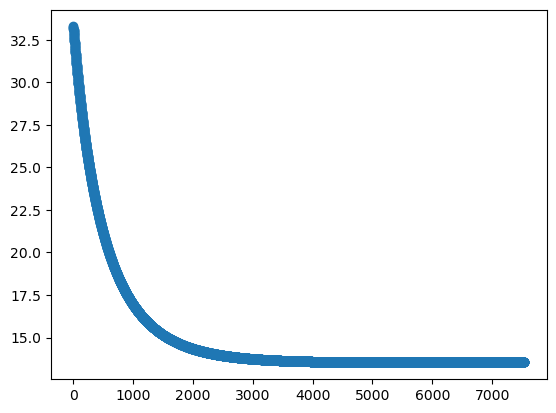

In [389]:
plt.scatter( range(num_iterations), all_costs) #

With Iteration  100000

In [421]:
num_iterations = 100000 
learningRate = 0.001      # 0.01,0.00001 ,0.001
tolerance=0.001 # 0.000001.
all_costs = []
b,w = initialize_betas(df.shape[1])
print("initial guess of b and w: " , b ,w)
# Add Meaassure of time
total_classification_error=[]
start_time = time.time()
for each_iter in range (num_iterations ):
    
    y_hat = sigmoid(b, w , df)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w, grad = update_beta (prev_b, prev_w, Y, y_hat, df, learningRate)
    
    #Breaking code if magnitude is less than 0.001
    if np.all(np.abs(grad) < tolerance):
        print('Converged on  :',each_iter)
        num_iterations=each_iter
        break
    
    all_costs.append(current_cost)
    #total_classification_error.append(new_classification_error)
    
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost or Cross Entropy Error: ', current_cost)
        each_iter += 1
train_time = time.time() - start_time
print('Training Time is:',train_time)
new_classification_error,y_pred = classification_error(y_hat.tolist(),Y)
print('Classification Error is:',new_classification_error)
print("Final estimates of b and q are: ", b,w)
acc = accuracy_score(Y, y_pred)
print("My Accuracy:", acc)


initial guess of b and w:  0.9120752345042932 [0.42328467 0.00288022 0.89559511 0.58630412 0.90517855 0.46797857
 0.04517331 0.78185099 0.78092122 0.82995925 0.86767922 0.58042137
 0.59569385]
Iteration:  0 Cost or Cross Entropy Error:  38.61403462678666
Iteration:  10 Cost or Cross Entropy Error:  38.567401660614635
Iteration:  20 Cost or Cross Entropy Error:  38.52087703363518
Iteration:  30 Cost or Cross Entropy Error:  38.47446038080679
Iteration:  40 Cost or Cross Entropy Error:  38.428151338372786
Iteration:  50 Cost or Cross Entropy Error:  38.38194954386312
Iteration:  60 Cost or Cross Entropy Error:  38.33585463609355
Iteration:  70 Cost or Cross Entropy Error:  38.28986625516766
Iteration:  80 Cost or Cross Entropy Error:  38.24398404247585
Iteration:  90 Cost or Cross Entropy Error:  38.19820764069612
Iteration:  100 Cost or Cross Entropy Error:  38.15253669379473
Iteration:  110 Cost or Cross Entropy Error:  38.10697084702525
Iteration:  120 Cost or Cross Entropy Error:  38

Iteration:  2380 Cost or Cross Entropy Error:  29.919526500264464
Iteration:  2390 Cost or Cross Entropy Error:  29.891007131966813
Iteration:  2400 Cost or Cross Entropy Error:  29.862540845455374
Iteration:  2410 Cost or Cross Entropy Error:  29.83412751070149
Iteration:  2420 Cost or Cross Entropy Error:  29.805766998243634
Iteration:  2430 Cost or Cross Entropy Error:  29.777459179183648
Iteration:  2440 Cost or Cross Entropy Error:  29.749203925183924
Iteration:  2450 Cost or Cross Entropy Error:  29.721001108464108
Iteration:  2460 Cost or Cross Entropy Error:  29.692850601798124
Iteration:  2470 Cost or Cross Entropy Error:  29.66475227851056
Iteration:  2480 Cost or Cross Entropy Error:  29.636706012474058
Iteration:  2490 Cost or Cross Entropy Error:  29.608711678105834
Iteration:  2500 Cost or Cross Entropy Error:  29.580769150364606
Iteration:  2510 Cost or Cross Entropy Error:  29.552878304747694
Iteration:  2520 Cost or Cross Entropy Error:  29.525039017287703
Iteration:  

Iteration:  4790 Cost or Cross Entropy Error:  24.341943780981275
Iteration:  4800 Cost or Cross Entropy Error:  24.323403542838637
Iteration:  4810 Cost or Cross Entropy Error:  24.30489574278444
Iteration:  4820 Cost or Cross Entropy Error:  24.286420322660838
Iteration:  4830 Cost or Cross Entropy Error:  24.267977224443737
Iteration:  4840 Cost or Cross Entropy Error:  24.249566390242133
Iteration:  4850 Cost or Cross Entropy Error:  24.23118776229742
Iteration:  4860 Cost or Cross Entropy Error:  24.212841282982794
Iteration:  4870 Cost or Cross Entropy Error:  24.194526894802536
Iteration:  4880 Cost or Cross Entropy Error:  24.176244540391508
Iteration:  4890 Cost or Cross Entropy Error:  24.15799416251439
Iteration:  4900 Cost or Cross Entropy Error:  24.139775704065144
Iteration:  4910 Cost or Cross Entropy Error:  24.12158910806633
Iteration:  4920 Cost or Cross Entropy Error:  24.103434317668565
Iteration:  4930 Cost or Cross Entropy Error:  24.085311276149866
Iteration:  49

Iteration:  7330 Cost or Cross Entropy Error:  20.536605695965545
Iteration:  7340 Cost or Cross Entropy Error:  20.524720051749977
Iteration:  7350 Cost or Cross Entropy Error:  20.512855237871
Iteration:  7360 Cost or Cross Entropy Error:  20.50101121824897
Iteration:  7370 Cost or Cross Entropy Error:  20.489187956863923
Iteration:  7380 Cost or Cross Entropy Error:  20.477385417755542
Iteration:  7390 Cost or Cross Entropy Error:  20.465603565022906
Iteration:  7400 Cost or Cross Entropy Error:  20.453842362824474
Iteration:  7410 Cost or Cross Entropy Error:  20.442101775377907
Iteration:  7420 Cost or Cross Entropy Error:  20.43038176695992
Iteration:  7430 Cost or Cross Entropy Error:  20.418682301906166
Iteration:  7440 Cost or Cross Entropy Error:  20.407003344611148
Iteration:  7450 Cost or Cross Entropy Error:  20.39534485952802
Iteration:  7460 Cost or Cross Entropy Error:  20.383706811168537
Iteration:  7470 Cost or Cross Entropy Error:  20.372089164102878
Iteration:  7480

Iteration:  9690 Cost or Cross Entropy Error:  18.23805533835514
Iteration:  9700 Cost or Cross Entropy Error:  18.230200792611257
Iteration:  9710 Cost or Cross Entropy Error:  18.222359997180902
Iteration:  9720 Cost or Cross Entropy Error:  18.21453292746432
Iteration:  9730 Cost or Cross Entropy Error:  18.206719558902545
Iteration:  9740 Cost or Cross Entropy Error:  18.19891986697734
Iteration:  9750 Cost or Cross Entropy Error:  18.19113382721119
Iteration:  9760 Cost or Cross Entropy Error:  18.1833614151672
Iteration:  9770 Cost or Cross Entropy Error:  18.175602606449115
Iteration:  9780 Cost or Cross Entropy Error:  18.167857376701164
Iteration:  9790 Cost or Cross Entropy Error:  18.16012570160814
Iteration:  9800 Cost or Cross Entropy Error:  18.152407556895252
Iteration:  9810 Cost or Cross Entropy Error:  18.144702918328125
Iteration:  9820 Cost or Cross Entropy Error:  18.13701176171276
Iteration:  9830 Cost or Cross Entropy Error:  18.12933406289545
Iteration:  9840 Co

Iteration:  12040 Cost or Cross Entropy Error:  16.722556270505386
Iteration:  12050 Cost or Cross Entropy Error:  16.71733803355743
Iteration:  12060 Cost or Cross Entropy Error:  16.712128788613146
Iteration:  12070 Cost or Cross Entropy Error:  16.706928519386576
Iteration:  12080 Cost or Cross Entropy Error:  16.701737209621616
Iteration:  12090 Cost or Cross Entropy Error:  16.696554843092024
Iteration:  12100 Cost or Cross Entropy Error:  16.691381403601333
Iteration:  12110 Cost or Cross Entropy Error:  16.68621687498283
Iteration:  12120 Cost or Cross Entropy Error:  16.681061241099464
Iteration:  12130 Cost or Cross Entropy Error:  16.675914485843883
Iteration:  12140 Cost or Cross Entropy Error:  16.67077659313828
Iteration:  12150 Cost or Cross Entropy Error:  16.66564754693445
Iteration:  12160 Cost or Cross Entropy Error:  16.66052733121365
Iteration:  12170 Cost or Cross Entropy Error:  16.655415929986617
Iteration:  12180 Cost or Cross Entropy Error:  16.6503133272935
It

Iteration:  14620 Cost or Cross Entropy Error:  15.633253380965938
Iteration:  14630 Cost or Cross Entropy Error:  15.629891372226767
Iteration:  14640 Cost or Cross Entropy Error:  15.626535015193099
Iteration:  14650 Cost or Cross Entropy Error:  15.623184299802759
Iteration:  14660 Cost or Cross Entropy Error:  15.619839216012386
Iteration:  14670 Cost or Cross Entropy Error:  15.616499753797418
Iteration:  14680 Cost or Cross Entropy Error:  15.61316590315204
Iteration:  14690 Cost or Cross Entropy Error:  15.609837654089155
Iteration:  14700 Cost or Cross Entropy Error:  15.60651499664034
Iteration:  14710 Cost or Cross Entropy Error:  15.603197920855822
Iteration:  14720 Cost or Cross Entropy Error:  15.599886416804434
Iteration:  14730 Cost or Cross Entropy Error:  15.596580474573587
Iteration:  14740 Cost or Cross Entropy Error:  15.593280084269228
Iteration:  14750 Cost or Cross Entropy Error:  15.5899852360158
Iteration:  14760 Cost or Cross Entropy Error:  15.586695919956219

Iteration:  16850 Cost or Cross Entropy Error:  15.006813312373609
Iteration:  16860 Cost or Cross Entropy Error:  15.004493542287815
Iteration:  16870 Cost or Cross Entropy Error:  15.00217758632601
Iteration:  16880 Cost or Cross Entropy Error:  14.999865437840493
Iteration:  16890 Cost or Cross Entropy Error:  14.99755709019579
Iteration:  16900 Cost or Cross Entropy Error:  14.995252536768655
Iteration:  16910 Cost or Cross Entropy Error:  14.992951770948007
Iteration:  16920 Cost or Cross Entropy Error:  14.990654786134954
Iteration:  16930 Cost or Cross Entropy Error:  14.988361575742728
Iteration:  16940 Cost or Cross Entropy Error:  14.986072133196684
Iteration:  16950 Cost or Cross Entropy Error:  14.98378645193427
Iteration:  16960 Cost or Cross Entropy Error:  14.981504525405
Iteration:  16970 Cost or Cross Entropy Error:  14.979226347070451
Iteration:  16980 Cost or Cross Entropy Error:  14.976951910404205
Iteration:  16990 Cost or Cross Entropy Error:  14.97468120889186
It

Iteration:  19190 Cost or Cross Entropy Error:  14.555316272838189
Iteration:  19200 Cost or Cross Entropy Error:  14.553730951150191
Iteration:  19210 Cost or Cross Entropy Error:  14.5521481770752
Iteration:  19220 Cost or Cross Entropy Error:  14.550567946274262
Iteration:  19230 Cost or Cross Entropy Error:  14.548990254416227
Iteration:  19240 Cost or Cross Entropy Error:  14.547415097177762
Iteration:  19250 Cost or Cross Entropy Error:  14.54584247024332
Iteration:  19260 Cost or Cross Entropy Error:  14.54427236930513
Iteration:  19270 Cost or Cross Entropy Error:  14.542704790063192
Iteration:  19280 Cost or Cross Entropy Error:  14.54113972822525
Iteration:  19290 Cost or Cross Entropy Error:  14.539577179506773
Iteration:  19300 Cost or Cross Entropy Error:  14.538017139630952
Iteration:  19310 Cost or Cross Entropy Error:  14.536459604328696
Iteration:  19320 Cost or Cross Entropy Error:  14.534904569338584
Iteration:  19330 Cost or Cross Entropy Error:  14.533352030406883


Iteration:  21540 Cost or Cross Entropy Error:  14.244436758280358
Iteration:  21550 Cost or Cross Entropy Error:  14.243345850687708
Iteration:  21560 Cost or Cross Entropy Error:  14.242256657812264
Iteration:  21570 Cost or Cross Entropy Error:  14.241169176801966
Iteration:  21580 Cost or Cross Entropy Error:  14.240083404809797
Iteration:  21590 Cost or Cross Entropy Error:  14.238999338993752
Iteration:  21600 Cost or Cross Entropy Error:  14.237916976516855
Iteration:  21610 Cost or Cross Entropy Error:  14.23683631454713
Iteration:  21620 Cost or Cross Entropy Error:  14.235757350257595
Iteration:  21630 Cost or Cross Entropy Error:  14.234680080826257
Iteration:  21640 Cost or Cross Entropy Error:  14.23360450343611
Iteration:  21650 Cost or Cross Entropy Error:  14.2325306152751
Iteration:  21660 Cost or Cross Entropy Error:  14.231458413536153
Iteration:  21670 Cost or Cross Entropy Error:  14.230387895417126
Iteration:  21680 Cost or Cross Entropy Error:  14.229319058120828

Iteration:  23820 Cost or Cross Entropy Error:  14.035032493003182
Iteration:  23830 Cost or Cross Entropy Error:  14.034267607263557
Iteration:  23840 Cost or Cross Entropy Error:  14.033503899846144
Iteration:  23850 Cost or Cross Entropy Error:  14.032741368836465
Iteration:  23860 Cost or Cross Entropy Error:  14.031980012323354
Iteration:  23870 Cost or Cross Entropy Error:  14.031219828398932
Iteration:  23880 Cost or Cross Entropy Error:  14.030460815158623
Iteration:  23890 Cost or Cross Entropy Error:  14.029702970701141
Iteration:  23900 Cost or Cross Entropy Error:  14.02894629312848
Iteration:  23910 Cost or Cross Entropy Error:  14.028190780545925
Iteration:  23920 Cost or Cross Entropy Error:  14.02743643106201
Iteration:  23930 Cost or Cross Entropy Error:  14.026683242788565
Iteration:  23940 Cost or Cross Entropy Error:  14.02593121384065
Iteration:  23950 Cost or Cross Entropy Error:  14.025180342336602
Iteration:  23960 Cost or Cross Entropy Error:  14.02443062639799

Iteration:  26470 Cost or Cross Entropy Error:  13.868290641929338
Iteration:  26480 Cost or Cross Entropy Error:  13.867780086554765
Iteration:  26490 Cost or Cross Entropy Error:  13.867270301469105
Iteration:  26500 Cost or Cross Entropy Error:  13.866761285454585
Iteration:  26510 Cost or Cross Entropy Error:  13.866253037295486
Iteration:  26520 Cost or Cross Entropy Error:  13.865745555778123
Iteration:  26530 Cost or Cross Entropy Error:  13.86523883969087
Iteration:  26540 Cost or Cross Entropy Error:  13.864732887824124
Iteration:  26550 Cost or Cross Entropy Error:  13.864227698970327
Iteration:  26560 Cost or Cross Entropy Error:  13.863723271923954
Iteration:  26570 Cost or Cross Entropy Error:  13.863219605481492
Iteration:  26580 Cost or Cross Entropy Error:  13.86271669844147
Iteration:  26590 Cost or Cross Entropy Error:  13.862214549604438
Iteration:  26600 Cost or Cross Entropy Error:  13.86171315777295
Iteration:  26610 Cost or Cross Entropy Error:  13.86121252175158

Iteration:  28790 Cost or Cross Entropy Error:  13.768203479040237
Iteration:  28800 Cost or Cross Entropy Error:  13.767842814163915
Iteration:  28810 Cost or Cross Entropy Error:  13.767482685202502
Iteration:  28820 Cost or Cross Entropy Error:  13.76712309132837
Iteration:  28830 Cost or Cross Entropy Error:  13.766764031715264
Iteration:  28840 Cost or Cross Entropy Error:  13.766405505538273
Iteration:  28850 Cost or Cross Entropy Error:  13.766047511973856
Iteration:  28860 Cost or Cross Entropy Error:  13.765690050199808
Iteration:  28870 Cost or Cross Entropy Error:  13.765333119395288
Iteration:  28880 Cost or Cross Entropy Error:  13.764976718740803
Iteration:  28890 Cost or Cross Entropy Error:  13.764620847418195
Iteration:  28900 Cost or Cross Entropy Error:  13.764265504610654
Iteration:  28910 Cost or Cross Entropy Error:  13.763910689502723
Iteration:  28920 Cost or Cross Entropy Error:  13.763556401280264
Iteration:  28930 Cost or Cross Entropy Error:  13.763202639130

Iteration:  31340 Cost or Cross Entropy Error:  13.69154413721687
Iteration:  31350 Cost or Cross Entropy Error:  13.691296668403503
Iteration:  31360 Cost or Cross Entropy Error:  13.691049562698643
Iteration:  31370 Cost or Cross Entropy Error:  13.690802819555113
Iteration:  31380 Cost or Cross Entropy Error:  13.69055643842662
Iteration:  31390 Cost or Cross Entropy Error:  13.690310418767755
Iteration:  31400 Cost or Cross Entropy Error:  13.690064760033964
Iteration:  31410 Cost or Cross Entropy Error:  13.68981946168158
Iteration:  31420 Cost or Cross Entropy Error:  13.689574523167792
Iteration:  31430 Cost or Cross Entropy Error:  13.689329943950662
Iteration:  31440 Cost or Cross Entropy Error:  13.68908572348912
Iteration:  31450 Cost or Cross Entropy Error:  13.688841861242958
Iteration:  31460 Cost or Cross Entropy Error:  13.688598356672834
Iteration:  31470 Cost or Cross Entropy Error:  13.688355209240267
Iteration:  31480 Cost or Cross Entropy Error:  13.688112418407636

Iteration:  33840 Cost or Cross Entropy Error:  13.639699025682328
Iteration:  33850 Cost or Cross Entropy Error:  13.639527337828493
Iteration:  33860 Cost or Cross Entropy Error:  13.639355900084453
Iteration:  33870 Cost or Cross Entropy Error:  13.639184712081583
Iteration:  33880 Cost or Cross Entropy Error:  13.639013773451858
Iteration:  33890 Cost or Cross Entropy Error:  13.638843083827808
Iteration:  33900 Cost or Cross Entropy Error:  13.638672642842545
Iteration:  33910 Cost or Cross Entropy Error:  13.63850245012974
Iteration:  33920 Cost or Cross Entropy Error:  13.638332505323648
Iteration:  33930 Cost or Cross Entropy Error:  13.638162808059082
Iteration:  33940 Cost or Cross Entropy Error:  13.637993357971439
Iteration:  33950 Cost or Cross Entropy Error:  13.637824154696668
Iteration:  33960 Cost or Cross Entropy Error:  13.63765519787129
Iteration:  33970 Cost or Cross Entropy Error:  13.63748648713239
Iteration:  33980 Cost or Cross Entropy Error:  13.63731802211763

Iteration:  36360 Cost or Cross Entropy Error:  13.603459170456427
Iteration:  36370 Cost or Cross Entropy Error:  13.603340222368221
Iteration:  36380 Cost or Cross Entropy Error:  13.603221447401324
Iteration:  36390 Cost or Cross Entropy Error:  13.603102845305653
Iteration:  36400 Cost or Cross Entropy Error:  13.602984415831507
Iteration:  36410 Cost or Cross Entropy Error:  13.602866158729542
Iteration:  36420 Cost or Cross Entropy Error:  13.602748073750826
Iteration:  36430 Cost or Cross Entropy Error:  13.602630160646777
Iteration:  36440 Cost or Cross Entropy Error:  13.602512419169203
Iteration:  36450 Cost or Cross Entropy Error:  13.602394849070292
Iteration:  36460 Cost or Cross Entropy Error:  13.602277450102594
Iteration:  36470 Cost or Cross Entropy Error:  13.602160222019055
Iteration:  36480 Cost or Cross Entropy Error:  13.602043164572981
Iteration:  36490 Cost or Cross Entropy Error:  13.60192627751805
Iteration:  36500 Cost or Cross Entropy Error:  13.601809560608

Iteration:  38640 Cost or Cross Entropy Error:  13.580370313789633
Iteration:  38650 Cost or Cross Entropy Error:  13.580285043515154
Iteration:  38660 Cost or Cross Entropy Error:  13.580199898080021
Iteration:  38670 Cost or Cross Entropy Error:  13.58011487730672
Iteration:  38680 Cost or Cross Entropy Error:  13.580029981017981
Iteration:  38690 Cost or Cross Entropy Error:  13.579945209036811
Iteration:  38700 Cost or Cross Entropy Error:  13.579860561186473
Iteration:  38710 Cost or Cross Entropy Error:  13.579776037290493
Iteration:  38720 Cost or Cross Entropy Error:  13.579691637172665
Iteration:  38730 Cost or Cross Entropy Error:  13.579607360657034
Iteration:  38740 Cost or Cross Entropy Error:  13.579523207567922
Iteration:  38750 Cost or Cross Entropy Error:  13.579439177729897
Iteration:  38760 Cost or Cross Entropy Error:  13.579355270967794
Iteration:  38770 Cost or Cross Entropy Error:  13.579271487106702
Iteration:  38780 Cost or Cross Entropy Error:  13.579187825971

Iteration:  41050 Cost or Cross Entropy Error:  13.56305513493094
Iteration:  41060 Cost or Cross Entropy Error:  13.562995371652116
Iteration:  41070 Cost or Cross Entropy Error:  13.56293569718447
Iteration:  41080 Cost or Cross Entropy Error:  13.562876111403437
Iteration:  41090 Cost or Cross Entropy Error:  13.562816614184642
Iteration:  41100 Cost or Cross Entropy Error:  13.562757205403889
Iteration:  41110 Cost or Cross Entropy Error:  13.562697884937153
Iteration:  41120 Cost or Cross Entropy Error:  13.562638652660606
Iteration:  41130 Cost or Cross Entropy Error:  13.562579508450584
Iteration:  41140 Cost or Cross Entropy Error:  13.562520452183618
Iteration:  41150 Cost or Cross Entropy Error:  13.56246148373639
Iteration:  41160 Cost or Cross Entropy Error:  13.562402602985802
Iteration:  41170 Cost or Cross Entropy Error:  13.5623438098089
Iteration:  41180 Cost or Cross Entropy Error:  13.562285104082932
Iteration:  41190 Cost or Cross Entropy Error:  13.5622264856853
It

Iteration:  43500 Cost or Cross Entropy Error:  13.550790793375008
Iteration:  43510 Cost or Cross Entropy Error:  13.55074946614389
Iteration:  43520 Cost or Cross Entropy Error:  13.550708202003642
Iteration:  43530 Cost or Cross Entropy Error:  13.550667000866694
Iteration:  43540 Cost or Cross Entropy Error:  13.55062586264564
Iteration:  43550 Cost or Cross Entropy Error:  13.550584787253166
Iteration:  43560 Cost or Cross Entropy Error:  13.550543774602103
Iteration:  43570 Cost or Cross Entropy Error:  13.550502824605399
Iteration:  43580 Cost or Cross Entropy Error:  13.550461937176124
Iteration:  43590 Cost or Cross Entropy Error:  13.550421112227477
Iteration:  43600 Cost or Cross Entropy Error:  13.550380349672777
Iteration:  43610 Cost or Cross Entropy Error:  13.55033964942546
Iteration:  43620 Cost or Cross Entropy Error:  13.550299011399096
Iteration:  43630 Cost or Cross Entropy Error:  13.550258435507377
Iteration:  43640 Cost or Cross Entropy Error:  13.55021792166411

Iteration:  45750 Cost or Cross Entropy Error:  13.542930201257201
Iteration:  45760 Cost or Cross Entropy Error:  13.54290107847459
Iteration:  45770 Cost or Cross Entropy Error:  13.54287200190249
Iteration:  45780 Cost or Cross Entropy Error:  13.54284297147718
Iteration:  45790 Cost or Cross Entropy Error:  13.542813987135034
Iteration:  45800 Cost or Cross Entropy Error:  13.542785048812501
Iteration:  45810 Cost or Cross Entropy Error:  13.542756156446124
Iteration:  45820 Cost or Cross Entropy Error:  13.542727309972543
Iteration:  45830 Cost or Cross Entropy Error:  13.542698509328492
Iteration:  45840 Cost or Cross Entropy Error:  13.54266975445076
Iteration:  45850 Cost or Cross Entropy Error:  13.542641045276259
Iteration:  45860 Cost or Cross Entropy Error:  13.542612381741977
Iteration:  45870 Cost or Cross Entropy Error:  13.542583763784993
Iteration:  45880 Cost or Cross Entropy Error:  13.542555191342457
Iteration:  45890 Cost or Cross Entropy Error:  13.542526664351636

Iteration:  48070 Cost or Cross Entropy Error:  13.537290884054306
Iteration:  48080 Cost or Cross Entropy Error:  13.537270943331631
Iteration:  48090 Cost or Cross Entropy Error:  13.537251036177155
Iteration:  48100 Cost or Cross Entropy Error:  13.537231162544707
Iteration:  48110 Cost or Cross Entropy Error:  13.537211322388169
Iteration:  48120 Cost or Cross Entropy Error:  13.537191515661496
Iteration:  48130 Cost or Cross Entropy Error:  13.537171742318696
Iteration:  48140 Cost or Cross Entropy Error:  13.537152002313855
Iteration:  48150 Cost or Cross Entropy Error:  13.537132295601099
Iteration:  48160 Cost or Cross Entropy Error:  13.537112622134645
Iteration:  48170 Cost or Cross Entropy Error:  13.537092981868753
Iteration:  48180 Cost or Cross Entropy Error:  13.537073374757759
Iteration:  48190 Cost or Cross Entropy Error:  13.537053800756047
Iteration:  48200 Cost or Cross Entropy Error:  13.537034259818077
Iteration:  48210 Cost or Cross Entropy Error:  13.53701475189

Iteration:  49880 Cost or Cross Entropy Error:  13.534186171059153
Iteration:  49890 Cost or Cross Entropy Error:  13.534171611964478
Iteration:  49900 Cost or Cross Entropy Error:  13.534157079031742
Iteration:  49910 Cost or Cross Entropy Error:  13.53414257222491
Iteration:  49920 Cost or Cross Entropy Error:  13.53412809150798
Iteration:  49930 Cost or Cross Entropy Error:  13.534113636845015
Iteration:  49940 Cost or Cross Entropy Error:  13.53409920820012
Iteration:  49950 Cost or Cross Entropy Error:  13.534084805537436
Iteration:  49960 Cost or Cross Entropy Error:  13.534070428821181
Iteration:  49970 Cost or Cross Entropy Error:  13.534056078015594
Iteration:  49980 Cost or Cross Entropy Error:  13.534041753084983
Iteration:  49990 Cost or Cross Entropy Error:  13.534027453993692
Iteration:  50000 Cost or Cross Entropy Error:  13.534013180706115
Iteration:  50010 Cost or Cross Entropy Error:  13.5339989331867
Iteration:  50020 Cost or Cross Entropy Error:  13.533984711399937


Iteration:  52290 Cost or Cross Entropy Error:  13.53135728574318
Iteration:  52300 Cost or Cross Entropy Error:  13.531348093372108
Iteration:  52310 Cost or Cross Entropy Error:  13.531338919747387
Iteration:  52320 Cost or Cross Entropy Error:  13.531329764843013
Iteration:  52330 Cost or Cross Entropy Error:  13.531320628632976
Iteration:  52340 Cost or Cross Entropy Error:  13.531311511091339
Iteration:  52350 Cost or Cross Entropy Error:  13.531302412192181
Iteration:  52360 Cost or Cross Entropy Error:  13.53129333190962
Iteration:  52370 Cost or Cross Entropy Error:  13.531284270217805
Iteration:  52380 Cost or Cross Entropy Error:  13.531275227090925
Iteration:  52390 Cost or Cross Entropy Error:  13.5312662025032
Iteration:  52400 Cost or Cross Entropy Error:  13.531257196428893
Iteration:  52410 Cost or Cross Entropy Error:  13.531248208842284
Iteration:  52420 Cost or Cross Entropy Error:  13.531239239717703
Iteration:  52430 Cost or Cross Entropy Error:  13.531230289029505

Iteration:  54520 Cost or Cross Entropy Error:  13.529727264087963
Iteration:  54530 Cost or Cross Entropy Error:  13.529721667117272
Iteration:  54540 Cost or Cross Entropy Error:  13.52971608387229
Iteration:  54550 Cost or Cross Entropy Error:  13.529710514333694
Iteration:  54560 Cost or Cross Entropy Error:  13.529704958482201
Iteration:  54570 Cost or Cross Entropy Error:  13.529699416298534
Iteration:  54580 Cost or Cross Entropy Error:  13.52969388776345
Iteration:  54590 Cost or Cross Entropy Error:  13.529688372857732
Iteration:  54600 Cost or Cross Entropy Error:  13.529682871562189
Iteration:  54610 Cost or Cross Entropy Error:  13.529677383857653
Iteration:  54620 Cost or Cross Entropy Error:  13.529671909724986
Iteration:  54630 Cost or Cross Entropy Error:  13.529666449145063
Iteration:  54640 Cost or Cross Entropy Error:  13.5296610020988
Iteration:  54650 Cost or Cross Entropy Error:  13.529655568567133
Iteration:  54660 Cost or Cross Entropy Error:  13.529650148531022

Iteration:  56870 Cost or Cross Entropy Error:  13.528751093876616
Iteration:  56880 Cost or Cross Entropy Error:  13.52874824193903
Iteration:  56890 Cost or Cross Entropy Error:  13.528745399823014
Iteration:  56900 Cost or Cross Entropy Error:  13.528742567514422
Iteration:  56910 Cost or Cross Entropy Error:  13.5287397449991
Iteration:  56920 Cost or Cross Entropy Error:  13.52873693226293
Iteration:  56930 Cost or Cross Entropy Error:  13.528734129291816
Iteration:  56940 Cost or Cross Entropy Error:  13.528731336071665
Iteration:  56950 Cost or Cross Entropy Error:  13.52872855258841
Iteration:  56960 Cost or Cross Entropy Error:  13.528725778828013
Iteration:  56970 Cost or Cross Entropy Error:  13.528723014776434
Iteration:  56980 Cost or Cross Entropy Error:  13.528720260419663
Iteration:  56990 Cost or Cross Entropy Error:  13.528717515743718
Iteration:  57000 Cost or Cross Entropy Error:  13.528714780734617
Iteration:  57010 Cost or Cross Entropy Error:  13.528712055378408


Iteration:  59370 Cost or Cross Entropy Error:  13.528310150273706
Iteration:  59380 Cost or Cross Entropy Error:  13.528309357253336
Iteration:  59390 Cost or Cross Entropy Error:  13.52830857103549
Iteration:  59400 Cost or Cross Entropy Error:  13.528307791609974
Iteration:  59410 Cost or Cross Entropy Error:  13.528307018966595
Iteration:  59420 Cost or Cross Entropy Error:  13.528306253095192
Iteration:  59430 Cost or Cross Entropy Error:  13.528305493985595
Iteration:  59440 Cost or Cross Entropy Error:  13.52830474162767
Iteration:  59450 Cost or Cross Entropy Error:  13.528303996011283
Iteration:  59460 Cost or Cross Entropy Error:  13.528303257126316
Iteration:  59470 Cost or Cross Entropy Error:  13.52830252496266
Iteration:  59480 Cost or Cross Entropy Error:  13.528301799510228
Iteration:  59490 Cost or Cross Entropy Error:  13.528301080758943
Iteration:  59500 Cost or Cross Entropy Error:  13.528300368698737
Iteration:  59510 Cost or Cross Entropy Error:  13.52829966331955

Iteration:  61720 Cost or Cross Entropy Error:  13.528290605557297
Iteration:  61730 Cost or Cross Entropy Error:  13.52829115717694
Iteration:  61740 Cost or Cross Entropy Error:  13.52829171353457
Iteration:  61750 Cost or Cross Entropy Error:  13.528292274622691
Iteration:  61760 Cost or Cross Entropy Error:  13.528292840433805
Iteration:  61770 Cost or Cross Entropy Error:  13.528293410960442
Iteration:  61780 Cost or Cross Entropy Error:  13.52829398619512
Iteration:  61790 Cost or Cross Entropy Error:  13.528294566130384
Iteration:  61800 Cost or Cross Entropy Error:  13.52829515075878
Iteration:  61810 Cost or Cross Entropy Error:  13.528295740072867
Iteration:  61820 Cost or Cross Entropy Error:  13.528296334065216
Iteration:  61830 Cost or Cross Entropy Error:  13.528296932728402
Iteration:  61840 Cost or Cross Entropy Error:  13.528297536055016
Iteration:  61850 Cost or Cross Entropy Error:  13.528298144037649
Iteration:  61860 Cost or Cross Entropy Error:  13.528298756668917

Iteration:  64160 Cost or Cross Entropy Error:  13.528549054382959
Iteration:  64170 Cost or Cross Entropy Error:  13.52855056141722
Iteration:  64180 Cost or Cross Entropy Error:  13.52855207162157
Iteration:  64190 Cost or Cross Entropy Error:  13.528553584990558
Iteration:  64200 Cost or Cross Entropy Error:  13.528555101518739
Iteration:  64210 Cost or Cross Entropy Error:  13.528556621200677
Iteration:  64220 Cost or Cross Entropy Error:  13.528558144030944
Iteration:  64230 Cost or Cross Entropy Error:  13.528559670004112
Iteration:  64240 Cost or Cross Entropy Error:  13.528561199114769
Iteration:  64250 Cost or Cross Entropy Error:  13.528562731357507
Iteration:  64260 Cost or Cross Entropy Error:  13.528564266726926
Iteration:  64270 Cost or Cross Entropy Error:  13.528565805217628
Iteration:  64280 Cost or Cross Entropy Error:  13.528567346824232
Iteration:  64290 Cost or Cross Entropy Error:  13.52856889154135
Iteration:  64300 Cost or Cross Entropy Error:  13.52857043936361

Iteration:  66350 Cost or Cross Entropy Error:  13.528945986201112
Iteration:  66360 Cost or Cross Entropy Error:  13.528948068876138
Iteration:  66370 Cost or Cross Entropy Error:  13.528950153683049
Iteration:  66380 Cost or Cross Entropy Error:  13.528952240617768
Iteration:  66390 Cost or Cross Entropy Error:  13.528954329676218
Iteration:  66400 Cost or Cross Entropy Error:  13.528956420854307
Iteration:  66410 Cost or Cross Entropy Error:  13.528958514147977
Iteration:  66420 Cost or Cross Entropy Error:  13.528960609553152
Iteration:  66430 Cost or Cross Entropy Error:  13.528962707065777
Iteration:  66440 Cost or Cross Entropy Error:  13.528964806681792
Iteration:  66450 Cost or Cross Entropy Error:  13.528966908397155
Iteration:  66460 Cost or Cross Entropy Error:  13.528969012207815
Iteration:  66470 Cost or Cross Entropy Error:  13.528971118109732
Iteration:  66480 Cost or Cross Entropy Error:  13.528973226098874
Iteration:  66490 Cost or Cross Entropy Error:  13.52897533617

Iteration:  68010 Cost or Cross Entropy Error:  13.529318004239862
Iteration:  68020 Cost or Cross Entropy Error:  13.529320388665102
Iteration:  68030 Cost or Cross Entropy Error:  13.529322774612652
Iteration:  68040 Cost or Cross Entropy Error:  13.529325162079239
Iteration:  68050 Cost or Cross Entropy Error:  13.529327551061586
Iteration:  68060 Cost or Cross Entropy Error:  13.529329941556416
Iteration:  68070 Cost or Cross Entropy Error:  13.529332333560468
Iteration:  68080 Cost or Cross Entropy Error:  13.529334727070477
Iteration:  68090 Cost or Cross Entropy Error:  13.529337122083186
Iteration:  68100 Cost or Cross Entropy Error:  13.529339518595338
Iteration:  68110 Cost or Cross Entropy Error:  13.529341916603684
Iteration:  68120 Cost or Cross Entropy Error:  13.529344316104979
Iteration:  68130 Cost or Cross Entropy Error:  13.529346717095988
Iteration:  68140 Cost or Cross Entropy Error:  13.529349119573466
Iteration:  68150 Cost or Cross Entropy Error:  13.52935152353

Iteration:  69480 Cost or Cross Entropy Error:  13.529683228089258
Iteration:  69490 Cost or Cross Entropy Error:  13.529685803261216
Iteration:  69500 Cost or Cross Entropy Error:  13.529688379517433
Iteration:  69510 Cost or Cross Entropy Error:  13.529690956855221
Iteration:  69520 Cost or Cross Entropy Error:  13.529693535271894
Iteration:  69530 Cost or Cross Entropy Error:  13.52969611476476
Iteration:  69540 Cost or Cross Entropy Error:  13.529698695331136
Iteration:  69550 Cost or Cross Entropy Error:  13.529701276968353
Iteration:  69560 Cost or Cross Entropy Error:  13.52970385967372
Iteration:  69570 Cost or Cross Entropy Error:  13.529706443444573
Iteration:  69580 Cost or Cross Entropy Error:  13.52970902827824
Iteration:  69590 Cost or Cross Entropy Error:  13.529711614172063
Iteration:  69600 Cost or Cross Entropy Error:  13.529714201123374
Iteration:  69610 Cost or Cross Entropy Error:  13.529716789129518
Iteration:  69620 Cost or Cross Entropy Error:  13.52971937818784

Iteration:  71010 Cost or Cross Entropy Error:  13.53008833738876
Iteration:  71020 Cost or Cross Entropy Error:  13.530091049157647
Iteration:  71030 Cost or Cross Entropy Error:  13.530093761638298
Iteration:  71040 Cost or Cross Entropy Error:  13.530096474828541
Iteration:  71050 Cost or Cross Entropy Error:  13.530099188726174
Iteration:  71060 Cost or Cross Entropy Error:  13.530101903329024
Iteration:  71070 Cost or Cross Entropy Error:  13.530104618634907
Iteration:  71080 Cost or Cross Entropy Error:  13.530107334641654
Iteration:  71090 Cost or Cross Entropy Error:  13.530110051347085
Iteration:  71100 Cost or Cross Entropy Error:  13.53011276874903
Iteration:  71110 Cost or Cross Entropy Error:  13.530115486845327
Iteration:  71120 Cost or Cross Entropy Error:  13.530118205633807
Iteration:  71130 Cost or Cross Entropy Error:  13.530120925112305
Iteration:  71140 Cost or Cross Entropy Error:  13.530123645278668
Iteration:  71150 Cost or Cross Entropy Error:  13.5301263661307

Iteration:  73240 Cost or Cross Entropy Error:  13.530706974791787
Iteration:  73250 Cost or Cross Entropy Error:  13.530709796226425
Iteration:  73260 Cost or Cross Entropy Error:  13.530712617952632
Iteration:  73270 Cost or Cross Entropy Error:  13.530715439968791
Iteration:  73280 Cost or Cross Entropy Error:  13.530718262273318
Iteration:  73290 Cost or Cross Entropy Error:  13.530721084864602
Iteration:  73300 Cost or Cross Entropy Error:  13.530723907741043
Iteration:  73310 Cost or Cross Entropy Error:  13.530726730901048
Iteration:  73320 Cost or Cross Entropy Error:  13.530729554343027
Iteration:  73330 Cost or Cross Entropy Error:  13.530732378065382
Iteration:  73340 Cost or Cross Entropy Error:  13.530735202066536
Iteration:  73350 Cost or Cross Entropy Error:  13.530738026344885
Iteration:  73360 Cost or Cross Entropy Error:  13.530740850898855
Iteration:  73370 Cost or Cross Entropy Error:  13.530743675726866
Iteration:  73380 Cost or Cross Entropy Error:  13.53074650082

Iteration:  75650 Cost or Cross Entropy Error:  13.531391968812159
Iteration:  75660 Cost or Cross Entropy Error:  13.531394818966048
Iteration:  75670 Cost or Cross Entropy Error:  13.531397669084313
Iteration:  75680 Cost or Cross Entropy Error:  13.531400519165839
Iteration:  75690 Cost or Cross Entropy Error:  13.531403369209478
Iteration:  75700 Cost or Cross Entropy Error:  13.531406219214112
Iteration:  75710 Cost or Cross Entropy Error:  13.531409069178613
Iteration:  75720 Cost or Cross Entropy Error:  13.531411919101851
Iteration:  75730 Cost or Cross Entropy Error:  13.531414768982703
Iteration:  75740 Cost or Cross Entropy Error:  13.531417618820045
Iteration:  75750 Cost or Cross Entropy Error:  13.531420468612767
Iteration:  75760 Cost or Cross Entropy Error:  13.531423318359744
Iteration:  75770 Cost or Cross Entropy Error:  13.531426168059852
Iteration:  75780 Cost or Cross Entropy Error:  13.531429017711988
Iteration:  75790 Cost or Cross Entropy Error:  13.53143186731

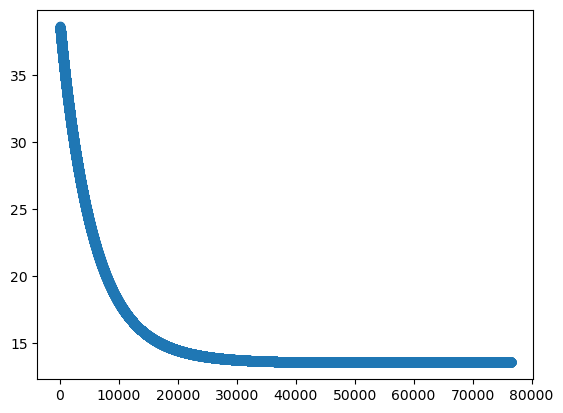

In [422]:
plt.scatter( range(num_iterations), all_costs) #

With Iteration 1000000

In [423]:
num_iterations = 1000000 
learningRate = 0.001      # 0.01,0.00001 ,0.001
tolerance=0.001 # 0.000001.
all_costs = []
b,w = initialize_betas(df.shape[1])
print("initial guess of b and w: " , b ,w)
# Add Meaassure of time
total_classification_error=[]
start_time = time.time()
for each_iter in range (num_iterations ):
    
    y_hat = sigmoid(b, w , df)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w, grad = update_beta (prev_b, prev_w, Y, y_hat, df, learningRate)
    
    #Breaking code if magnitude is less than 0.001
    if np.all(np.abs(grad) < tolerance):
        print('Converged on  :',each_iter)
        num_iterations=each_iter
        break
    
    all_costs.append(current_cost)
    #total_classification_error.append(new_classification_error)
    
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost or Cross Entropy Error: ', current_cost)
        each_iter += 1
train_time = time.time() - start_time
print('Training Time is:',train_time)
new_classification_error,y_pred = classification_error(y_hat.tolist(),Y)
print('Classification Error is:',new_classification_error)
print("Final estimates of b and q are: ", b,w)
acc = accuracy_score(Y, y_pred)
print("My Accuracy:", acc)


initial guess of b and w:  0.8174489231134457 [0.98653876 0.54917708 0.06893106 0.37632809 0.45519468 0.52041179
 0.44166181 0.67807855 0.52992117 0.1057276  0.63799565 0.71925679
 0.39065373]
Iteration:  0 Cost or Cross Entropy Error:  40.04237860609214
Iteration:  10 Cost or Cross Entropy Error:  39.976336857924714
Iteration:  20 Cost or Cross Entropy Error:  39.91048740799776
Iteration:  30 Cost or Cross Entropy Error:  39.84482971168927
Iteration:  40 Cost or Cross Entropy Error:  39.77936322591332
Iteration:  50 Cost or Cross Entropy Error:  39.714087409100614
Iteration:  60 Cost or Cross Entropy Error:  39.64900172117917
Iteration:  70 Cost or Cross Entropy Error:  39.584105623555146
Iteration:  80 Cost or Cross Entropy Error:  39.519398579094165
Iteration:  90 Cost or Cross Entropy Error:  39.4548800521025
Iteration:  100 Cost or Cross Entropy Error:  39.390549508308844
Iteration:  110 Cost or Cross Entropy Error:  39.32640641484627
Iteration:  120 Cost or Cross Entropy Error:  

Iteration:  2320 Cost or Cross Entropy Error:  28.88335919829869
Iteration:  2330 Cost or Cross Entropy Error:  28.849530137580334
Iteration:  2340 Cost or Cross Entropy Error:  28.815795161789826
Iteration:  2350 Cost or Cross Entropy Error:  28.782153970738772
Iteration:  2360 Cost or Cross Entropy Error:  28.74860626527722
Iteration:  2370 Cost or Cross Entropy Error:  28.715151747290292
Iteration:  2380 Cost or Cross Entropy Error:  28.68179011969485
Iteration:  2390 Cost or Cross Entropy Error:  28.648521086436045
Iteration:  2400 Cost or Cross Entropy Error:  28.615344352483984
Iteration:  2410 Cost or Cross Entropy Error:  28.58225962383021
Iteration:  2420 Cost or Cross Entropy Error:  28.549266607484242
Iteration:  2430 Cost or Cross Entropy Error:  28.516365011470114
Iteration:  2440 Cost or Cross Entropy Error:  28.483554544822834
Iteration:  2450 Cost or Cross Entropy Error:  28.450834917584825
Iteration:  2460 Cost or Cross Entropy Error:  28.418205840802383
Iteration:  24

Iteration:  4600 Cost or Cross Entropy Error:  23.1163994761928
Iteration:  4610 Cost or Cross Entropy Error:  23.097898880079917
Iteration:  4620 Cost or Cross Entropy Error:  23.07944431255562
Iteration:  4630 Cost or Cross Entropy Error:  23.06103563052606
Iteration:  4640 Cost or Cross Entropy Error:  23.04267269135343
Iteration:  4650 Cost or Cross Entropy Error:  23.024355352854826
Iteration:  4660 Cost or Cross Entropy Error:  23.00608347330104
Iteration:  4670 Cost or Cross Entropy Error:  22.987856911415395
Iteration:  4680 Cost or Cross Entropy Error:  22.969675526372598
Iteration:  4690 Cost or Cross Entropy Error:  22.95153917779759
Iteration:  4700 Cost or Cross Entropy Error:  22.933447725764335
Iteration:  4710 Cost or Cross Entropy Error:  22.915401030794737
Iteration:  4720 Cost or Cross Entropy Error:  22.897398953857447
Iteration:  4730 Cost or Cross Entropy Error:  22.87944135636674
Iteration:  4740 Cost or Cross Entropy Error:  22.861528100181356
Iteration:  4750 C

Iteration:  7050 Cost or Cross Entropy Error:  19.672316495841756
Iteration:  7060 Cost or Cross Entropy Error:  19.661764344508555
Iteration:  7070 Cost or Cross Entropy Error:  19.651234264000934
Iteration:  7080 Cost or Cross Entropy Error:  19.640726192493677
Iteration:  7090 Cost or Cross Entropy Error:  19.630240068380505
Iteration:  7100 Cost or Cross Entropy Error:  19.619775830273312
Iteration:  7110 Cost or Cross Entropy Error:  19.609333417001363
Iteration:  7120 Cost or Cross Entropy Error:  19.598912767610475
Iteration:  7130 Cost or Cross Entropy Error:  19.588513821362294
Iteration:  7140 Cost or Cross Entropy Error:  19.578136517733423
Iteration:  7150 Cost or Cross Entropy Error:  19.567780796414702
Iteration:  7160 Cost or Cross Entropy Error:  19.557446597310403
Iteration:  7170 Cost or Cross Entropy Error:  19.54713386053744
Iteration:  7180 Cost or Cross Entropy Error:  19.53684252642462
Iteration:  7190 Cost or Cross Entropy Error:  19.52657253551182
Iteration:  7

Iteration:  9490 Cost or Cross Entropy Error:  17.630667391186847
Iteration:  9500 Cost or Cross Entropy Error:  17.624090936875337
Iteration:  9510 Cost or Cross Entropy Error:  17.61752635371878
Iteration:  9520 Cost or Cross Entropy Error:  17.610973614628268
Iteration:  9530 Cost or Cross Entropy Error:  17.604432692599268
Iteration:  9540 Cost or Cross Entropy Error:  17.597903560711337
Iteration:  9550 Cost or Cross Entropy Error:  17.59138619212772
Iteration:  9560 Cost or Cross Entropy Error:  17.584880560095097
Iteration:  9570 Cost or Cross Entropy Error:  17.578386637943165
Iteration:  9580 Cost or Cross Entropy Error:  17.571904399084413
Iteration:  9590 Cost or Cross Entropy Error:  17.565433817013712
Iteration:  9600 Cost or Cross Entropy Error:  17.558974865308027
Iteration:  9610 Cost or Cross Entropy Error:  17.55252751762609
Iteration:  9620 Cost or Cross Entropy Error:  17.54609174770806
Iteration:  9630 Cost or Cross Entropy Error:  17.539667529375254
Iteration:  96

Iteration:  11780 Cost or Cross Entropy Error:  16.389036209081485
Iteration:  11790 Cost or Cross Entropy Error:  16.384606714471595
Iteration:  11800 Cost or Cross Entropy Error:  16.38018456521305
Iteration:  11810 Cost or Cross Entropy Error:  16.37576974709576
Iteration:  11820 Cost or Cross Entropy Error:  16.371362245945456
Iteration:  11830 Cost or Cross Entropy Error:  16.36696204762356
Iteration:  11840 Cost or Cross Entropy Error:  16.362569138027055
Iteration:  11850 Cost or Cross Entropy Error:  16.358183503088373
Iteration:  11860 Cost or Cross Entropy Error:  16.353805128775267
Iteration:  11870 Cost or Cross Entropy Error:  16.349434001090696
Iteration:  11880 Cost or Cross Entropy Error:  16.345070106072694
Iteration:  11890 Cost or Cross Entropy Error:  16.34071342979425
Iteration:  11900 Cost or Cross Entropy Error:  16.336363958363208
Iteration:  11910 Cost or Cross Entropy Error:  16.332021677922118
Iteration:  11920 Cost or Cross Entropy Error:  16.32768657464814


Iteration:  13790 Cost or Cross Entropy Error:  15.62948539757791
Iteration:  13800 Cost or Cross Entropy Error:  15.626287490267881
Iteration:  13810 Cost or Cross Entropy Error:  15.623094656739621
Iteration:  13820 Cost or Cross Entropy Error:  15.619906888069558
Iteration:  13830 Cost or Cross Entropy Error:  15.616724175353117
Iteration:  13840 Cost or Cross Entropy Error:  15.613546509704639
Iteration:  13850 Cost or Cross Entropy Error:  15.610373882257406
Iteration:  13860 Cost or Cross Entropy Error:  15.60720628416348
Iteration:  13870 Cost or Cross Entropy Error:  15.60404370659376
Iteration:  13880 Cost or Cross Entropy Error:  15.600886140737831
Iteration:  13890 Cost or Cross Entropy Error:  15.597733577803973
Iteration:  13900 Cost or Cross Entropy Error:  15.594586009019093
Iteration:  13910 Cost or Cross Entropy Error:  15.591443425628663
Iteration:  13920 Cost or Cross Entropy Error:  15.588305818896664
Iteration:  13930 Cost or Cross Entropy Error:  15.58517318010556

Iteration:  16210 Cost or Cross Entropy Error:  14.985066524361981
Iteration:  16220 Cost or Cross Entropy Error:  14.982874185108145
Iteration:  16230 Cost or Cross Entropy Error:  14.980685211428115
Iteration:  16240 Cost or Cross Entropy Error:  14.978499597793617
Iteration:  16250 Cost or Cross Entropy Error:  14.976317338686625
Iteration:  16260 Cost or Cross Entropy Error:  14.974138428599327
Iteration:  16270 Cost or Cross Entropy Error:  14.971962862034125
Iteration:  16280 Cost or Cross Entropy Error:  14.969790633503587
Iteration:  16290 Cost or Cross Entropy Error:  14.967621737530425
Iteration:  16300 Cost or Cross Entropy Error:  14.965456168647492
Iteration:  16310 Cost or Cross Entropy Error:  14.963293921397739
Iteration:  16320 Cost or Cross Entropy Error:  14.9611349903342
Iteration:  16330 Cost or Cross Entropy Error:  14.958979370019973
Iteration:  16340 Cost or Cross Entropy Error:  14.95682705502819
Iteration:  16350 Cost or Cross Entropy Error:  14.95467803994199

Iteration:  18580 Cost or Cross Entropy Error:  14.548680985518262
Iteration:  18590 Cost or Cross Entropy Error:  14.547151499718368
Iteration:  18600 Cost or Cross Entropy Error:  14.545624312296832
Iteration:  18610 Cost or Cross Entropy Error:  14.54409941962626
Iteration:  18620 Cost or Cross Entropy Error:  14.54257681808547
Iteration:  18630 Cost or Cross Entropy Error:  14.541056504059485
Iteration:  18640 Cost or Cross Entropy Error:  14.539538473939507
Iteration:  18650 Cost or Cross Entropy Error:  14.538022724122943
Iteration:  18660 Cost or Cross Entropy Error:  14.536509251013346
Iteration:  18670 Cost or Cross Entropy Error:  14.53499805102044
Iteration:  18680 Cost or Cross Entropy Error:  14.533489120560077
Iteration:  18690 Cost or Cross Entropy Error:  14.531982456054257
Iteration:  18700 Cost or Cross Entropy Error:  14.53047805393109
Iteration:  18710 Cost or Cross Entropy Error:  14.52897591062479
Iteration:  18720 Cost or Cross Entropy Error:  14.527476022575678


Iteration:  20680 Cost or Cross Entropy Error:  14.272860689298017
Iteration:  20690 Cost or Cross Entropy Error:  14.27174284592926
Iteration:  20700 Cost or Cross Entropy Error:  14.270626659140406
Iteration:  20710 Cost or Cross Entropy Error:  14.269512126381013
Iteration:  20720 Cost or Cross Entropy Error:  14.268399245104835
Iteration:  20730 Cost or Cross Entropy Error:  14.267288012769798
Iteration:  20740 Cost or Cross Entropy Error:  14.266178426838017
Iteration:  20750 Cost or Cross Entropy Error:  14.265070484775768
Iteration:  20760 Cost or Cross Entropy Error:  14.263964184053497
Iteration:  20770 Cost or Cross Entropy Error:  14.262859522145785
Iteration:  20780 Cost or Cross Entropy Error:  14.261756496531387
Iteration:  20790 Cost or Cross Entropy Error:  14.260655104693162
Iteration:  20800 Cost or Cross Entropy Error:  14.259555344118132
Iteration:  20810 Cost or Cross Entropy Error:  14.258457212297422
Iteration:  20820 Cost or Cross Entropy Error:  14.257360706726

Iteration:  23120 Cost or Cross Entropy Error:  14.043674223870509
Iteration:  23130 Cost or Cross Entropy Error:  14.042894008129998
Iteration:  23140 Cost or Cross Entropy Error:  14.042114934855613
Iteration:  23150 Cost or Cross Entropy Error:  14.041337002328074
Iteration:  23160 Cost or Cross Entropy Error:  14.040560208830835
Iteration:  23170 Cost or Cross Entropy Error:  14.039784552650081
Iteration:  23180 Cost or Cross Entropy Error:  14.039010032074717
Iteration:  23190 Cost or Cross Entropy Error:  14.038236645396365
Iteration:  23200 Cost or Cross Entropy Error:  14.037464390909367
Iteration:  23210 Cost or Cross Entropy Error:  14.036693266910776
Iteration:  23220 Cost or Cross Entropy Error:  14.035923271700335
Iteration:  23230 Cost or Cross Entropy Error:  14.035154403580517
Iteration:  23240 Cost or Cross Entropy Error:  14.034386660856455
Iteration:  23250 Cost or Cross Entropy Error:  14.033620041835997
Iteration:  23260 Cost or Cross Entropy Error:  14.03285454482

Iteration:  25470 Cost or Cross Entropy Error:  13.88837780817555
Iteration:  25480 Cost or Cross Entropy Error:  13.887824105209102
Iteration:  25490 Cost or Cross Entropy Error:  13.887271206849661
Iteration:  25500 Cost or Cross Entropy Error:  13.88671911190859
Iteration:  25510 Cost or Cross Entropy Error:  13.886167819199116
Iteration:  25520 Cost or Cross Entropy Error:  13.88561732753629
Iteration:  25530 Cost or Cross Entropy Error:  13.885067635737002
Iteration:  25540 Cost or Cross Entropy Error:  13.88451874261998
Iteration:  25550 Cost or Cross Entropy Error:  13.883970647005784
Iteration:  25560 Cost or Cross Entropy Error:  13.883423347716796
Iteration:  25570 Cost or Cross Entropy Error:  13.88287684357723
Iteration:  25580 Cost or Cross Entropy Error:  13.882331133413114
Iteration:  25590 Cost or Cross Entropy Error:  13.881786216052305
Iteration:  25600 Cost or Cross Entropy Error:  13.881242090324454
Iteration:  25610 Cost or Cross Entropy Error:  13.880698755061053


Iteration:  27850 Cost or Cross Entropy Error:  13.776874592227058
Iteration:  27860 Cost or Cross Entropy Error:  13.776482586363592
Iteration:  27870 Cost or Cross Entropy Error:  13.776091148095235
Iteration:  27880 Cost or Cross Entropy Error:  13.775700276597032
Iteration:  27890 Cost or Cross Entropy Error:  13.7753099710453
Iteration:  27900 Cost or Cross Entropy Error:  13.774920230617564
Iteration:  27910 Cost or Cross Entropy Error:  13.774531054492632
Iteration:  27920 Cost or Cross Entropy Error:  13.774142441850541
Iteration:  27930 Cost or Cross Entropy Error:  13.773754391872576
Iteration:  27940 Cost or Cross Entropy Error:  13.773366903741262
Iteration:  27950 Cost or Cross Entropy Error:  13.772979976640363
Iteration:  27960 Cost or Cross Entropy Error:  13.772593609754878
Iteration:  27970 Cost or Cross Entropy Error:  13.77220780227105
Iteration:  27980 Cost or Cross Entropy Error:  13.771822553376348
Iteration:  27990 Cost or Cross Entropy Error:  13.77143786225947

Iteration:  30150 Cost or Cross Entropy Error:  13.700142204822196
Iteration:  30160 Cost or Cross Entropy Error:  13.699861313771686
Iteration:  30170 Cost or Cross Entropy Error:  13.699580829874286
Iteration:  30180 Cost or Cross Entropy Error:  13.699300752546202
Iteration:  30190 Cost or Cross Entropy Error:  13.699021081204526
Iteration:  30200 Cost or Cross Entropy Error:  13.698741815267187
Iteration:  30210 Cost or Cross Entropy Error:  13.69846295415301
Iteration:  30220 Cost or Cross Entropy Error:  13.698184497281673
Iteration:  30230 Cost or Cross Entropy Error:  13.697906444073716
Iteration:  30240 Cost or Cross Entropy Error:  13.697628793950537
Iteration:  30250 Cost or Cross Entropy Error:  13.697351546334403
Iteration:  30260 Cost or Cross Entropy Error:  13.69707470064844
Iteration:  30270 Cost or Cross Entropy Error:  13.696798256316626
Iteration:  30280 Cost or Cross Entropy Error:  13.696522212763792
Iteration:  30290 Cost or Cross Entropy Error:  13.6962465694156

Iteration:  32220 Cost or Cross Entropy Error:  13.649888783012798
Iteration:  32230 Cost or Cross Entropy Error:  13.649680896553772
Iteration:  32240 Cost or Cross Entropy Error:  13.649473313097246
Iteration:  32250 Cost or Cross Entropy Error:  13.649266032213239
Iteration:  32260 Cost or Cross Entropy Error:  13.649059053472385
Iteration:  32270 Cost or Cross Entropy Error:  13.648852376445955
Iteration:  32280 Cost or Cross Entropy Error:  13.648646000705844
Iteration:  32290 Cost or Cross Entropy Error:  13.648439925824576
Iteration:  32300 Cost or Cross Entropy Error:  13.648234151375298
Iteration:  32310 Cost or Cross Entropy Error:  13.648028676931784
Iteration:  32320 Cost or Cross Entropy Error:  13.647823502068428
Iteration:  32330 Cost or Cross Entropy Error:  13.647618626360257
Iteration:  32340 Cost or Cross Entropy Error:  13.647414049382908
Iteration:  32350 Cost or Cross Entropy Error:  13.647209770712651
Iteration:  32360 Cost or Cross Entropy Error:  13.64700578992

Iteration:  34120 Cost or Cross Entropy Error:  13.615378266904797
Iteration:  34130 Cost or Cross Entropy Error:  13.615220890910301
Iteration:  34140 Cost or Cross Entropy Error:  13.615063746513712
Iteration:  34150 Cost or Cross Entropy Error:  13.614906833388916
Iteration:  34160 Cost or Cross Entropy Error:  13.614750151210279
Iteration:  34170 Cost or Cross Entropy Error:  13.61459369965263
Iteration:  34180 Cost or Cross Entropy Error:  13.614437478391276
Iteration:  34190 Cost or Cross Entropy Error:  13.614281487101984
Iteration:  34200 Cost or Cross Entropy Error:  13.61412572546099
Iteration:  34210 Cost or Cross Entropy Error:  13.613970193145008
Iteration:  34220 Cost or Cross Entropy Error:  13.613814889831213
Iteration:  34230 Cost or Cross Entropy Error:  13.613659815197238
Iteration:  34240 Cost or Cross Entropy Error:  13.613504968921195
Iteration:  34250 Cost or Cross Entropy Error:  13.61335035068165
Iteration:  34260 Cost or Cross Entropy Error:  13.61319596015763

Iteration:  36490 Cost or Cross Entropy Error:  13.58389898689078
Iteration:  36500 Cost or Cross Entropy Error:  13.583788326603754
Iteration:  36510 Cost or Cross Entropy Error:  13.583677832373969
Iteration:  36520 Cost or Cross Entropy Error:  13.583567503969304
Iteration:  36530 Cost or Cross Entropy Error:  13.583457341157931
Iteration:  36540 Cost or Cross Entropy Error:  13.583347343708388
Iteration:  36550 Cost or Cross Entropy Error:  13.583237511389514
Iteration:  36560 Cost or Cross Entropy Error:  13.5831278439705
Iteration:  36570 Cost or Cross Entropy Error:  13.583018341220845
Iteration:  36580 Cost or Cross Entropy Error:  13.582909002910379
Iteration:  36590 Cost or Cross Entropy Error:  13.582799828809279
Iteration:  36600 Cost or Cross Entropy Error:  13.582690818688022
Iteration:  36610 Cost or Cross Entropy Error:  13.582581972317424
Iteration:  36620 Cost or Cross Entropy Error:  13.582473289468632
Iteration:  36630 Cost or Cross Entropy Error:  13.58236476991310

Iteration:  38930 Cost or Cross Entropy Error:  13.561310039783013
Iteration:  38940 Cost or Cross Entropy Error:  13.561233739312206
Iteration:  38950 Cost or Cross Entropy Error:  13.56115755697384
Iteration:  38960 Cost or Cross Entropy Error:  13.561081492603472
Iteration:  38970 Cost or Cross Entropy Error:  13.561005546036876
Iteration:  38980 Cost or Cross Entropy Error:  13.560929717110053
Iteration:  38990 Cost or Cross Entropy Error:  13.560854005659245
Iteration:  39000 Cost or Cross Entropy Error:  13.560778411520914
Iteration:  39010 Cost or Cross Entropy Error:  13.560702934531763
Iteration:  39020 Cost or Cross Entropy Error:  13.56062757452871
Iteration:  39030 Cost or Cross Entropy Error:  13.560552331348907
Iteration:  39040 Cost or Cross Entropy Error:  13.560477204829741
Iteration:  39050 Cost or Cross Entropy Error:  13.560402194808818
Iteration:  39060 Cost or Cross Entropy Error:  13.560327301123966
Iteration:  39070 Cost or Cross Entropy Error:  13.5602525236132

Iteration:  41310 Cost or Cross Entropy Error:  13.54614546726852
Iteration:  41320 Cost or Cross Entropy Error:  13.54609311483115
Iteration:  41330 Cost or Cross Entropy Error:  13.546040847204539
Iteration:  41340 Cost or Cross Entropy Error:  13.545988664270675
Iteration:  41350 Cost or Cross Entropy Error:  13.545936565911685
Iteration:  41360 Cost or Cross Entropy Error:  13.545884552009882
Iteration:  41370 Cost or Cross Entropy Error:  13.54583262244773
Iteration:  41380 Cost or Cross Entropy Error:  13.54578077710785
Iteration:  41390 Cost or Cross Entropy Error:  13.545729015873052
Iteration:  41400 Cost or Cross Entropy Error:  13.545677338626266
Iteration:  41410 Cost or Cross Entropy Error:  13.545625745250623
Iteration:  41420 Cost or Cross Entropy Error:  13.545574235629404
Iteration:  41430 Cost or Cross Entropy Error:  13.545522809646032
Iteration:  41440 Cost or Cross Entropy Error:  13.54547146718412
Iteration:  41450 Cost or Cross Entropy Error:  13.545420208127425


Iteration:  43780 Cost or Cross Entropy Error:  13.535521329317234
Iteration:  43790 Cost or Cross Entropy Error:  13.53548671189257
Iteration:  43800 Cost or Cross Entropy Error:  13.535452154559787
Iteration:  43810 Cost or Cross Entropy Error:  13.535417657234898
Iteration:  43820 Cost or Cross Entropy Error:  13.53538321983405
Iteration:  43830 Cost or Cross Entropy Error:  13.535348842273478
Iteration:  43840 Cost or Cross Entropy Error:  13.535314524469554
Iteration:  43850 Cost or Cross Entropy Error:  13.535280266338754
Iteration:  43860 Cost or Cross Entropy Error:  13.535246067797678
Iteration:  43870 Cost or Cross Entropy Error:  13.535211928763012
Iteration:  43880 Cost or Cross Entropy Error:  13.535177849151601
Iteration:  43890 Cost or Cross Entropy Error:  13.535143828880367
Iteration:  43900 Cost or Cross Entropy Error:  13.535109867866359
Iteration:  43910 Cost or Cross Entropy Error:  13.535075966026739
Iteration:  43920 Cost or Cross Entropy Error:  13.5350421232787

Iteration:  46100 Cost or Cross Entropy Error:  13.528940484757264
Iteration:  46110 Cost or Cross Entropy Error:  13.528917776705361
Iteration:  46120 Cost or Cross Entropy Error:  13.528895112036677
Iteration:  46130 Cost or Cross Entropy Error:  13.528872490690015
Iteration:  46140 Cost or Cross Entropy Error:  13.528849912604256
Iteration:  46150 Cost or Cross Entropy Error:  13.528827377718388
Iteration:  46160 Cost or Cross Entropy Error:  13.528804885971459
Iteration:  46170 Cost or Cross Entropy Error:  13.528782437302604
Iteration:  46180 Cost or Cross Entropy Error:  13.528760031651048
Iteration:  46190 Cost or Cross Entropy Error:  13.528737668956095
Iteration:  46200 Cost or Cross Entropy Error:  13.528715349157132
Iteration:  46210 Cost or Cross Entropy Error:  13.528693072193624
Iteration:  46220 Cost or Cross Entropy Error:  13.528670838005125
Iteration:  46230 Cost or Cross Entropy Error:  13.528648646531266
Iteration:  46240 Cost or Cross Entropy Error:  13.52862649771

Iteration:  48450 Cost or Cross Entropy Error:  13.52467590583102
Iteration:  48460 Cost or Cross Entropy Error:  13.524661874383014
Iteration:  48470 Cost or Cross Entropy Error:  13.524647873995377
Iteration:  48480 Cost or Cross Entropy Error:  13.5246339046236
Iteration:  48490 Cost or Cross Entropy Error:  13.524619966223236
Iteration:  48500 Cost or Cross Entropy Error:  13.524606058749884
Iteration:  48510 Cost or Cross Entropy Error:  13.524592182159214
Iteration:  48520 Cost or Cross Entropy Error:  13.524578336406954
Iteration:  48530 Cost or Cross Entropy Error:  13.524564521448891
Iteration:  48540 Cost or Cross Entropy Error:  13.524550737240876
Iteration:  48550 Cost or Cross Entropy Error:  13.524536983738807
Iteration:  48560 Cost or Cross Entropy Error:  13.524523260898661
Iteration:  48570 Cost or Cross Entropy Error:  13.524509568676455
Iteration:  48580 Cost or Cross Entropy Error:  13.524495907028273
Iteration:  48590 Cost or Cross Entropy Error:  13.52448227591026

Iteration:  50900 Cost or Cross Entropy Error:  13.522067074946898
Iteration:  50910 Cost or Cross Entropy Error:  13.522059456948652
Iteration:  50920 Cost or Cross Entropy Error:  13.522051860717092
Iteration:  50930 Cost or Cross Entropy Error:  13.522044286220233
Iteration:  50940 Cost or Cross Entropy Error:  13.522036733426097
Iteration:  50950 Cost or Cross Entropy Error:  13.52202920230279
Iteration:  50960 Cost or Cross Entropy Error:  13.522021692818438
Iteration:  50970 Cost or Cross Entropy Error:  13.522014204941206
Iteration:  50980 Cost or Cross Entropy Error:  13.522006738639316
Iteration:  50990 Cost or Cross Entropy Error:  13.521999293881017
Iteration:  51000 Cost or Cross Entropy Error:  13.521991870634627
Iteration:  51010 Cost or Cross Entropy Error:  13.521984468868473
Iteration:  51020 Cost or Cross Entropy Error:  13.52197708855095
Iteration:  51030 Cost or Cross Entropy Error:  13.521969729650479
Iteration:  51040 Cost or Cross Entropy Error:  13.5219623921355

Iteration:  53380 Cost or Cross Entropy Error:  13.520770316722944
Iteration:  53390 Cost or Cross Entropy Error:  13.520767216404737
Iteration:  53400 Cost or Cross Entropy Error:  13.520764131099853
Iteration:  53410 Cost or Cross Entropy Error:  13.52076106078535
Iteration:  53420 Cost or Cross Entropy Error:  13.520758005438337
Iteration:  53430 Cost or Cross Entropy Error:  13.52075496503594
Iteration:  53440 Cost or Cross Entropy Error:  13.520751939555318
Iteration:  53450 Cost or Cross Entropy Error:  13.520748928973665
Iteration:  53460 Cost or Cross Entropy Error:  13.520745933268202
Iteration:  53470 Cost or Cross Entropy Error:  13.520742952416185
Iteration:  53480 Cost or Cross Entropy Error:  13.520739986394892
Iteration:  53490 Cost or Cross Entropy Error:  13.52073703518164
Iteration:  53500 Cost or Cross Entropy Error:  13.520734098753774
Iteration:  53510 Cost or Cross Entropy Error:  13.520731177088669
Iteration:  53520 Cost or Cross Entropy Error:  13.52072827016372

Iteration:  55760 Cost or Cross Entropy Error:  13.520408759248525
Iteration:  55770 Cost or Cross Entropy Error:  13.520408648620625
Iteration:  55780 Cost or Cross Entropy Error:  13.520408548332043
Iteration:  55790 Cost or Cross Entropy Error:  13.520408458366143
Iteration:  55800 Cost or Cross Entropy Error:  13.520408378706284
Iteration:  55810 Cost or Cross Entropy Error:  13.520408309335865
Iteration:  55820 Cost or Cross Entropy Error:  13.520408250238308
Iteration:  55830 Cost or Cross Entropy Error:  13.52040820139703
Iteration:  55840 Cost or Cross Entropy Error:  13.520408162795517
Iteration:  55850 Cost or Cross Entropy Error:  13.52040813441723
Iteration:  55860 Cost or Cross Entropy Error:  13.520408116245688
Iteration:  55870 Cost or Cross Entropy Error:  13.520408108264418
Iteration:  55880 Cost or Cross Entropy Error:  13.520408110456955
Iteration:  55890 Cost or Cross Entropy Error:  13.520408122806884
Iteration:  55900 Cost or Cross Entropy Error:  13.5204081452977

Iteration:  58170 Cost or Cross Entropy Error:  13.520645636037287
Iteration:  58180 Cost or Cross Entropy Error:  13.520647583436537
Iteration:  58190 Cost or Cross Entropy Error:  13.520649537746953
Iteration:  58200 Cost or Cross Entropy Error:  13.520651498956514
Iteration:  58210 Cost or Cross Entropy Error:  13.520653467053217
Iteration:  58220 Cost or Cross Entropy Error:  13.520655442025065
Iteration:  58230 Cost or Cross Entropy Error:  13.520657423860081
Iteration:  58240 Cost or Cross Entropy Error:  13.520659412546314
Iteration:  58250 Cost or Cross Entropy Error:  13.520661408071817
Iteration:  58260 Cost or Cross Entropy Error:  13.52066341042466
Iteration:  58270 Cost or Cross Entropy Error:  13.52066541959293
Iteration:  58280 Cost or Cross Entropy Error:  13.520667435564741
Iteration:  58290 Cost or Cross Entropy Error:  13.520669458328214
Iteration:  58300 Cost or Cross Entropy Error:  13.520671487871482
Iteration:  58310 Cost or Cross Entropy Error:  13.5206735241827

Iteration:  60600 Cost or Cross Entropy Error:  13.521295833458082
Iteration:  60610 Cost or Cross Entropy Error:  13.521299142366344
Iteration:  60620 Cost or Cross Entropy Error:  13.521302455696281
Iteration:  60630 Cost or Cross Entropy Error:  13.52130577343926
Iteration:  60640 Cost or Cross Entropy Error:  13.521309095586652
Iteration:  60650 Cost or Cross Entropy Error:  13.521312422129864
Iteration:  60660 Cost or Cross Entropy Error:  13.521315753060295
Iteration:  60670 Cost or Cross Entropy Error:  13.521319088369353
Iteration:  60680 Cost or Cross Entropy Error:  13.521322428048476
Iteration:  60690 Cost or Cross Entropy Error:  13.521325772089098
Iteration:  60700 Cost or Cross Entropy Error:  13.52132912048267
Iteration:  60710 Cost or Cross Entropy Error:  13.521332473220653
Iteration:  60720 Cost or Cross Entropy Error:  13.52133583029453
Iteration:  60730 Cost or Cross Entropy Error:  13.52133919169578
Iteration:  60740 Cost or Cross Entropy Error:  13.521342557415904

Iteration:  63010 Cost or Cross Entropy Error:  13.522202797101762
Iteration:  63020 Cost or Cross Entropy Error:  13.522206947312196
Iteration:  63030 Cost or Cross Entropy Error:  13.52221110017374
Iteration:  63040 Cost or Cross Entropy Error:  13.52221525568021
Iteration:  63050 Cost or Cross Entropy Error:  13.522219413825443
Iteration:  63060 Cost or Cross Entropy Error:  13.52222357460327
Iteration:  63070 Cost or Cross Entropy Error:  13.522227738007539
Iteration:  63080 Cost or Cross Entropy Error:  13.52223190403211
Iteration:  63090 Cost or Cross Entropy Error:  13.52223607267083
Iteration:  63100 Cost or Cross Entropy Error:  13.522240243917592
Iteration:  63110 Cost or Cross Entropy Error:  13.522244417766268
Iteration:  63120 Cost or Cross Entropy Error:  13.522248594210737
Iteration:  63130 Cost or Cross Entropy Error:  13.522252773244908
Iteration:  63140 Cost or Cross Entropy Error:  13.522256954862682
Iteration:  63150 Cost or Cross Entropy Error:  13.522261139057981


Iteration:  65440 Cost or Cross Entropy Error:  13.523275805309403
Iteration:  65450 Cost or Cross Entropy Error:  13.523280436967845
Iteration:  65460 Cost or Cross Entropy Error:  13.523285070005464
Iteration:  65470 Cost or Cross Entropy Error:  13.523289704417886
Iteration:  65480 Cost or Cross Entropy Error:  13.523294340200735
Iteration:  65490 Cost or Cross Entropy Error:  13.523298977349654
Iteration:  65500 Cost or Cross Entropy Error:  13.523303615860282
Iteration:  65510 Cost or Cross Entropy Error:  13.523308255728272
Iteration:  65520 Cost or Cross Entropy Error:  13.523312896949278
Iteration:  65530 Cost or Cross Entropy Error:  13.523317539518962
Iteration:  65540 Cost or Cross Entropy Error:  13.523322183432985
Iteration:  65550 Cost or Cross Entropy Error:  13.523326828687031
Iteration:  65560 Cost or Cross Entropy Error:  13.523331475276777
Iteration:  65570 Cost or Cross Entropy Error:  13.523336123197904
Iteration:  65580 Cost or Cross Entropy Error:  13.52334077244

Iteration:  67730 Cost or Cross Entropy Error:  13.524364480746765
Iteration:  67740 Cost or Cross Entropy Error:  13.52436932559794
Iteration:  67750 Cost or Cross Entropy Error:  13.524374170975854
Iteration:  67760 Cost or Cross Entropy Error:  13.524379016877386
Iteration:  67770 Cost or Cross Entropy Error:  13.524383863299411
Iteration:  67780 Cost or Cross Entropy Error:  13.524388710238812
Iteration:  67790 Cost or Cross Entropy Error:  13.524393557692484
Iteration:  67800 Cost or Cross Entropy Error:  13.524398405657319
Iteration:  67810 Cost or Cross Entropy Error:  13.524403254130215
Iteration:  67820 Cost or Cross Entropy Error:  13.524408103108065
Iteration:  67830 Cost or Cross Entropy Error:  13.52441295258779
Iteration:  67840 Cost or Cross Entropy Error:  13.52441780256629
Iteration:  67850 Cost or Cross Entropy Error:  13.524422653040496
Iteration:  67860 Cost or Cross Entropy Error:  13.524427504007315
Iteration:  67870 Cost or Cross Entropy Error:  13.52443235546368

Iteration:  70080 Cost or Cross Entropy Error:  13.525511376906408
Iteration:  70090 Cost or Cross Entropy Error:  13.52551626890874
Iteration:  70100 Cost or Cross Entropy Error:  13.525521160820146
Iteration:  70110 Cost or Cross Entropy Error:  13.525526052638455
Iteration:  70120 Cost or Cross Entropy Error:  13.525530944361488
Iteration:  70130 Cost or Cross Entropy Error:  13.525535835987087
Iteration:  70140 Cost or Cross Entropy Error:  13.525540727513077
Iteration:  70150 Cost or Cross Entropy Error:  13.5255456189373
Iteration:  70160 Cost or Cross Entropy Error:  13.5255505102576
Iteration:  70170 Cost or Cross Entropy Error:  13.525555401471816
Iteration:  70180 Cost or Cross Entropy Error:  13.525560292577802
Iteration:  70190 Cost or Cross Entropy Error:  13.525565183573406
Iteration:  70200 Cost or Cross Entropy Error:  13.525570074456486
Iteration:  70210 Cost or Cross Entropy Error:  13.525574965224896
Iteration:  70220 Cost or Cross Entropy Error:  13.525579855876506


Iteration:  72470 Cost or Cross Entropy Error:  13.526673521991256
Iteration:  72480 Cost or Cross Entropy Error:  13.526678337577664
Iteration:  72490 Cost or Cross Entropy Error:  13.526683152641944
Iteration:  72500 Cost or Cross Entropy Error:  13.52668796718263
Iteration:  72510 Cost or Cross Entropy Error:  13.526692781198257
Iteration:  72520 Cost or Cross Entropy Error:  13.526697594687365
Iteration:  72530 Cost or Cross Entropy Error:  13.526702407648491
Iteration:  72540 Cost or Cross Entropy Error:  13.52670722008018
Iteration:  72550 Cost or Cross Entropy Error:  13.526712031980983
Iteration:  72560 Cost or Cross Entropy Error:  13.526716843349442
Iteration:  72570 Cost or Cross Entropy Error:  13.52672165418411
Iteration:  72580 Cost or Cross Entropy Error:  13.52672646448354
Iteration:  72590 Cost or Cross Entropy Error:  13.526731274246291
Iteration:  72600 Cost or Cross Entropy Error:  13.526736083470915
Iteration:  72610 Cost or Cross Entropy Error:  13.526740892155978

Iteration:  74790 Cost or Cross Entropy Error:  13.527774014007958
Iteration:  74800 Cost or Cross Entropy Error:  13.52777867397792
Iteration:  74810 Cost or Cross Entropy Error:  13.527783333146793
Iteration:  74820 Cost or Cross Entropy Error:  13.527787991513614
Iteration:  74830 Cost or Cross Entropy Error:  13.527792649077416
Iteration:  74840 Cost or Cross Entropy Error:  13.527797305837256
Iteration:  74850 Cost or Cross Entropy Error:  13.527801961792163
Iteration:  74860 Cost or Cross Entropy Error:  13.527806616941186
Iteration:  74870 Cost or Cross Entropy Error:  13.52781127128338
Iteration:  74880 Cost or Cross Entropy Error:  13.527815924817787
Iteration:  74890 Cost or Cross Entropy Error:  13.527820577543457
Iteration:  74900 Cost or Cross Entropy Error:  13.527825229459443
Iteration:  74910 Cost or Cross Entropy Error:  13.527829880564806
Iteration:  74920 Cost or Cross Entropy Error:  13.527834530858604
Iteration:  74930 Cost or Cross Entropy Error:  13.5278391803398

Iteration:  77250 Cost or Cross Entropy Error:  13.528894127938635
Iteration:  77260 Cost or Cross Entropy Error:  13.528898566061253
Iteration:  77270 Cost or Cross Entropy Error:  13.528903003196524
Iteration:  77280 Cost or Cross Entropy Error:  13.528907439343865
Iteration:  77290 Cost or Cross Entropy Error:  13.52891187450271
Iteration:  77300 Cost or Cross Entropy Error:  13.528916308672493
Iteration:  77310 Cost or Cross Entropy Error:  13.528920741852636
Iteration:  77320 Cost or Cross Entropy Error:  13.528925174042588
Iteration:  77330 Cost or Cross Entropy Error:  13.528929605241768
Iteration:  77340 Cost or Cross Entropy Error:  13.528934035449616
Iteration:  77350 Cost or Cross Entropy Error:  13.528938464665574
Iteration:  77360 Cost or Cross Entropy Error:  13.528942892889075
Iteration:  77370 Cost or Cross Entropy Error:  13.528947320119558
Iteration:  77380 Cost or Cross Entropy Error:  13.528951746356466
Iteration:  77390 Cost or Cross Entropy Error:  13.528956171599

Iteration:  79720 Cost or Cross Entropy Error:  13.529959116532567
Iteration:  79730 Cost or Cross Entropy Error:  13.529963296440659
Iteration:  79740 Cost or Cross Entropy Error:  13.529967475256365
Iteration:  79750 Cost or Cross Entropy Error:  13.529971652979398
Iteration:  79760 Cost or Cross Entropy Error:  13.529975829609468
Iteration:  79770 Cost or Cross Entropy Error:  13.52998000514628
Iteration:  79780 Cost or Cross Entropy Error:  13.529984179589537
Iteration:  79790 Cost or Cross Entropy Error:  13.52998835293896
Iteration:  79800 Cost or Cross Entropy Error:  13.529992525194254
Iteration:  79810 Cost or Cross Entropy Error:  13.529996696355147
Iteration:  79820 Cost or Cross Entropy Error:  13.530000866421329
Iteration:  79830 Cost or Cross Entropy Error:  13.53000503539253
Iteration:  79840 Cost or Cross Entropy Error:  13.530009203268468
Iteration:  79850 Cost or Cross Entropy Error:  13.530013370048843
Iteration:  79860 Cost or Cross Entropy Error:  13.53001753573339

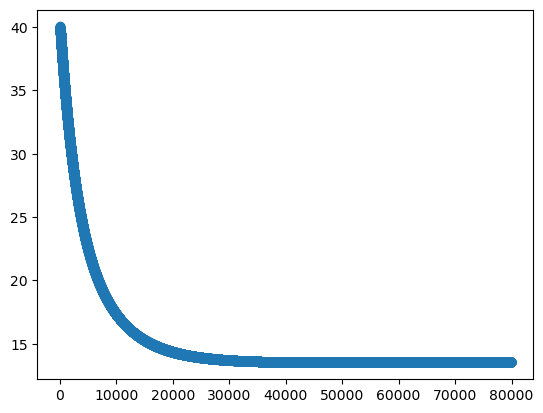

In [424]:
plt.scatter( range(num_iterations), all_costs) #

With Tolerance 10^{-6}. and iterations 10000

In [430]:
num_iterations = 10000  #1000000,100000,10000
learningRate = 0.001      #   0.01,0.00001 ,0.001
tolerance=0.000001 # 0.000001. 
all_costs = []
b,w = initialize_betas(df.shape[1])
print("initial guess of b and w: " , b ,w)
# Add Meaassure of time
total_classification_error=[]
start_time = time.time()
for each_iter in range (num_iterations ):
    
    y_hat = sigmoid(b, w , df)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w, grad = update_beta (prev_b, prev_w, Y, y_hat, df, learningRate)
    
    #Breaking code if magnitude is less than 0.001
    if np.all(np.abs(grad) < tolerance):
        print('Converged on  :',each_iter)
        num_iterations=each_iter
        break
    
    all_costs.append(current_cost)
    #total_classification_error.append(new_classification_error)
    
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost or Cross Entropy Error: ', current_cost)
        each_iter += 1
train_time = time.time() - start_time
print('Training Time is:',train_time)
new_classification_error,y_pred = classification_error(y_hat.tolist(),Y)
print('Classification Error is:',new_classification_error)
print("Final estimates of b and q are: ", b,w)
acc = accuracy_score(Y, y_pred)
print("My Accuracy:", acc)


initial guess of b and w:  0.7332588916265794 [0.43158207 0.14216022 0.52424715 0.17519412 0.014162   0.23997723
 0.46837876 0.16912409 0.77974135 0.74204635 0.36716008 0.11855494
 0.47083246]
Iteration:  0 Cost or Cross Entropy Error:  30.627867416145058
Iteration:  10 Cost or Cross Entropy Error:  30.59096814049575
Iteration:  20 Cost or Cross Entropy Error:  30.55418097038653
Iteration:  30 Cost or Cross Entropy Error:  30.51750546074367
Iteration:  40 Cost or Cross Entropy Error:  30.480941168250148
Iteration:  50 Cost or Cross Entropy Error:  30.444487651341827
Iteration:  60 Cost or Cross Entropy Error:  30.40814447020374
Iteration:  70 Cost or Cross Entropy Error:  30.37191118676609
Iteration:  80 Cost or Cross Entropy Error:  30.33578736470049
Iteration:  90 Cost or Cross Entropy Error:  30.299772569415943
Iteration:  100 Cost or Cross Entropy Error:  30.263866368054995
Iteration:  110 Cost or Cross Entropy Error:  30.228068329489673
Iteration:  120 Cost or Cross Entropy Error:

Iteration:  2320 Cost or Cross Entropy Error:  24.339663025604978
Iteration:  2330 Cost or Cross Entropy Error:  24.319926160946665
Iteration:  2340 Cost or Cross Entropy Error:  24.300235877886657
Iteration:  2350 Cost or Cross Entropy Error:  24.28059201657804
Iteration:  2360 Cost or Cross Entropy Error:  24.260994417899944
Iteration:  2370 Cost or Cross Entropy Error:  24.241442923454052
Iteration:  2380 Cost or Cross Entropy Error:  24.221937375561094
Iteration:  2390 Cost or Cross Entropy Error:  24.202477617257433
Iteration:  2400 Cost or Cross Entropy Error:  24.18306349229159
Iteration:  2410 Cost or Cross Entropy Error:  24.16369484512084
Iteration:  2420 Cost or Cross Entropy Error:  24.14437152090775
Iteration:  2430 Cost or Cross Entropy Error:  24.125093365516825
Iteration:  2440 Cost or Cross Entropy Error:  24.105860225511073
Iteration:  2450 Cost or Cross Entropy Error:  24.086671948148673
Iteration:  2460 Cost or Cross Entropy Error:  24.06752838137956
Iteration:  247

Iteration:  4660 Cost or Cross Entropy Error:  20.72574803938194
Iteration:  4670 Cost or Cross Entropy Error:  20.713731479312017
Iteration:  4680 Cost or Cross Entropy Error:  20.701738067335963
Iteration:  4690 Cost or Cross Entropy Error:  20.689767744119848
Iteration:  4700 Cost or Cross Entropy Error:  20.677820450553774
Iteration:  4710 Cost or Cross Entropy Error:  20.665896127750756
Iteration:  4720 Cost or Cross Entropy Error:  20.653994717045588
Iteration:  4730 Cost or Cross Entropy Error:  20.642116159993765
Iteration:  4740 Cost or Cross Entropy Error:  20.630260398370382
Iteration:  4750 Cost or Cross Entropy Error:  20.618427374169038
Iteration:  4760 Cost or Cross Entropy Error:  20.606617029600756
Iteration:  4770 Cost or Cross Entropy Error:  20.594829307092915
Iteration:  4780 Cost or Cross Entropy Error:  20.583064149288145
Iteration:  4790 Cost or Cross Entropy Error:  20.571321499043304
Iteration:  4800 Cost or Cross Entropy Error:  20.559601299428376
Iteration: 

Iteration:  7110 Cost or Cross Entropy Error:  18.356320707717373
Iteration:  7120 Cost or Cross Entropy Error:  18.348616097639233
Iteration:  7130 Cost or Cross Entropy Error:  18.34092479556558
Iteration:  7140 Cost or Cross Entropy Error:  18.33324677463791
Iteration:  7150 Cost or Cross Entropy Error:  18.325582008070825
Iteration:  7160 Cost or Cross Entropy Error:  18.317930469151776
Iteration:  7170 Cost or Cross Entropy Error:  18.31029213124079
Iteration:  7180 Cost or Cross Entropy Error:  18.302666967770136
Iteration:  7190 Cost or Cross Entropy Error:  18.295054952244048
Iteration:  7200 Cost or Cross Entropy Error:  18.28745605823848
Iteration:  7210 Cost or Cross Entropy Error:  18.27987025940076
Iteration:  7220 Cost or Cross Entropy Error:  18.27229752944931
Iteration:  7230 Cost or Cross Entropy Error:  18.264737842173425
Iteration:  7240 Cost or Cross Entropy Error:  18.257191171432904
Iteration:  7250 Cost or Cross Entropy Error:  18.24965749115786
Iteration:  7260 

Iteration:  9100 Cost or Cross Entropy Error:  17.05455265978174
Iteration:  9110 Cost or Cross Entropy Error:  17.049046376763737
Iteration:  9120 Cost or Cross Entropy Error:  17.043549196602072
Iteration:  9130 Cost or Cross Entropy Error:  17.038061102737004
Iteration:  9140 Cost or Cross Entropy Error:  17.03258207864494
Iteration:  9150 Cost or Cross Entropy Error:  17.027112107838356
Iteration:  9160 Cost or Cross Entropy Error:  17.021651173865646
Iteration:  9170 Cost or Cross Entropy Error:  17.016199260311026
Iteration:  9180 Cost or Cross Entropy Error:  17.010756350794455
Iteration:  9190 Cost or Cross Entropy Error:  17.005322428971454
Iteration:  9200 Cost or Cross Entropy Error:  16.999897478533093
Iteration:  9210 Cost or Cross Entropy Error:  16.994481483205792
Iteration:  9220 Cost or Cross Entropy Error:  16.989074426751287
Iteration:  9230 Cost or Cross Entropy Error:  16.98367629296647
Iteration:  9240 Cost or Cross Entropy Error:  16.97828706568332
Iteration:  92

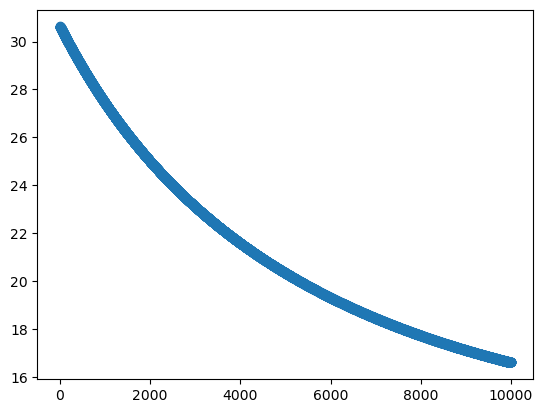

In [431]:
plt.scatter( range(num_iterations), all_costs) #

With Tolerance 10^{-6}. and iterations 100000

In [432]:
num_iterations = 100000  #1000000,100000,10000
learningRate = 0.001      #   0.01,0.00001 ,0.001
tolerance=0.000001 # 0.000001. 
all_costs = []
b,w = initialize_betas(df.shape[1])
print("initial guess of b and w: " , b ,w)
# Add Meaassure of time
total_classification_error=[]
start_time = time.time()
for each_iter in range (num_iterations ):
    
    y_hat = sigmoid(b, w , df)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w, grad = update_beta (prev_b, prev_w, Y, y_hat, df, learningRate)
    
    #Breaking code if magnitude is less than 0.001
    if np.all(np.abs(grad) < tolerance):
        print('Converged on  :',each_iter)
        num_iterations=each_iter
        break
    
    all_costs.append(current_cost)
    #total_classification_error.append(new_classification_error)
    
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost or Cross Entropy Error: ', current_cost)
        each_iter += 1
train_time = time.time() - start_time
print('Training Time is:',train_time)
new_classification_error,y_pred = classification_error(y_hat.tolist(),Y)
print('Classification Error is:',new_classification_error)
print("Final estimates of b and q are: ", b,w)
acc = accuracy_score(Y, y_pred)
print("My Accuracy:", acc)


initial guess of b and w:  0.22021900371802405 [0.48864642 0.87548655 0.02113711 0.05418624 0.48362868 0.08497275
 0.40932885 0.81965905 0.58379001 0.9776471  0.8543589  0.30701672
 0.18672026]
Iteration:  0 Cost or Cross Entropy Error:  28.713124363511646
Iteration:  10 Cost or Cross Entropy Error:  28.679606285666893
Iteration:  20 Cost or Cross Entropy Error:  28.64618959632364
Iteration:  30 Cost or Cross Entropy Error:  28.61287379355984
Iteration:  40 Cost or Cross Entropy Error:  28.57965837909047
Iteration:  50 Cost or Cross Entropy Error:  28.5465428582401
Iteration:  60 Cost or Cross Entropy Error:  28.513526739915005
Iteration:  70 Cost or Cross Entropy Error:  28.480609536575805
Iteration:  80 Cost or Cross Entropy Error:  28.44779076421015
Iteration:  90 Cost or Cross Entropy Error:  28.415069942305404
Iteration:  100 Cost or Cross Entropy Error:  28.382446593821975
Iteration:  110 Cost or Cross Entropy Error:  28.349920245166214
Iteration:  120 Cost or Cross Entropy Error

Iteration:  2340 Cost or Cross Entropy Error:  22.89567541959133
Iteration:  2350 Cost or Cross Entropy Error:  22.877323888546144
Iteration:  2360 Cost or Cross Entropy Error:  22.85901452231757
Iteration:  2370 Cost or Cross Entropy Error:  22.840747202263803
Iteration:  2380 Cost or Cross Entropy Error:  22.822521810279195
Iteration:  2390 Cost or Cross Entropy Error:  22.804338228790034
Iteration:  2400 Cost or Cross Entropy Error:  22.786196340750344
Iteration:  2410 Cost or Cross Entropy Error:  22.76809602963766
Iteration:  2420 Cost or Cross Entropy Error:  22.750037179449
Iteration:  2430 Cost or Cross Entropy Error:  22.73201967469669
Iteration:  2440 Cost or Cross Entropy Error:  22.714043400404336
Iteration:  2450 Cost or Cross Entropy Error:  22.696108242102866
Iteration:  2460 Cost or Cross Entropy Error:  22.678214085826465
Iteration:  2470 Cost or Cross Entropy Error:  22.660360818108728
Iteration:  2480 Cost or Cross Entropy Error:  22.642548325978645
Iteration:  2490 

Iteration:  4650 Cost or Cross Entropy Error:  19.58167912287639
Iteration:  4660 Cost or Cross Entropy Error:  19.570665051827717
Iteration:  4670 Cost or Cross Entropy Error:  19.559674550347914
Iteration:  4680 Cost or Cross Entropy Error:  19.548707562120413
Iteration:  4690 Cost or Cross Entropy Error:  19.537764030967832
Iteration:  4700 Cost or Cross Entropy Error:  19.526843900851485
Iteration:  4710 Cost or Cross Entropy Error:  19.515947115870972
Iteration:  4720 Cost or Cross Entropy Error:  19.505073620263687
Iteration:  4730 Cost or Cross Entropy Error:  19.49422335840438
Iteration:  4740 Cost or Cross Entropy Error:  19.483396274804726
Iteration:  4750 Cost or Cross Entropy Error:  19.472592314112838
Iteration:  4760 Cost or Cross Entropy Error:  19.461811421112902
Iteration:  4770 Cost or Cross Entropy Error:  19.45105354072467
Iteration:  4780 Cost or Cross Entropy Error:  19.440318618003072
Iteration:  4790 Cost or Cross Entropy Error:  19.42960659813778
Iteration:  48

Iteration:  6680 Cost or Cross Entropy Error:  17.760265817639638
Iteration:  6690 Cost or Cross Entropy Error:  17.75304870115147
Iteration:  6700 Cost or Cross Entropy Error:  17.74584611719663
Iteration:  6710 Cost or Cross Entropy Error:  17.73865803141617
Iteration:  6720 Cost or Cross Entropy Error:  17.73148440953647
Iteration:  6730 Cost or Cross Entropy Error:  17.724325217369103
Iteration:  6740 Cost or Cross Entropy Error:  17.717180420810617
Iteration:  6750 Cost or Cross Entropy Error:  17.710049985842367
Iteration:  6760 Cost or Cross Entropy Error:  17.702933878530335
Iteration:  6770 Cost or Cross Entropy Error:  17.695832065024934
Iteration:  6780 Cost or Cross Entropy Error:  17.688744511560845
Iteration:  6790 Cost or Cross Entropy Error:  17.68167118445683
Iteration:  6800 Cost or Cross Entropy Error:  17.67461205011554
Iteration:  6810 Cost or Cross Entropy Error:  17.667567075023356
Iteration:  6820 Cost or Cross Entropy Error:  17.660536225750178
Iteration:  6830

Iteration:  8670 Cost or Cross Entropy Error:  16.570892904136507
Iteration:  8680 Cost or Cross Entropy Error:  16.565990277669883
Iteration:  8690 Cost or Cross Entropy Error:  16.56109680623615
Iteration:  8700 Cost or Cross Entropy Error:  16.556212469159625
Iteration:  8710 Cost or Cross Entropy Error:  16.55133724581812
Iteration:  8720 Cost or Cross Entropy Error:  16.546471115642813
Iteration:  8730 Cost or Cross Entropy Error:  16.541614058118075
Iteration:  8740 Cost or Cross Entropy Error:  16.536766052781378
Iteration:  8750 Cost or Cross Entropy Error:  16.5319270792231
Iteration:  8760 Cost or Cross Entropy Error:  16.52709711708645
Iteration:  8770 Cost or Cross Entropy Error:  16.522276146067288
Iteration:  8780 Cost or Cross Entropy Error:  16.517464145914023
Iteration:  8790 Cost or Cross Entropy Error:  16.512661096427443
Iteration:  8800 Cost or Cross Entropy Error:  16.50786697746062
Iteration:  8810 Cost or Cross Entropy Error:  16.503081768918726
Iteration:  8820

Iteration:  10910 Cost or Cross Entropy Error:  15.668035879736216
Iteration:  10920 Cost or Cross Entropy Error:  15.66475360837199
Iteration:  10930 Cost or Cross Entropy Error:  15.661476969650135
Iteration:  10940 Cost or Cross Entropy Error:  15.658205951928625
Iteration:  10950 Cost or Cross Entropy Error:  15.654940543594588
Iteration:  10960 Cost or Cross Entropy Error:  15.651680733064245
Iteration:  10970 Cost or Cross Entropy Error:  15.648426508782768
Iteration:  10980 Cost or Cross Entropy Error:  15.6451778592243
Iteration:  10990 Cost or Cross Entropy Error:  15.641934772891767
Iteration:  11000 Cost or Cross Entropy Error:  15.638697238316883
Iteration:  11010 Cost or Cross Entropy Error:  15.635465244060011
Iteration:  11020 Cost or Cross Entropy Error:  15.632238778710123
Iteration:  11030 Cost or Cross Entropy Error:  15.629017830884678
Iteration:  11040 Cost or Cross Entropy Error:  15.625802389229595
Iteration:  11050 Cost or Cross Entropy Error:  15.62259244241912

Iteration:  13160 Cost or Cross Entropy Error:  15.052351291057851
Iteration:  13170 Cost or Cross Entropy Error:  15.050090071248283
Iteration:  13180 Cost or Cross Entropy Error:  15.047832467662763
Iteration:  13190 Cost or Cross Entropy Error:  15.045578473533642
Iteration:  13200 Cost or Cross Entropy Error:  15.043328082108827
Iteration:  13210 Cost or Cross Entropy Error:  15.041081286651744
Iteration:  13220 Cost or Cross Entropy Error:  15.03883808044129
Iteration:  13230 Cost or Cross Entropy Error:  15.036598456771811
Iteration:  13240 Cost or Cross Entropy Error:  15.034362408953012
Iteration:  13250 Cost or Cross Entropy Error:  15.032129930309981
Iteration:  13260 Cost or Cross Entropy Error:  15.029901014183098
Iteration:  13270 Cost or Cross Entropy Error:  15.027675653927998
Iteration:  13280 Cost or Cross Entropy Error:  15.025453842915555
Iteration:  13290 Cost or Cross Entropy Error:  15.023235574531812
Iteration:  13300 Cost or Cross Entropy Error:  15.021020842177

Iteration:  15580 Cost or Cross Entropy Error:  14.596716530578165
Iteration:  15590 Cost or Cross Entropy Error:  14.59516418689192
Iteration:  15600 Cost or Cross Entropy Error:  14.593614191277192
Iteration:  15610 Cost or Cross Entropy Error:  14.592066539737477
Iteration:  15620 Cost or Cross Entropy Error:  14.590521228284468
Iteration:  15630 Cost or Cross Entropy Error:  14.588978252938043
Iteration:  15640 Cost or Cross Entropy Error:  14.58743760972621
Iteration:  15650 Cost or Cross Entropy Error:  14.585899294685126
Iteration:  15660 Cost or Cross Entropy Error:  14.584363303859059
Iteration:  15670 Cost or Cross Entropy Error:  14.582829633300351
Iteration:  15680 Cost or Cross Entropy Error:  14.58129827906943
Iteration:  15690 Cost or Cross Entropy Error:  14.579769237234771
Iteration:  15700 Cost or Cross Entropy Error:  14.578242503872866
Iteration:  15710 Cost or Cross Entropy Error:  14.57671807506824
Iteration:  15720 Cost or Cross Entropy Error:  14.575195946913382

Iteration:  17730 Cost or Cross Entropy Error:  14.311093085606402
Iteration:  17740 Cost or Cross Entropy Error:  14.309965428620037
Iteration:  17750 Cost or Cross Entropy Error:  14.308839419781915
Iteration:  17760 Cost or Cross Entropy Error:  14.307715056465916
Iteration:  17770 Cost or Cross Entropy Error:  14.306592336050825
Iteration:  17780 Cost or Cross Entropy Error:  14.305471255920258
Iteration:  17790 Cost or Cross Entropy Error:  14.304351813462732
Iteration:  17800 Cost or Cross Entropy Error:  14.303234006071582
Iteration:  17810 Cost or Cross Entropy Error:  14.30211783114498
Iteration:  17820 Cost or Cross Entropy Error:  14.301003286085937
Iteration:  17830 Cost or Cross Entropy Error:  14.299890368302263
Iteration:  17840 Cost or Cross Entropy Error:  14.298779075206584
Iteration:  17850 Cost or Cross Entropy Error:  14.2976694042163
Iteration:  17860 Cost or Cross Entropy Error:  14.296561352753614
Iteration:  17870 Cost or Cross Entropy Error:  14.29545491824548

Iteration:  20270 Cost or Cross Entropy Error:  14.071278912585319
Iteration:  20280 Cost or Cross Entropy Error:  14.070497021720056
Iteration:  20290 Cost or Cross Entropy Error:  14.069716243223914
Iteration:  20300 Cost or Cross Entropy Error:  14.068936575421835
Iteration:  20310 Cost or Cross Entropy Error:  14.068158016641588
Iteration:  20320 Cost or Cross Entropy Error:  14.067380565213774
Iteration:  20330 Cost or Cross Entropy Error:  14.066604219471802
Iteration:  20340 Cost or Cross Entropy Error:  14.065828977751895
Iteration:  20350 Cost or Cross Entropy Error:  14.065054838393086
Iteration:  20360 Cost or Cross Entropy Error:  14.064281799737211
Iteration:  20370 Cost or Cross Entropy Error:  14.063509860128892
Iteration:  20380 Cost or Cross Entropy Error:  14.062739017915547
Iteration:  20390 Cost or Cross Entropy Error:  14.06196927144738
Iteration:  20400 Cost or Cross Entropy Error:  14.06120061907737
Iteration:  20410 Cost or Cross Entropy Error:  14.0604330591612

Iteration:  22630 Cost or Cross Entropy Error:  13.914301670036995
Iteration:  22640 Cost or Cross Entropy Error:  13.913741324915556
Iteration:  22650 Cost or Cross Entropy Error:  13.913181764550298
Iteration:  22660 Cost or Cross Entropy Error:  13.912622987801964
Iteration:  22670 Cost or Cross Entropy Error:  13.912064993533102
Iteration:  22680 Cost or Cross Entropy Error:  13.911507780608071
Iteration:  22690 Cost or Cross Entropy Error:  13.910951347893004
Iteration:  22700 Cost or Cross Entropy Error:  13.91039569425584
Iteration:  22710 Cost or Cross Entropy Error:  13.909840818566307
Iteration:  22720 Cost or Cross Entropy Error:  13.909286719695908
Iteration:  22730 Cost or Cross Entropy Error:  13.908733396517945
Iteration:  22740 Cost or Cross Entropy Error:  13.908180847907488
Iteration:  22750 Cost or Cross Entropy Error:  13.907629072741377
Iteration:  22760 Cost or Cross Entropy Error:  13.907078069898239
Iteration:  22770 Cost or Cross Entropy Error:  13.906527838258

Iteration:  25010 Cost or Cross Entropy Error:  13.800760893694456
Iteration:  25020 Cost or Cross Entropy Error:  13.800358801164455
Iteration:  25030 Cost or Cross Entropy Error:  13.799957266640293
Iteration:  25040 Cost or Cross Entropy Error:  13.799556289333054
Iteration:  25050 Cost or Cross Entropy Error:  13.799155868455012
Iteration:  25060 Cost or Cross Entropy Error:  13.798756003219632
Iteration:  25070 Cost or Cross Entropy Error:  13.798356692841551
Iteration:  25080 Cost or Cross Entropy Error:  13.797957936536625
Iteration:  25090 Cost or Cross Entropy Error:  13.79755973352185
Iteration:  25100 Cost or Cross Entropy Error:  13.797162083015424
Iteration:  25110 Cost or Cross Entropy Error:  13.79676498423673
Iteration:  25120 Cost or Cross Entropy Error:  13.796368436406306
Iteration:  25130 Cost or Cross Entropy Error:  13.795972438745881
Iteration:  25140 Cost or Cross Entropy Error:  13.795576990478352
Iteration:  25150 Cost or Cross Entropy Error:  13.7951820908277

Iteration:  27400 Cost or Cross Entropy Error:  13.718904665888509
Iteration:  27410 Cost or Cross Entropy Error:  13.718615930941946
Iteration:  27420 Cost or Cross Entropy Error:  13.71832759528173
Iteration:  27430 Cost or Cross Entropy Error:  13.718039658354362
Iteration:  27440 Cost or Cross Entropy Error:  13.717752119607132
Iteration:  27450 Cost or Cross Entropy Error:  13.717464978488142
Iteration:  27460 Cost or Cross Entropy Error:  13.717178234446306
Iteration:  27470 Cost or Cross Entropy Error:  13.71689188693132
Iteration:  27480 Cost or Cross Entropy Error:  13.716605935393702
Iteration:  27490 Cost or Cross Entropy Error:  13.716320379284765
Iteration:  27500 Cost or Cross Entropy Error:  13.716035218056613
Iteration:  27510 Cost or Cross Entropy Error:  13.715750451162155
Iteration:  27520 Cost or Cross Entropy Error:  13.715466078055101
Iteration:  27530 Cost or Cross Entropy Error:  13.715182098189945
Iteration:  27540 Cost or Cross Entropy Error:  13.7148985110219

Iteration:  29720 Cost or Cross Entropy Error:  13.661568815202044
Iteration:  29730 Cost or Cross Entropy Error:  13.661359401744981
Iteration:  29740 Cost or Cross Entropy Error:  13.661150278405497
Iteration:  29750 Cost or Cross Entropy Error:  13.660941444787298
Iteration:  29760 Cost or Cross Entropy Error:  13.660732900494619
Iteration:  29770 Cost or Cross Entropy Error:  13.660524645132293
Iteration:  29780 Cost or Cross Entropy Error:  13.66031667830568
Iteration:  29790 Cost or Cross Entropy Error:  13.660108999620745
Iteration:  29800 Cost or Cross Entropy Error:  13.659901608683972
Iteration:  29810 Cost or Cross Entropy Error:  13.659694505102422
Iteration:  29820 Cost or Cross Entropy Error:  13.659487688483715
Iteration:  29830 Cost or Cross Entropy Error:  13.659281158436023
Iteration:  29840 Cost or Cross Entropy Error:  13.65907491456808
Iteration:  29850 Cost or Cross Entropy Error:  13.658868956489174
Iteration:  29860 Cost or Cross Entropy Error:  13.6586632838091

Iteration:  32050 Cost or Cross Entropy Error:  13.619855025068357
Iteration:  32060 Cost or Cross Entropy Error:  13.619703575325747
Iteration:  32070 Cost or Cross Entropy Error:  13.61955233696942
Iteration:  32080 Cost or Cross Entropy Error:  13.619401309713938
Iteration:  32090 Cost or Cross Entropy Error:  13.61925049327426
Iteration:  32100 Cost or Cross Entropy Error:  13.619099887365744
Iteration:  32110 Cost or Cross Entropy Error:  13.618949491704143
Iteration:  32120 Cost or Cross Entropy Error:  13.618799306005599
Iteration:  32130 Cost or Cross Entropy Error:  13.61864932998666
Iteration:  32140 Cost or Cross Entropy Error:  13.61849956336427
Iteration:  32150 Cost or Cross Entropy Error:  13.61835000585576
Iteration:  32160 Cost or Cross Entropy Error:  13.618200657178862
Iteration:  32170 Cost or Cross Entropy Error:  13.618051517051688
Iteration:  32180 Cost or Cross Entropy Error:  13.617902585192757
Iteration:  32190 Cost or Cross Entropy Error:  13.617753861320974


Iteration:  34410 Cost or Cross Entropy Error:  13.58940414568035
Iteration:  34420 Cost or Cross Entropy Error:  13.589295459812476
Iteration:  34430 Cost or Cross Entropy Error:  13.589186927842634
Iteration:  34440 Cost or Cross Entropy Error:  13.589078549564878
Iteration:  34450 Cost or Cross Entropy Error:  13.588970324773536
Iteration:  34460 Cost or Cross Entropy Error:  13.588862253263217
Iteration:  34470 Cost or Cross Entropy Error:  13.588754334828826
Iteration:  34480 Cost or Cross Entropy Error:  13.588646569265533
Iteration:  34490 Cost or Cross Entropy Error:  13.588538956368794
Iteration:  34500 Cost or Cross Entropy Error:  13.58843149593434
Iteration:  34510 Cost or Cross Entropy Error:  13.588324187758195
Iteration:  34520 Cost or Cross Entropy Error:  13.588217031636658
Iteration:  34530 Cost or Cross Entropy Error:  13.5881100273663
Iteration:  34540 Cost or Cross Entropy Error:  13.588003174743966
Iteration:  34550 Cost or Cross Entropy Error:  13.587896473566799

Iteration:  36850 Cost or Cross Entropy Error:  13.56699276587556
Iteration:  36860 Cost or Cross Entropy Error:  13.566916146182576
Iteration:  36870 Cost or Cross Entropy Error:  13.56683963761727
Iteration:  36880 Cost or Cross Entropy Error:  13.566763240031898
Iteration:  36890 Cost or Cross Entropy Error:  13.5666869532789
Iteration:  36900 Cost or Cross Entropy Error:  13.566610777210935
Iteration:  36910 Cost or Cross Entropy Error:  13.56653471168084
Iteration:  36920 Cost or Cross Entropy Error:  13.566458756541675
Iteration:  36930 Cost or Cross Entropy Error:  13.566382911646674
Iteration:  36940 Cost or Cross Entropy Error:  13.566307176849289
Iteration:  36950 Cost or Cross Entropy Error:  13.56623155200316
Iteration:  36960 Cost or Cross Entropy Error:  13.566156036962122
Iteration:  36970 Cost or Cross Entropy Error:  13.566080631580208
Iteration:  36980 Cost or Cross Entropy Error:  13.566005335711658
Iteration:  36990 Cost or Cross Entropy Error:  13.565930149210898
I

Iteration:  39310 Cost or Cross Entropy Error:  13.551158815051185
Iteration:  39320 Cost or Cross Entropy Error:  13.551105530252908
Iteration:  39330 Cost or Cross Entropy Error:  13.551052325616302
Iteration:  39340 Cost or Cross Entropy Error:  13.550999201035145
Iteration:  39350 Cost or Cross Entropy Error:  13.550946156403379
Iteration:  39360 Cost or Cross Entropy Error:  13.55089319161506
Iteration:  39370 Cost or Cross Entropy Error:  13.550840306564409
Iteration:  39380 Cost or Cross Entropy Error:  13.55078750114577
Iteration:  39390 Cost or Cross Entropy Error:  13.550734775253641
Iteration:  39400 Cost or Cross Entropy Error:  13.550682128782649
Iteration:  39410 Cost or Cross Entropy Error:  13.550629561627572
Iteration:  39420 Cost or Cross Entropy Error:  13.550577073683323
Iteration:  39430 Cost or Cross Entropy Error:  13.550524664844955
Iteration:  39440 Cost or Cross Entropy Error:  13.550472335007655
Iteration:  39450 Cost or Cross Entropy Error:  13.5504200840667

Iteration:  41620 Cost or Cross Entropy Error:  13.540779519546833
Iteration:  41630 Cost or Cross Entropy Error:  13.540742196171239
Iteration:  41640 Cost or Cross Entropy Error:  13.540704931813588
Iteration:  41650 Cost or Cross Entropy Error:  13.540667726395668
Iteration:  41660 Cost or Cross Entropy Error:  13.540630579839373
Iteration:  41670 Cost or Cross Entropy Error:  13.540593492066701
Iteration:  41680 Cost or Cross Entropy Error:  13.540556462999758
Iteration:  41690 Cost or Cross Entropy Error:  13.540519492560735
Iteration:  41700 Cost or Cross Entropy Error:  13.540482580671945
Iteration:  41710 Cost or Cross Entropy Error:  13.540445727255792
Iteration:  41720 Cost or Cross Entropy Error:  13.54040893223479
Iteration:  41730 Cost or Cross Entropy Error:  13.540372195531544
Iteration:  41740 Cost or Cross Entropy Error:  13.54033551706877
Iteration:  41750 Cost or Cross Entropy Error:  13.540298896769281
Iteration:  41760 Cost or Cross Entropy Error:  13.5402623345559

Iteration:  44070 Cost or Cross Entropy Error:  13.533224133314407
Iteration:  44080 Cost or Cross Entropy Error:  13.533199161735366
Iteration:  44090 Cost or Cross Entropy Error:  13.533174232778169
Iteration:  44100 Cost or Cross Entropy Error:  13.533149346386082
Iteration:  44110 Cost or Cross Entropy Error:  13.533124502502439
Iteration:  44120 Cost or Cross Entropy Error:  13.53309970107066
Iteration:  44130 Cost or Cross Entropy Error:  13.533074942034222
Iteration:  44140 Cost or Cross Entropy Error:  13.533050225336698
Iteration:  44150 Cost or Cross Entropy Error:  13.533025550921707
Iteration:  44160 Cost or Cross Entropy Error:  13.533000918732963
Iteration:  44170 Cost or Cross Entropy Error:  13.532976328714247
Iteration:  44180 Cost or Cross Entropy Error:  13.5329517808094
Iteration:  44190 Cost or Cross Entropy Error:  13.532927274962363
Iteration:  44200 Cost or Cross Entropy Error:  13.532902811117125
Iteration:  44210 Cost or Cross Entropy Error:  13.53287838921776

Iteration:  46180 Cost or Cross Entropy Error:  13.52881746309833
Iteration:  46190 Cost or Cross Entropy Error:  13.528800334261788
Iteration:  46200 Cost or Cross Entropy Error:  13.528783237570075
Iteration:  46210 Cost or Cross Entropy Error:  13.528766172980035
Iteration:  46220 Cost or Cross Entropy Error:  13.528749140448584
Iteration:  46230 Cost or Cross Entropy Error:  13.528732139932686
Iteration:  46240 Cost or Cross Entropy Error:  13.528715171389361
Iteration:  46250 Cost or Cross Entropy Error:  13.52869823477568
Iteration:  46260 Cost or Cross Entropy Error:  13.528681330048785
Iteration:  46270 Cost or Cross Entropy Error:  13.52866445716586
Iteration:  46280 Cost or Cross Entropy Error:  13.528647616084138
Iteration:  46290 Cost or Cross Entropy Error:  13.528630806760924
Iteration:  46300 Cost or Cross Entropy Error:  13.528614029153573
Iteration:  46310 Cost or Cross Entropy Error:  13.528597283219488
Iteration:  46320 Cost or Cross Entropy Error:  13.52858056891613

Iteration:  48560 Cost or Cross Entropy Error:  13.525558490074218
Iteration:  48570 Cost or Cross Entropy Error:  13.525547909436709
Iteration:  48580 Cost or Cross Entropy Error:  13.525537352095231
Iteration:  48590 Cost or Cross Entropy Error:  13.525526818018037
Iteration:  48600 Cost or Cross Entropy Error:  13.5255163071734
Iteration:  48610 Cost or Cross Entropy Error:  13.525505819529641
Iteration:  48620 Cost or Cross Entropy Error:  13.525495355055122
Iteration:  48630 Cost or Cross Entropy Error:  13.525484913718248
Iteration:  48640 Cost or Cross Entropy Error:  13.525474495487462
Iteration:  48650 Cost or Cross Entropy Error:  13.52546410033124
Iteration:  48660 Cost or Cross Entropy Error:  13.525453728218114
Iteration:  48670 Cost or Cross Entropy Error:  13.525443379116643
Iteration:  48680 Cost or Cross Entropy Error:  13.525433052995433
Iteration:  48690 Cost or Cross Entropy Error:  13.525422749823127
Iteration:  48700 Cost or Cross Entropy Error:  13.52541246956841

Iteration:  50960 Cost or Cross Entropy Error:  13.52362016962636
Iteration:  50970 Cost or Cross Entropy Error:  13.52361435502365
Iteration:  50980 Cost or Cross Entropy Error:  13.523608557149876
Iteration:  50990 Cost or Cross Entropy Error:  13.52360277598167
Iteration:  51000 Cost or Cross Entropy Error:  13.523597011495697
Iteration:  51010 Cost or Cross Entropy Error:  13.523591263668646
Iteration:  51020 Cost or Cross Entropy Error:  13.52358553247724
Iteration:  51030 Cost or Cross Entropy Error:  13.523579817898232
Iteration:  51040 Cost or Cross Entropy Error:  13.523574119908407
Iteration:  51050 Cost or Cross Entropy Error:  13.523568438484569
Iteration:  51060 Cost or Cross Entropy Error:  13.523562773603556
Iteration:  51070 Cost or Cross Entropy Error:  13.523557125242256
Iteration:  51080 Cost or Cross Entropy Error:  13.523551493377546
Iteration:  51090 Cost or Cross Entropy Error:  13.523545877986372
Iteration:  51100 Cost or Cross Entropy Error:  13.523540279045685

Iteration:  53250 Cost or Cross Entropy Error:  13.522682333011337
Iteration:  53260 Cost or Cross Entropy Error:  13.522679794097735
Iteration:  53270 Cost or Cross Entropy Error:  13.52267726726892
Iteration:  53280 Cost or Cross Entropy Error:  13.522674752507433
Iteration:  53290 Cost or Cross Entropy Error:  13.522672249795841
Iteration:  53300 Cost or Cross Entropy Error:  13.522669759116729
Iteration:  53310 Cost or Cross Entropy Error:  13.522667280452712
Iteration:  53320 Cost or Cross Entropy Error:  13.522664813786411
Iteration:  53330 Cost or Cross Entropy Error:  13.522662359100494
Iteration:  53340 Cost or Cross Entropy Error:  13.522659916377625
Iteration:  53350 Cost or Cross Entropy Error:  13.52265748560051
Iteration:  53360 Cost or Cross Entropy Error:  13.522655066751856
Iteration:  53370 Cost or Cross Entropy Error:  13.522652659814415
Iteration:  53380 Cost or Cross Entropy Error:  13.52265026477095
Iteration:  53390 Cost or Cross Entropy Error:  13.52264788160424

Iteration:  55560 Cost or Cross Entropy Error:  13.522383899686405
Iteration:  55570 Cost or Cross Entropy Error:  13.522383730511661
Iteration:  55580 Cost or Cross Entropy Error:  13.522383569925102
Iteration:  55590 Cost or Cross Entropy Error:  13.522383417913737
Iteration:  55600 Cost or Cross Entropy Error:  13.522383274464547
Iteration:  55610 Cost or Cross Entropy Error:  13.522383139564559
Iteration:  55620 Cost or Cross Entropy Error:  13.522383013200809
Iteration:  55630 Cost or Cross Entropy Error:  13.522382895360346
Iteration:  55640 Cost or Cross Entropy Error:  13.522382786030239
Iteration:  55650 Cost or Cross Entropy Error:  13.522382685197577
Iteration:  55660 Cost or Cross Entropy Error:  13.522382592849453
Iteration:  55670 Cost or Cross Entropy Error:  13.522382508972992
Iteration:  55680 Cost or Cross Entropy Error:  13.522382433555322
Iteration:  55690 Cost or Cross Entropy Error:  13.5223823665836
Iteration:  55700 Cost or Cross Entropy Error:  13.5223823080449

Iteration:  57860 Cost or Cross Entropy Error:  13.52254688866234
Iteration:  57870 Cost or Cross Entropy Error:  13.522548382909223
Iteration:  57880 Cost or Cross Entropy Error:  13.522549883147756
Iteration:  57890 Cost or Cross Entropy Error:  13.522551389368227
Iteration:  57900 Cost or Cross Entropy Error:  13.522552901560932
Iteration:  57910 Cost or Cross Entropy Error:  13.522554419716192
Iteration:  57920 Cost or Cross Entropy Error:  13.522555943824342
Iteration:  57930 Cost or Cross Entropy Error:  13.52255747387571
Iteration:  57940 Cost or Cross Entropy Error:  13.522559009860656
Iteration:  57950 Cost or Cross Entropy Error:  13.522560551769546
Iteration:  57960 Cost or Cross Entropy Error:  13.52256209959275
Iteration:  57970 Cost or Cross Entropy Error:  13.52256365332067
Iteration:  57980 Cost or Cross Entropy Error:  13.52256521294369
Iteration:  57990 Cost or Cross Entropy Error:  13.522566778452244
Iteration:  58000 Cost or Cross Entropy Error:  13.522568349836739


Iteration:  60310 Cost or Cross Entropy Error:  13.523070273486697
Iteration:  60320 Cost or Cross Entropy Error:  13.523072973340675
Iteration:  60330 Cost or Cross Entropy Error:  13.523075677143117
Iteration:  60340 Cost or Cross Entropy Error:  13.523078384886928
Iteration:  60350 Cost or Cross Entropy Error:  13.523081096565026
Iteration:  60360 Cost or Cross Entropy Error:  13.523083812170341
Iteration:  60370 Cost or Cross Entropy Error:  13.523086531695798
Iteration:  60380 Cost or Cross Entropy Error:  13.523089255134353
Iteration:  60390 Cost or Cross Entropy Error:  13.523091982478958
Iteration:  60400 Cost or Cross Entropy Error:  13.523094713722566
Iteration:  60410 Cost or Cross Entropy Error:  13.523097448858152
Iteration:  60420 Cost or Cross Entropy Error:  13.523100187878706
Iteration:  60430 Cost or Cross Entropy Error:  13.523102930777208
Iteration:  60440 Cost or Cross Entropy Error:  13.523105677546658
Iteration:  60450 Cost or Cross Entropy Error:  13.52310842818

Iteration:  62450 Cost or Cross Entropy Error:  13.523727346690826
Iteration:  62460 Cost or Cross Entropy Error:  13.523730743677985
Iteration:  62470 Cost or Cross Entropy Error:  13.523734143287006
Iteration:  62480 Cost or Cross Entropy Error:  13.523737545512505
Iteration:  62490 Cost or Cross Entropy Error:  13.523740950349126
Iteration:  62500 Cost or Cross Entropy Error:  13.523744357791495
Iteration:  62510 Cost or Cross Entropy Error:  13.523747767834271
Iteration:  62520 Cost or Cross Entropy Error:  13.523751180472106
Iteration:  62530 Cost or Cross Entropy Error:  13.523754595699657
Iteration:  62540 Cost or Cross Entropy Error:  13.523758013511598
Iteration:  62550 Cost or Cross Entropy Error:  13.5237614339026
Iteration:  62560 Cost or Cross Entropy Error:  13.523764856867345
Iteration:  62570 Cost or Cross Entropy Error:  13.523768282400523
Iteration:  62580 Cost or Cross Entropy Error:  13.523771710496838
Iteration:  62590 Cost or Cross Entropy Error:  13.5237751411509

Iteration:  64960 Cost or Cross Entropy Error:  13.52464932451246
Iteration:  64970 Cost or Cross Entropy Error:  13.52465322794095
Iteration:  64980 Cost or Cross Entropy Error:  13.524657132841744
Iteration:  64990 Cost or Cross Entropy Error:  13.52466103921099
Iteration:  65000 Cost or Cross Entropy Error:  13.52466494704483
Iteration:  65010 Cost or Cross Entropy Error:  13.52466885633942
Iteration:  65020 Cost or Cross Entropy Error:  13.52467276709092
Iteration:  65030 Cost or Cross Entropy Error:  13.524676679295492
Iteration:  65040 Cost or Cross Entropy Error:  13.524680592949302
Iteration:  65050 Cost or Cross Entropy Error:  13.524684508048518
Iteration:  65060 Cost or Cross Entropy Error:  13.524688424589332
Iteration:  65070 Cost or Cross Entropy Error:  13.524692342567917
Iteration:  65080 Cost or Cross Entropy Error:  13.524696261980466
Iteration:  65090 Cost or Cross Entropy Error:  13.524700182823171
Iteration:  65100 Cost or Cross Entropy Error:  13.52470410509223
It

Iteration:  67120 Cost or Cross Entropy Error:  13.525520694567712
Iteration:  67130 Cost or Cross Entropy Error:  13.525524834452325
Iteration:  67140 Cost or Cross Entropy Error:  13.52552897508593
Iteration:  67150 Cost or Cross Entropy Error:  13.525533116465667
Iteration:  67160 Cost or Cross Entropy Error:  13.525537258588635
Iteration:  67170 Cost or Cross Entropy Error:  13.525541401451981
Iteration:  67180 Cost or Cross Entropy Error:  13.525545545052834
Iteration:  67190 Cost or Cross Entropy Error:  13.52554968938833
Iteration:  67200 Cost or Cross Entropy Error:  13.52555383445562
Iteration:  67210 Cost or Cross Entropy Error:  13.525557980251834
Iteration:  67220 Cost or Cross Entropy Error:  13.525562126774139
Iteration:  67230 Cost or Cross Entropy Error:  13.525566274019674
Iteration:  67240 Cost or Cross Entropy Error:  13.525570421985606
Iteration:  67250 Cost or Cross Entropy Error:  13.525574570669093
Iteration:  67260 Cost or Cross Entropy Error:  13.52557872006729

Iteration:  69520 Cost or Cross Entropy Error:  13.52652970441784
Iteration:  69530 Cost or Cross Entropy Error:  13.52653394991734
Iteration:  69540 Cost or Cross Entropy Error:  13.52653819557849
Iteration:  69550 Cost or Cross Entropy Error:  13.526542441399236
Iteration:  69560 Cost or Cross Entropy Error:  13.52654668737753
Iteration:  69570 Cost or Cross Entropy Error:  13.526550933511322
Iteration:  69580 Cost or Cross Entropy Error:  13.526555179798576
Iteration:  69590 Cost or Cross Entropy Error:  13.526559426237243
Iteration:  69600 Cost or Cross Entropy Error:  13.526563672825288
Iteration:  69610 Cost or Cross Entropy Error:  13.526567919560671
Iteration:  69620 Cost or Cross Entropy Error:  13.52657216644137
Iteration:  69630 Cost or Cross Entropy Error:  13.52657641346534
Iteration:  69640 Cost or Cross Entropy Error:  13.52658066063057
Iteration:  69650 Cost or Cross Entropy Error:  13.526584907935025
Iteration:  69660 Cost or Cross Entropy Error:  13.526589155376689
It

Iteration:  71900 Cost or Cross Entropy Error:  13.527540501760777
Iteration:  71910 Cost or Cross Entropy Error:  13.527544733947169
Iteration:  71920 Cost or Cross Entropy Error:  13.527548965882533
Iteration:  71930 Cost or Cross Entropy Error:  13.52755319756543
Iteration:  71940 Cost or Cross Entropy Error:  13.527557428994418
Iteration:  71950 Cost or Cross Entropy Error:  13.527561660168066
Iteration:  71960 Cost or Cross Entropy Error:  13.527565891084931
Iteration:  71970 Cost or Cross Entropy Error:  13.527570121743583
Iteration:  71980 Cost or Cross Entropy Error:  13.52757435214259
Iteration:  71990 Cost or Cross Entropy Error:  13.527578582280526
Iteration:  72000 Cost or Cross Entropy Error:  13.527582812155966
Iteration:  72010 Cost or Cross Entropy Error:  13.52758704176749
Iteration:  72020 Cost or Cross Entropy Error:  13.527591271113662
Iteration:  72030 Cost or Cross Entropy Error:  13.527595500193067
Iteration:  72040 Cost or Cross Entropy Error:  13.52759972900429

Iteration:  74230 Cost or Cross Entropy Error:  13.528517066667462
Iteration:  74240 Cost or Cross Entropy Error:  13.528521205696931
Iteration:  74250 Cost or Cross Entropy Error:  13.528525344194005
Iteration:  74260 Cost or Cross Entropy Error:  13.52852948215769
Iteration:  74270 Cost or Cross Entropy Error:  13.528533619586998
Iteration:  74280 Cost or Cross Entropy Error:  13.528537756480938
Iteration:  74290 Cost or Cross Entropy Error:  13.528541892838515
Iteration:  74300 Cost or Cross Entropy Error:  13.528546028658756
Iteration:  74310 Cost or Cross Entropy Error:  13.528550163940665
Iteration:  74320 Cost or Cross Entropy Error:  13.528554298683263
Iteration:  74330 Cost or Cross Entropy Error:  13.52855843288557
Iteration:  74340 Cost or Cross Entropy Error:  13.528562566546606
Iteration:  74350 Cost or Cross Entropy Error:  13.528566699665385
Iteration:  74360 Cost or Cross Entropy Error:  13.528570832240947
Iteration:  74370 Cost or Cross Entropy Error:  13.5285749642723

Iteration:  76470 Cost or Cross Entropy Error:  13.529429238051367
Iteration:  76480 Cost or Cross Entropy Error:  13.529433235900393
Iteration:  76490 Cost or Cross Entropy Error:  13.5294372330326
Iteration:  76500 Cost or Cross Entropy Error:  13.52944122944732
Iteration:  76510 Cost or Cross Entropy Error:  13.52944522514388
Iteration:  76520 Cost or Cross Entropy Error:  13.529449220121625
Iteration:  76530 Cost or Cross Entropy Error:  13.529453214379888
Iteration:  76540 Cost or Cross Entropy Error:  13.529457207918002
Iteration:  76550 Cost or Cross Entropy Error:  13.52946120073531
Iteration:  76560 Cost or Cross Entropy Error:  13.529465192831157
Iteration:  76570 Cost or Cross Entropy Error:  13.529469184204878
Iteration:  76580 Cost or Cross Entropy Error:  13.529473174855813
Iteration:  76590 Cost or Cross Entropy Error:  13.52947716478331
Iteration:  76600 Cost or Cross Entropy Error:  13.529481153986712
Iteration:  76610 Cost or Cross Entropy Error:  13.529485142465372
I

Iteration:  78810 Cost or Cross Entropy Error:  13.530343931543344
Iteration:  78820 Cost or Cross Entropy Error:  13.530347745938386
Iteration:  78830 Cost or Cross Entropy Error:  13.530351559491697
Iteration:  78840 Cost or Cross Entropy Error:  13.53035537220286
Iteration:  78850 Cost or Cross Entropy Error:  13.530359184071472
Iteration:  78860 Cost or Cross Entropy Error:  13.530362995097116
Iteration:  78870 Cost or Cross Entropy Error:  13.53036680527938
Iteration:  78880 Cost or Cross Entropy Error:  13.530370614617867
Iteration:  78890 Cost or Cross Entropy Error:  13.53037442311216
Iteration:  78900 Cost or Cross Entropy Error:  13.530378230761864
Iteration:  78910 Cost or Cross Entropy Error:  13.53038203756656
Iteration:  78920 Cost or Cross Entropy Error:  13.530385843525858
Iteration:  78930 Cost or Cross Entropy Error:  13.53038964863934
Iteration:  78940 Cost or Cross Entropy Error:  13.530393452906615
Iteration:  78950 Cost or Cross Entropy Error:  13.530397256327284


Iteration:  81130 Cost or Cross Entropy Error:  13.531205574511917
Iteration:  81140 Cost or Cross Entropy Error:  13.531209184386762
Iteration:  81150 Cost or Cross Entropy Error:  13.5312127933472
Iteration:  81160 Cost or Cross Entropy Error:  13.53121640139301
Iteration:  81170 Cost or Cross Entropy Error:  13.531220008523961
Iteration:  81180 Cost or Cross Entropy Error:  13.53122361473985
Iteration:  81190 Cost or Cross Entropy Error:  13.531227220040435
Iteration:  81200 Cost or Cross Entropy Error:  13.531230824425512
Iteration:  81210 Cost or Cross Entropy Error:  13.531234427894848
Iteration:  81220 Cost or Cross Entropy Error:  13.531238030448229
Iteration:  81230 Cost or Cross Entropy Error:  13.531241632085434
Iteration:  81240 Cost or Cross Entropy Error:  13.531245232806256
Iteration:  81250 Cost or Cross Entropy Error:  13.531248832610464
Iteration:  81260 Cost or Cross Entropy Error:  13.53125243149785
Iteration:  81270 Cost or Cross Entropy Error:  13.531256029468194


Iteration:  83560 Cost or Cross Entropy Error:  13.532055452981467
Iteration:  83570 Cost or Cross Entropy Error:  13.532058835609817
Iteration:  83580 Cost or Cross Entropy Error:  13.532062217287931
Iteration:  83590 Cost or Cross Entropy Error:  13.532065598015732
Iteration:  83600 Cost or Cross Entropy Error:  13.532068977793154
Iteration:  83610 Cost or Cross Entropy Error:  13.532072356620105
Iteration:  83620 Cost or Cross Entropy Error:  13.532075734496507
Iteration:  83630 Cost or Cross Entropy Error:  13.532079111422293
Iteration:  83640 Cost or Cross Entropy Error:  13.532082487397384
Iteration:  83650 Cost or Cross Entropy Error:  13.5320858624217
Iteration:  83660 Cost or Cross Entropy Error:  13.532089236495171
Iteration:  83670 Cost or Cross Entropy Error:  13.53209260961772
Iteration:  83680 Cost or Cross Entropy Error:  13.532095981789272
Iteration:  83690 Cost or Cross Entropy Error:  13.532099353009752
Iteration:  83700 Cost or Cross Entropy Error:  13.53210272327908

Iteration:  85850 Cost or Cross Entropy Error:  13.53280516541828
Iteration:  85860 Cost or Cross Entropy Error:  13.532808329308715
Iteration:  85870 Cost or Cross Entropy Error:  13.53281149224275
Iteration:  85880 Cost or Cross Entropy Error:  13.532814654220397
Iteration:  85890 Cost or Cross Entropy Error:  13.532817815241682
Iteration:  85900 Cost or Cross Entropy Error:  13.532820975306619
Iteration:  85910 Cost or Cross Entropy Error:  13.532824134415238
Iteration:  85920 Cost or Cross Entropy Error:  13.532827292567555
Iteration:  85930 Cost or Cross Entropy Error:  13.532830449763589
Iteration:  85940 Cost or Cross Entropy Error:  13.532833606003368
Iteration:  85950 Cost or Cross Entropy Error:  13.532836761286909
Iteration:  85960 Cost or Cross Entropy Error:  13.53283991561424
Iteration:  85970 Cost or Cross Entropy Error:  13.532843068985375
Iteration:  85980 Cost or Cross Entropy Error:  13.532846221400357
Iteration:  85990 Cost or Cross Entropy Error:  13.53284937285919

Iteration:  88170 Cost or Cross Entropy Error:  13.533513641440878
Iteration:  88180 Cost or Cross Entropy Error:  13.533516584671794
Iteration:  88190 Cost or Cross Entropy Error:  13.533519526959708
Iteration:  88200 Cost or Cross Entropy Error:  13.533522468304712
Iteration:  88210 Cost or Cross Entropy Error:  13.533525408706895
Iteration:  88220 Cost or Cross Entropy Error:  13.533528348166351
Iteration:  88230 Cost or Cross Entropy Error:  13.53353128668318
Iteration:  88240 Cost or Cross Entropy Error:  13.53353422425746
Iteration:  88250 Cost or Cross Entropy Error:  13.533537160889301
Iteration:  88260 Cost or Cross Entropy Error:  13.53354009657878
Iteration:  88270 Cost or Cross Entropy Error:  13.533543031325998
Iteration:  88280 Cost or Cross Entropy Error:  13.53354596513105
Iteration:  88290 Cost or Cross Entropy Error:  13.533548897994029
Iteration:  88300 Cost or Cross Entropy Error:  13.533551829915032
Iteration:  88310 Cost or Cross Entropy Error:  13.53355476089415


Iteration:  90590 Cost or Cross Entropy Error:  13.534198651893382
Iteration:  90600 Cost or Cross Entropy Error:  13.534201370142297
Iteration:  90610 Cost or Cross Entropy Error:  13.53420408747706
Iteration:  90620 Cost or Cross Entropy Error:  13.534206803897824
Iteration:  90630 Cost or Cross Entropy Error:  13.534209519404726
Iteration:  90640 Cost or Cross Entropy Error:  13.534212233997918
Iteration:  90650 Cost or Cross Entropy Error:  13.534214947677532
Iteration:  90660 Cost or Cross Entropy Error:  13.534217660443723
Iteration:  90670 Cost or Cross Entropy Error:  13.534220372296629
Iteration:  90680 Cost or Cross Entropy Error:  13.534223083236402
Iteration:  90690 Cost or Cross Entropy Error:  13.534225793263177
Iteration:  90700 Cost or Cross Entropy Error:  13.534228502377106
Iteration:  90710 Cost or Cross Entropy Error:  13.534231210578328
Iteration:  90720 Cost or Cross Entropy Error:  13.534233917866997
Iteration:  90730 Cost or Cross Entropy Error:  13.534236624243

Iteration:  93020 Cost or Cross Entropy Error:  13.534832669486619
Iteration:  93030 Cost or Cross Entropy Error:  13.534835170188943
Iteration:  93040 Cost or Cross Entropy Error:  13.53483767001645
Iteration:  93050 Cost or Cross Entropy Error:  13.534840168969314
Iteration:  93060 Cost or Cross Entropy Error:  13.534842667047718
Iteration:  93070 Cost or Cross Entropy Error:  13.534845164251845
Iteration:  93080 Cost or Cross Entropy Error:  13.534847660581866
Iteration:  93090 Cost or Cross Entropy Error:  13.534850156037958
Iteration:  93100 Cost or Cross Entropy Error:  13.534852650620303
Iteration:  93110 Cost or Cross Entropy Error:  13.534855144329075
Iteration:  93120 Cost or Cross Entropy Error:  13.534857637164464
Iteration:  93130 Cost or Cross Entropy Error:  13.534860129126633
Iteration:  93140 Cost or Cross Entropy Error:  13.534862620215772
Iteration:  93150 Cost or Cross Entropy Error:  13.534865110432056
Iteration:  93160 Cost or Cross Entropy Error:  13.534867599775

Iteration:  95360 Cost or Cross Entropy Error:  13.5353943723886
Iteration:  95370 Cost or Cross Entropy Error:  13.535396673435804
Iteration:  95380 Cost or Cross Entropy Error:  13.535398973652347
Iteration:  95390 Cost or Cross Entropy Error:  13.535401273038431
Iteration:  95400 Cost or Cross Entropy Error:  13.535403571594244
Iteration:  95410 Cost or Cross Entropy Error:  13.535405869319995
Iteration:  95420 Cost or Cross Entropy Error:  13.535408166215873
Iteration:  95430 Cost or Cross Entropy Error:  13.535410462282085
Iteration:  95440 Cost or Cross Entropy Error:  13.535412757518824
Iteration:  95450 Cost or Cross Entropy Error:  13.535415051926288
Iteration:  95460 Cost or Cross Entropy Error:  13.535417345504676
Iteration:  95470 Cost or Cross Entropy Error:  13.535419638254194
Iteration:  95480 Cost or Cross Entropy Error:  13.535421930175026
Iteration:  95490 Cost or Cross Entropy Error:  13.535424221267375
Iteration:  95500 Cost or Cross Entropy Error:  13.5354265115314

Iteration:  97880 Cost or Cross Entropy Error:  13.535948496849043
Iteration:  97890 Cost or Cross Entropy Error:  13.535950594975002
Iteration:  97900 Cost or Cross Entropy Error:  13.535952692321818
Iteration:  97910 Cost or Cross Entropy Error:  13.5359547888897
Iteration:  97920 Cost or Cross Entropy Error:  13.535956884678868
Iteration:  97930 Cost or Cross Entropy Error:  13.535958979689523
Iteration:  97940 Cost or Cross Entropy Error:  13.535961073921875
Iteration:  97950 Cost or Cross Entropy Error:  13.535963167376137
Iteration:  97960 Cost or Cross Entropy Error:  13.535965260052514
Iteration:  97970 Cost or Cross Entropy Error:  13.53596735195122
Iteration:  97980 Cost or Cross Entropy Error:  13.535969443072457
Iteration:  97990 Cost or Cross Entropy Error:  13.535971533416449
Iteration:  98000 Cost or Cross Entropy Error:  13.53597362298339
Iteration:  98010 Cost or Cross Entropy Error:  13.535975711773496
Iteration:  98020 Cost or Cross Entropy Error:  13.535977799786984

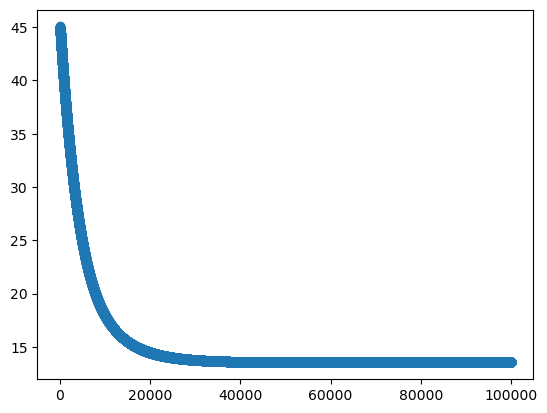

In [426]:
plt.scatter( range(num_iterations), all_costs) #

With Tolerance 10^{-6}. and iterations 1000000

In [427]:
num_iterations = 1000000  #1000000,100000,10000
learningRate = 0.001      #   0.01,0.00001 ,0.001
tolerance=0.000001 # 0.000001. 
all_costs = []
b,w = initialize_betas(df.shape[1])
print("initial guess of b and w: " , b ,w)
# Add Meaassure of time
total_classification_error=[]
start_time = time.time()
for each_iter in range (num_iterations ):
    
    y_hat = sigmoid(b, w , df)
    current_cost = get_cost (Y, y_hat)
    prev_b = b
    prev_w = w
    b, w, grad = update_beta (prev_b, prev_w, Y, y_hat, df, learningRate)
    
    #Breaking code if magnitude is less than 0.001
    if np.all(np.abs(grad) < tolerance):
        print('Converged on  :',each_iter)
        num_iterations=each_iter
        break
    
    all_costs.append(current_cost)
    #total_classification_error.append(new_classification_error)
    
    if each_iter % 10 == 0:
        print('Iteration: ', each_iter, 'Cost or Cross Entropy Error: ', current_cost)
        each_iter += 1
train_time = time.time() - start_time
print('Training Time is:',train_time)
new_classification_error,y_pred = classification_error(y_hat.tolist(),Y)
print('Classification Error is:',new_classification_error)
print("Final estimates of b and q are: ", b,w)
acc = accuracy_score(Y, y_pred)
print("My Accuracy:", acc)


initial guess of b and w:  0.29921321025750036 [0.215552   0.90160534 0.28990322 0.50509726 0.41491721 0.57348606
 0.17739135 0.71433865 0.95754979 0.27572087 0.59042036 0.52129389
 0.0131458 ]
Iteration:  0 Cost or Cross Entropy Error:  28.61199924715554
Iteration:  10 Cost or Cross Entropy Error:  28.575277249536946
Iteration:  20 Cost or Cross Entropy Error:  28.538672064502983
Iteration:  30 Cost or Cross Entropy Error:  28.502183176452537
Iteration:  40 Cost or Cross Entropy Error:  28.465810073067306
Iteration:  50 Cost or Cross Entropy Error:  28.42955224528662
Iteration:  60 Cost or Cross Entropy Error:  28.39340918728246
Iteration:  70 Cost or Cross Entropy Error:  28.357380396434678
Iteration:  80 Cost or Cross Entropy Error:  28.32146537330641
Iteration:  90 Cost or Cross Entropy Error:  28.28566362161975
Iteration:  100 Cost or Cross Entropy Error:  28.249974648231536
Iteration:  110 Cost or Cross Entropy Error:  28.214397963109402
Iteration:  120 Cost or Cross Entropy Erro

Iteration:  2440 Cost or Cross Entropy Error:  22.223020318235218
Iteration:  2450 Cost or Cross Entropy Error:  22.204759149451696
Iteration:  2460 Cost or Cross Entropy Error:  22.186546274215996
Iteration:  2470 Cost or Cross Entropy Error:  22.16838154201424
Iteration:  2480 Cost or Cross Entropy Error:  22.15026480288235
Iteration:  2490 Cost or Cross Entropy Error:  22.1321959074029
Iteration:  2500 Cost or Cross Entropy Error:  22.114174706701917
Iteration:  2510 Cost or Cross Entropy Error:  22.096201052445796
Iteration:  2520 Cost or Cross Entropy Error:  22.078274796838173
Iteration:  2530 Cost or Cross Entropy Error:  22.06039579261688
Iteration:  2540 Cost or Cross Entropy Error:  22.042563893050914
Iteration:  2550 Cost or Cross Entropy Error:  22.024778951937414
Iteration:  2560 Cost or Cross Entropy Error:  22.007040823598697
Iteration:  2570 Cost or Cross Entropy Error:  21.98934936287932
Iteration:  2580 Cost or Cross Entropy Error:  21.97170442514315
Iteration:  2590 

Iteration:  4770 Cost or Cross Entropy Error:  19.01332350368552
Iteration:  4780 Cost or Cross Entropy Error:  19.003129508105257
Iteration:  4790 Cost or Cross Entropy Error:  18.992959408693977
Iteration:  4800 Cost or Cross Entropy Error:  18.982813135255757
Iteration:  4810 Cost or Cross Entropy Error:  18.972690617821286
Iteration:  4820 Cost or Cross Entropy Error:  18.96259178664724
Iteration:  4830 Cost or Cross Entropy Error:  18.952516572215544
Iteration:  4840 Cost or Cross Entropy Error:  18.942464905232807
Iteration:  4850 Cost or Cross Entropy Error:  18.93243671662961
Iteration:  4860 Cost or Cross Entropy Error:  18.92243193755986
Iteration:  4870 Cost or Cross Entropy Error:  18.912450499400155
Iteration:  4880 Cost or Cross Entropy Error:  18.902492333749105
Iteration:  4890 Cost or Cross Entropy Error:  18.89255737242671
Iteration:  4900 Cost or Cross Entropy Error:  18.882645547473718
Iteration:  4910 Cost or Cross Entropy Error:  18.872756791150938
Iteration:  492

Iteration:  7240 Cost or Cross Entropy Error:  17.077076727295374
Iteration:  7250 Cost or Cross Entropy Error:  17.071124615255705
Iteration:  7260 Cost or Cross Entropy Error:  17.065184505463577
Iteration:  7270 Cost or Cross Entropy Error:  17.059256366803027
Iteration:  7280 Cost or Cross Entropy Error:  17.05334016825935
Iteration:  7290 Cost or Cross Entropy Error:  17.047435878918716
Iteration:  7300 Cost or Cross Entropy Error:  17.04154346796782
Iteration:  7310 Cost or Cross Entropy Error:  17.035662904693517
Iteration:  7320 Cost or Cross Entropy Error:  17.02979415848248
Iteration:  7330 Cost or Cross Entropy Error:  17.023937198820793
Iteration:  7340 Cost or Cross Entropy Error:  17.018091995293677
Iteration:  7350 Cost or Cross Entropy Error:  17.012258517585035
Iteration:  7360 Cost or Cross Entropy Error:  17.006436735477187
Iteration:  7370 Cost or Cross Entropy Error:  17.000626618850454
Iteration:  7380 Cost or Cross Entropy Error:  16.994828137682845
Iteration:  7

Iteration:  9620 Cost or Cross Entropy Error:  15.941181176724557
Iteration:  9630 Cost or Cross Entropy Error:  15.937391962795038
Iteration:  9640 Cost or Cross Entropy Error:  15.933609534378787
Iteration:  9650 Cost or Cross Entropy Error:  15.929833876516664
Iteration:  9660 Cost or Cross Entropy Error:  15.926064974292217
Iteration:  9670 Cost or Cross Entropy Error:  15.922302812831509
Iteration:  9680 Cost or Cross Entropy Error:  15.918547377303028
Iteration:  9690 Cost or Cross Entropy Error:  15.914798652917476
Iteration:  9700 Cost or Cross Entropy Error:  15.911056624927657
Iteration:  9710 Cost or Cross Entropy Error:  15.907321278628308
Iteration:  9720 Cost or Cross Entropy Error:  15.903592599355958
Iteration:  9730 Cost or Cross Entropy Error:  15.89987057248879
Iteration:  9740 Cost or Cross Entropy Error:  15.896155183446472
Iteration:  9750 Cost or Cross Entropy Error:  15.89244641769003
Iteration:  9760 Cost or Cross Entropy Error:  15.888744260721685
Iteration:  

Iteration:  11920 Cost or Cross Entropy Error:  15.222591887136248
Iteration:  11930 Cost or Cross Entropy Error:  15.220040302856551
Iteration:  11940 Cost or Cross Entropy Error:  15.217492942026196
Iteration:  11950 Cost or Cross Entropy Error:  15.214949796486113
Iteration:  11960 Cost or Cross Entropy Error:  15.212410858096996
Iteration:  11970 Cost or Cross Entropy Error:  15.20987611873923
Iteration:  11980 Cost or Cross Entropy Error:  15.207345570312809
Iteration:  11990 Cost or Cross Entropy Error:  15.204819204737305
Iteration:  12000 Cost or Cross Entropy Error:  15.202297013951794
Iteration:  12010 Cost or Cross Entropy Error:  15.199778989914797
Iteration:  12020 Cost or Cross Entropy Error:  15.1972651246042
Iteration:  12030 Cost or Cross Entropy Error:  15.194755410017233
Iteration:  12040 Cost or Cross Entropy Error:  15.192249838170387
Iteration:  12050 Cost or Cross Entropy Error:  15.189748401099342
Iteration:  12060 Cost or Cross Entropy Error:  15.18725109085894

Iteration:  14190 Cost or Cross Entropy Error:  14.737889918786673
Iteration:  14200 Cost or Cross Entropy Error:  14.736120102451798
Iteration:  14210 Cost or Cross Entropy Error:  14.734353066762711
Iteration:  14220 Cost or Cross Entropy Error:  14.732588806825973
Iteration:  14230 Cost or Cross Entropy Error:  14.730827317758374
Iteration:  14240 Cost or Cross Entropy Error:  14.729068594686968
Iteration:  14250 Cost or Cross Entropy Error:  14.727312632748989
Iteration:  14260 Cost or Cross Entropy Error:  14.725559427091866
Iteration:  14270 Cost or Cross Entropy Error:  14.723808972873186
Iteration:  14280 Cost or Cross Entropy Error:  14.722061265260663
Iteration:  14290 Cost or Cross Entropy Error:  14.720316299432108
Iteration:  14300 Cost or Cross Entropy Error:  14.718574070575396
Iteration:  14310 Cost or Cross Entropy Error:  14.716834573888478
Iteration:  14320 Cost or Cross Entropy Error:  14.715097804579306
Iteration:  14330 Cost or Cross Entropy Error:  14.71336375786

Iteration:  16320 Cost or Cross Entropy Error:  14.41670041104042
Iteration:  16330 Cost or Cross Entropy Error:  14.415426696982243
Iteration:  16340 Cost or Cross Entropy Error:  14.41415491630346
Iteration:  16350 Cost or Cross Entropy Error:  14.412885065801989
Iteration:  16360 Cost or Cross Entropy Error:  14.411617142281814
Iteration:  16370 Cost or Cross Entropy Error:  14.410351142552964
Iteration:  16380 Cost or Cross Entropy Error:  14.409087063431517
Iteration:  16390 Cost or Cross Entropy Error:  14.40782490173956
Iteration:  16400 Cost or Cross Entropy Error:  14.406564654305196
Iteration:  16410 Cost or Cross Entropy Error:  14.405306317962532
Iteration:  16420 Cost or Cross Entropy Error:  14.404049889551638
Iteration:  16430 Cost or Cross Entropy Error:  14.402795365918564
Iteration:  16440 Cost or Cross Entropy Error:  14.401542743915313
Iteration:  16450 Cost or Cross Entropy Error:  14.400292020399819
Iteration:  16460 Cost or Cross Entropy Error:  14.39904319223596

Iteration:  18570 Cost or Cross Entropy Error:  14.17341033563826
Iteration:  18580 Cost or Cross Entropy Error:  14.172501014802181
Iteration:  18590 Cost or Cross Entropy Error:  14.17159303722257
Iteration:  18600 Cost or Cross Entropy Error:  14.170686400773695
Iteration:  18610 Cost or Cross Entropy Error:  14.169781103333554
Iteration:  18620 Cost or Cross Entropy Error:  14.168877142783879
Iteration:  18630 Cost or Cross Entropy Error:  14.1679745170101
Iteration:  18640 Cost or Cross Entropy Error:  14.167073223901351
Iteration:  18650 Cost or Cross Entropy Error:  14.166173261350476
Iteration:  18660 Cost or Cross Entropy Error:  14.165274627254002
Iteration:  18670 Cost or Cross Entropy Error:  14.164377319512136
Iteration:  18680 Cost or Cross Entropy Error:  14.163481336028768
Iteration:  18690 Cost or Cross Entropy Error:  14.162586674711449
Iteration:  18700 Cost or Cross Entropy Error:  14.161693333471401
Iteration:  18710 Cost or Cross Entropy Error:  14.160801310223496

Iteration:  21000 Cost or Cross Entropy Error:  13.98740162813747
Iteration:  21010 Cost or Cross Entropy Error:  13.986764060186006
Iteration:  21020 Cost or Cross Entropy Error:  13.986127412960855
Iteration:  21030 Cost or Cross Entropy Error:  13.985491685056642
Iteration:  21040 Cost or Cross Entropy Error:  13.984856875070303
Iteration:  21050 Cost or Cross Entropy Error:  13.984222981601114
Iteration:  21060 Cost or Cross Entropy Error:  13.983590003250644
Iteration:  21070 Cost or Cross Entropy Error:  13.982957938622794
Iteration:  21080 Cost or Cross Entropy Error:  13.982326786323776
Iteration:  21090 Cost or Cross Entropy Error:  13.981696544962096
Iteration:  21100 Cost or Cross Entropy Error:  13.981067213148561
Iteration:  21110 Cost or Cross Entropy Error:  13.98043878949629
Iteration:  21120 Cost or Cross Entropy Error:  13.97981127262067
Iteration:  21130 Cost or Cross Entropy Error:  13.979184661139405
Iteration:  21140 Cost or Cross Entropy Error:  13.97855895367245

Iteration:  23330 Cost or Cross Entropy Error:  13.861065433153508
Iteration:  23340 Cost or Cross Entropy Error:  13.860608782211978
Iteration:  23350 Cost or Cross Entropy Error:  13.860152779449173
Iteration:  23360 Cost or Cross Entropy Error:  13.85969742390214
Iteration:  23370 Cost or Cross Entropy Error:  13.859242714609476
Iteration:  23380 Cost or Cross Entropy Error:  13.858788650611299
Iteration:  23390 Cost or Cross Entropy Error:  13.858335230949251
Iteration:  23400 Cost or Cross Entropy Error:  13.857882454666498
Iteration:  23410 Cost or Cross Entropy Error:  13.857430320807733
Iteration:  23420 Cost or Cross Entropy Error:  13.85697882841916
Iteration:  23430 Cost or Cross Entropy Error:  13.856527976548499
Iteration:  23440 Cost or Cross Entropy Error:  13.856077764244992
Iteration:  23450 Cost or Cross Entropy Error:  13.85562819055938
Iteration:  23460 Cost or Cross Entropy Error:  13.855179254543915
Iteration:  23470 Cost or Cross Entropy Error:  13.85473095525236

Iteration:  25680 Cost or Cross Entropy Error:  13.76969333503327
Iteration:  25690 Cost or Cross Entropy Error:  13.769365498007499
Iteration:  25700 Cost or Cross Entropy Error:  13.76903811987484
Iteration:  25710 Cost or Cross Entropy Error:  13.768711199968873
Iteration:  25720 Cost or Cross Entropy Error:  13.768384737624183
Iteration:  25730 Cost or Cross Entropy Error:  13.768058732176401
Iteration:  25740 Cost or Cross Entropy Error:  13.767733182962164
Iteration:  25750 Cost or Cross Entropy Error:  13.76740808931915
Iteration:  25760 Cost or Cross Entropy Error:  13.767083450586034
Iteration:  25770 Cost or Cross Entropy Error:  13.766759266102532
Iteration:  25780 Cost or Cross Entropy Error:  13.766435535209368
Iteration:  25790 Cost or Cross Entropy Error:  13.76611225724828
Iteration:  25800 Cost or Cross Entropy Error:  13.76578943156202
Iteration:  25810 Cost or Cross Entropy Error:  13.765467057494355
Iteration:  25820 Cost or Cross Entropy Error:  13.765145134390055


Iteration:  27880 Cost or Cross Entropy Error:  13.70754829426709
Iteration:  27890 Cost or Cross Entropy Error:  13.70730700748602
Iteration:  27900 Cost or Cross Entropy Error:  13.707066055014256
Iteration:  27910 Cost or Cross Entropy Error:  13.70682543637514
Iteration:  27920 Cost or Cross Entropy Error:  13.70658515109276
Iteration:  27930 Cost or Cross Entropy Error:  13.706345198691906
Iteration:  27940 Cost or Cross Entropy Error:  13.706105578698095
Iteration:  27950 Cost or Cross Entropy Error:  13.70586629063755
Iteration:  27960 Cost or Cross Entropy Error:  13.705627334037203
Iteration:  27970 Cost or Cross Entropy Error:  13.705388708424698
Iteration:  27980 Cost or Cross Entropy Error:  13.705150413328406
Iteration:  27990 Cost or Cross Entropy Error:  13.704912448277385
Iteration:  28000 Cost or Cross Entropy Error:  13.704674812801407
Iteration:  28010 Cost or Cross Entropy Error:  13.704437506430954
Iteration:  28020 Cost or Cross Entropy Error:  13.704200528697225


Iteration:  30330 Cost or Cross Entropy Error:  13.657368980500888
Iteration:  30340 Cost or Cross Entropy Error:  13.65719693318719
Iteration:  30350 Cost or Cross Entropy Error:  13.657025122318027
Iteration:  30360 Cost or Cross Entropy Error:  13.656853547562326
Iteration:  30370 Cost or Cross Entropy Error:  13.656682208589526
Iteration:  30380 Cost or Cross Entropy Error:  13.656511105069542
Iteration:  30390 Cost or Cross Entropy Error:  13.656340236672778
Iteration:  30400 Cost or Cross Entropy Error:  13.656169603070106
Iteration:  30410 Cost or Cross Entropy Error:  13.655999203932913
Iteration:  30420 Cost or Cross Entropy Error:  13.65582903893303
Iteration:  30430 Cost or Cross Entropy Error:  13.655659107742798
Iteration:  30440 Cost or Cross Entropy Error:  13.655489410035033
Iteration:  30450 Cost or Cross Entropy Error:  13.655319945483026
Iteration:  30460 Cost or Cross Entropy Error:  13.65515071376055
Iteration:  30470 Cost or Cross Entropy Error:  13.65498171454186

Iteration:  32680 Cost or Cross Entropy Error:  13.622788123465494
Iteration:  32690 Cost or Cross Entropy Error:  13.622663489849401
Iteration:  32700 Cost or Cross Entropy Error:  13.62253902677966
Iteration:  32710 Cost or Cross Entropy Error:  13.62241473402111
Iteration:  32720 Cost or Cross Entropy Error:  13.622290611338958
Iteration:  32730 Cost or Cross Entropy Error:  13.62216665849871
Iteration:  32740 Cost or Cross Entropy Error:  13.62204287526624
Iteration:  32750 Cost or Cross Entropy Error:  13.62191926140776
Iteration:  32760 Cost or Cross Entropy Error:  13.621795816689795
Iteration:  32770 Cost or Cross Entropy Error:  13.62167254087923
Iteration:  32780 Cost or Cross Entropy Error:  13.621549433743269
Iteration:  32790 Cost or Cross Entropy Error:  13.62142649504946
Iteration:  32800 Cost or Cross Entropy Error:  13.621303724565683
Iteration:  32810 Cost or Cross Entropy Error:  13.62118112206015
Iteration:  32820 Cost or Cross Entropy Error:  13.621058687301414
Ite

Iteration:  35150 Cost or Cross Entropy Error:  13.596649252706383
Iteration:  35160 Cost or Cross Entropy Error:  13.596560367922844
Iteration:  35170 Cost or Cross Entropy Error:  13.596471604729892
Iteration:  35180 Cost or Cross Entropy Error:  13.59638296296224
Iteration:  35190 Cost or Cross Entropy Error:  13.596294442454822
Iteration:  35200 Cost or Cross Entropy Error:  13.59620604304281
Iteration:  35210 Cost or Cross Entropy Error:  13.596117764561624
Iteration:  35220 Cost or Cross Entropy Error:  13.596029606846898
Iteration:  35230 Cost or Cross Entropy Error:  13.5959415697345
Iteration:  35240 Cost or Cross Entropy Error:  13.59585365306054
Iteration:  35250 Cost or Cross Entropy Error:  13.595765856661352
Iteration:  35260 Cost or Cross Entropy Error:  13.595678180373497
Iteration:  35270 Cost or Cross Entropy Error:  13.595590624033784
Iteration:  35280 Cost or Cross Entropy Error:  13.595503187479233
Iteration:  35290 Cost or Cross Entropy Error:  13.595415870547095


Iteration:  37510 Cost or Cross Entropy Error:  13.578714136964244
Iteration:  37520 Cost or Cross Entropy Error:  13.578649828259143
Iteration:  37530 Cost or Cross Entropy Error:  13.578585607922733
Iteration:  37540 Cost or Cross Entropy Error:  13.578521475836288
Iteration:  37550 Cost or Cross Entropy Error:  13.57845743188122
Iteration:  37560 Cost or Cross Entropy Error:  13.578393475939116
Iteration:  37570 Cost or Cross Entropy Error:  13.578329607891718
Iteration:  37580 Cost or Cross Entropy Error:  13.57826582762094
Iteration:  37590 Cost or Cross Entropy Error:  13.578202135008858
Iteration:  37600 Cost or Cross Entropy Error:  13.578138529937716
Iteration:  37610 Cost or Cross Entropy Error:  13.57807501228991
Iteration:  37620 Cost or Cross Entropy Error:  13.57801158194801
Iteration:  37630 Cost or Cross Entropy Error:  13.577948238794743
Iteration:  37640 Cost or Cross Entropy Error:  13.577884982713002
Iteration:  37650 Cost or Cross Entropy Error:  13.577821813585837

Iteration:  39890 Cost or Cross Entropy Error:  13.565657580717536
Iteration:  39900 Cost or Cross Entropy Error:  13.565611291352893
Iteration:  39910 Cost or Cross Entropy Error:  13.565565066256742
Iteration:  39920 Cost or Cross Entropy Error:  13.565518905343556
Iteration:  39930 Cost or Cross Entropy Error:  13.56547280852791
Iteration:  39940 Cost or Cross Entropy Error:  13.565426775724497
Iteration:  39950 Cost or Cross Entropy Error:  13.565380806848133
Iteration:  39960 Cost or Cross Entropy Error:  13.565334901813738
Iteration:  39970 Cost or Cross Entropy Error:  13.565289060536367
Iteration:  39980 Cost or Cross Entropy Error:  13.565243282931169
Iteration:  39990 Cost or Cross Entropy Error:  13.565197568913426
Iteration:  40000 Cost or Cross Entropy Error:  13.565151918398534
Iteration:  40010 Cost or Cross Entropy Error:  13.565106331301996
Iteration:  40020 Cost or Cross Entropy Error:  13.565060807539435
Iteration:  40030 Cost or Cross Entropy Error:  13.565015347026

Iteration:  42250 Cost or Cross Entropy Error:  13.556344242371797
Iteration:  42260 Cost or Cross Entropy Error:  13.556310981488668
Iteration:  42270 Cost or Cross Entropy Error:  13.556277767595518
Iteration:  42280 Cost or Cross Entropy Error:  13.556244600630242
Iteration:  42290 Cost or Cross Entropy Error:  13.55621148053084
Iteration:  42300 Cost or Cross Entropy Error:  13.556178407235357
Iteration:  42310 Cost or Cross Entropy Error:  13.556145380681965
Iteration:  42320 Cost or Cross Entropy Error:  13.556112400808896
Iteration:  42330 Cost or Cross Entropy Error:  13.556079467554468
Iteration:  42340 Cost or Cross Entropy Error:  13.55604658085708
Iteration:  42350 Cost or Cross Entropy Error:  13.55601374065522
Iteration:  42360 Cost or Cross Entropy Error:  13.555980946887459
Iteration:  42370 Cost or Cross Entropy Error:  13.555948199492438
Iteration:  42380 Cost or Cross Entropy Error:  13.555915498408904
Iteration:  42390 Cost or Cross Entropy Error:  13.55588284357565

Iteration:  44650 Cost or Cross Entropy Error:  13.54957857506071
Iteration:  44660 Cost or Cross Entropy Error:  13.549554986190747
Iteration:  44670 Cost or Cross Entropy Error:  13.549531431558941
Iteration:  44680 Cost or Cross Entropy Error:  13.549507911120255
Iteration:  44690 Cost or Cross Entropy Error:  13.549484424829686
Iteration:  44700 Cost or Cross Entropy Error:  13.549460972642311
Iteration:  44710 Cost or Cross Entropy Error:  13.549437554513265
Iteration:  44720 Cost or Cross Entropy Error:  13.549414170397744
Iteration:  44730 Cost or Cross Entropy Error:  13.549390820250993
Iteration:  44740 Cost or Cross Entropy Error:  13.549367504028318
Iteration:  44750 Cost or Cross Entropy Error:  13.549344221685104
Iteration:  44760 Cost or Cross Entropy Error:  13.549320973176766
Iteration:  44770 Cost or Cross Entropy Error:  13.5492977584588
Iteration:  44780 Cost or Cross Entropy Error:  13.549274577486747
Iteration:  44790 Cost or Cross Entropy Error:  13.54925143021621

Iteration:  47080 Cost or Cross Entropy Error:  13.544754726077779
Iteration:  47090 Cost or Cross Entropy Error:  13.544738262846716
Iteration:  47100 Cost or Cross Entropy Error:  13.544721824486032
Iteration:  47110 Cost or Cross Entropy Error:  13.544705410963033
Iteration:  47120 Cost or Cross Entropy Error:  13.54468902224507
Iteration:  47130 Cost or Cross Entropy Error:  13.544672658299541
Iteration:  47140 Cost or Cross Entropy Error:  13.54465631909389
Iteration:  47150 Cost or Cross Entropy Error:  13.544640004595593
Iteration:  47160 Cost or Cross Entropy Error:  13.544623714772175
Iteration:  47170 Cost or Cross Entropy Error:  13.544607449591204
Iteration:  47180 Cost or Cross Entropy Error:  13.544591209020291
Iteration:  47190 Cost or Cross Entropy Error:  13.54457499302708
Iteration:  47200 Cost or Cross Entropy Error:  13.54455880157928
Iteration:  47210 Cost or Cross Entropy Error:  13.544542634644616
Iteration:  47220 Cost or Cross Entropy Error:  13.544526492190865

Iteration:  49460 Cost or Cross Entropy Error:  13.541470617110134
Iteration:  49470 Cost or Cross Entropy Error:  13.541459239008391
Iteration:  49480 Cost or Cross Entropy Error:  13.541447879085842
Iteration:  49490 Cost or Cross Entropy Error:  13.54143653731852
Iteration:  49500 Cost or Cross Entropy Error:  13.541425213682475
Iteration:  49510 Cost or Cross Entropy Error:  13.541413908153814
Iteration:  49520 Cost or Cross Entropy Error:  13.541402620708656
Iteration:  49530 Cost or Cross Entropy Error:  13.541391351323153
Iteration:  49540 Cost or Cross Entropy Error:  13.541380099973495
Iteration:  49550 Cost or Cross Entropy Error:  13.5413688666359
Iteration:  49560 Cost or Cross Entropy Error:  13.541357651286608
Iteration:  49570 Cost or Cross Entropy Error:  13.541346453901904
Iteration:  49580 Cost or Cross Entropy Error:  13.541335274458094
Iteration:  49590 Cost or Cross Entropy Error:  13.541324112931516
Iteration:  49600 Cost or Cross Entropy Error:  13.54131296929854

Iteration:  51830 Cost or Cross Entropy Error:  13.539233642278987
Iteration:  51840 Cost or Cross Entropy Error:  13.539225965357838
Iteration:  51850 Cost or Cross Entropy Error:  13.539218301719577
Iteration:  51860 Cost or Cross Entropy Error:  13.53921065134655
Iteration:  51870 Cost or Cross Entropy Error:  13.53920301422113
Iteration:  51880 Cost or Cross Entropy Error:  13.539195390325702
Iteration:  51890 Cost or Cross Entropy Error:  13.539187779642681
Iteration:  51900 Cost or Cross Entropy Error:  13.539180182154501
Iteration:  51910 Cost or Cross Entropy Error:  13.539172597843626
Iteration:  51920 Cost or Cross Entropy Error:  13.539165026692535
Iteration:  51930 Cost or Cross Entropy Error:  13.539157468683724
Iteration:  51940 Cost or Cross Entropy Error:  13.539149923799728
Iteration:  51950 Cost or Cross Entropy Error:  13.539142392023091
Iteration:  51960 Cost or Cross Entropy Error:  13.539134873336383
Iteration:  51970 Cost or Cross Entropy Error:  13.5391273677222

Iteration:  54160 Cost or Cross Entropy Error:  13.537769743156707
Iteration:  54170 Cost or Cross Entropy Error:  13.537764727768224
Iteration:  54180 Cost or Cross Entropy Error:  13.537759722103871
Iteration:  54190 Cost or Cross Entropy Error:  13.537754726150547
Iteration:  54200 Cost or Cross Entropy Error:  13.537749739895167
Iteration:  54210 Cost or Cross Entropy Error:  13.537744763324653
Iteration:  54220 Cost or Cross Entropy Error:  13.53773979642595
Iteration:  54230 Cost or Cross Entropy Error:  13.537734839186026
Iteration:  54240 Cost or Cross Entropy Error:  13.537729891591857
Iteration:  54250 Cost or Cross Entropy Error:  13.537724953630441
Iteration:  54260 Cost or Cross Entropy Error:  13.537720025288781
Iteration:  54270 Cost or Cross Entropy Error:  13.537715106553916
Iteration:  54280 Cost or Cross Entropy Error:  13.537710197412883
Iteration:  54290 Cost or Cross Entropy Error:  13.537705297852755
Iteration:  54300 Cost or Cross Entropy Error:  13.537700407860

Iteration:  56600 Cost or Cross Entropy Error:  13.536805193833947
Iteration:  56610 Cost or Cross Entropy Error:  13.536802199618185
Iteration:  56620 Cost or Cross Entropy Error:  13.536799212375945
Iteration:  56630 Cost or Cross Entropy Error:  13.536796232097595
Iteration:  56640 Cost or Cross Entropy Error:  13.536793258773548
Iteration:  56650 Cost or Cross Entropy Error:  13.536790292394208
Iteration:  56660 Cost or Cross Entropy Error:  13.536787332950015
Iteration:  56670 Cost or Cross Entropy Error:  13.536784380431401
Iteration:  56680 Cost or Cross Entropy Error:  13.536781434828814
Iteration:  56690 Cost or Cross Entropy Error:  13.536778496132714
Iteration:  56700 Cost or Cross Entropy Error:  13.536775564333581
Iteration:  56710 Cost or Cross Entropy Error:  13.536772639421892
Iteration:  56720 Cost or Cross Entropy Error:  13.53676972138816
Iteration:  56730 Cost or Cross Entropy Error:  13.536766810222879
Iteration:  56740 Cost or Cross Entropy Error:  13.536763905916

Iteration:  58950 Cost or Cross Entropy Error:  13.536274189596892
Iteration:  58960 Cost or Cross Entropy Error:  13.536272594087414
Iteration:  58970 Cost or Cross Entropy Error:  13.536271003596761
Iteration:  58980 Cost or Cross Entropy Error:  13.536269418117776
Iteration:  58990 Cost or Cross Entropy Error:  13.536267837643349
Iteration:  59000 Cost or Cross Entropy Error:  13.536266262166356
Iteration:  59010 Cost or Cross Entropy Error:  13.536264691679676
Iteration:  59020 Cost or Cross Entropy Error:  13.536263126176227
Iteration:  59030 Cost or Cross Entropy Error:  13.536261565648894
Iteration:  59040 Cost or Cross Entropy Error:  13.536260010090599
Iteration:  59050 Cost or Cross Entropy Error:  13.536258459494277
Iteration:  59060 Cost or Cross Entropy Error:  13.536256913852862
Iteration:  59070 Cost or Cross Entropy Error:  13.53625537315928
Iteration:  59080 Cost or Cross Entropy Error:  13.536253837406496
Iteration:  59090 Cost or Cross Entropy Error:  13.536252306587

Iteration:  61270 Cost or Cross Entropy Error:  13.536024854492199
Iteration:  61280 Cost or Cross Entropy Error:  13.536024249346847
Iteration:  61290 Cost or Cross Entropy Error:  13.536023647784235
Iteration:  61300 Cost or Cross Entropy Error:  13.536023049799047
Iteration:  61310 Cost or Cross Entropy Error:  13.536022455385954
Iteration:  61320 Cost or Cross Entropy Error:  13.536021864539652
Iteration:  61330 Cost or Cross Entropy Error:  13.536021277254846
Iteration:  61340 Cost or Cross Entropy Error:  13.536020693526229
Iteration:  61350 Cost or Cross Entropy Error:  13.536020113348522
Iteration:  61360 Cost or Cross Entropy Error:  13.536019536716438
Iteration:  61370 Cost or Cross Entropy Error:  13.5360189636247
Iteration:  61380 Cost or Cross Entropy Error:  13.536018394068046
Iteration:  61390 Cost or Cross Entropy Error:  13.536017828041203
Iteration:  61400 Cost or Cross Entropy Error:  13.536017265538922
Iteration:  61410 Cost or Cross Entropy Error:  13.5360167065559

Iteration:  63660 Cost or Cross Entropy Error:  13.53597100489031
Iteration:  63670 Cost or Cross Entropy Error:  13.535971118713249
Iteration:  63680 Cost or Cross Entropy Error:  13.535971235020721
Iteration:  63690 Cost or Cross Entropy Error:  13.535971353808804
Iteration:  63700 Cost or Cross Entropy Error:  13.535971475073561
Iteration:  63710 Cost or Cross Entropy Error:  13.535971598811072
Iteration:  63720 Cost or Cross Entropy Error:  13.53597172501744
Iteration:  63730 Cost or Cross Entropy Error:  13.535971853688732
Iteration:  63740 Cost or Cross Entropy Error:  13.535971984821055
Iteration:  63750 Cost or Cross Entropy Error:  13.535972118410498
Iteration:  63760 Cost or Cross Entropy Error:  13.535972254453178
Iteration:  63770 Cost or Cross Entropy Error:  13.5359723929452
Iteration:  63780 Cost or Cross Entropy Error:  13.535972533882674
Iteration:  63790 Cost or Cross Entropy Error:  13.53597267726172
Iteration:  63800 Cost or Cross Entropy Error:  13.535972823078465


Iteration:  66200 Cost or Cross Entropy Error:  13.536069934572819
Iteration:  66210 Cost or Cross Entropy Error:  13.536070565678394
Iteration:  66220 Cost or Cross Entropy Error:  13.53607119841527
Iteration:  66230 Cost or Cross Entropy Error:  13.536071832780587
Iteration:  66240 Cost or Cross Entropy Error:  13.53607246877153
Iteration:  66250 Cost or Cross Entropy Error:  13.536073106385249
Iteration:  66260 Cost or Cross Entropy Error:  13.536073745618925
Iteration:  66270 Cost or Cross Entropy Error:  13.536074386469732
Iteration:  66280 Cost or Cross Entropy Error:  13.536075028934839
Iteration:  66290 Cost or Cross Entropy Error:  13.536075673011435
Iteration:  66300 Cost or Cross Entropy Error:  13.536076318696704
Iteration:  66310 Cost or Cross Entropy Error:  13.536076965987837
Iteration:  66320 Cost or Cross Entropy Error:  13.536077614882013
Iteration:  66330 Cost or Cross Entropy Error:  13.53607826537645
Iteration:  66340 Cost or Cross Entropy Error:  13.53607891746832

Iteration:  68760 Cost or Cross Entropy Error:  13.53627749420555
Iteration:  68770 Cost or Cross Entropy Error:  13.5362784595658
Iteration:  68780 Cost or Cross Entropy Error:  13.536279425937922
Iteration:  68790 Cost or Cross Entropy Error:  13.536280393319872
Iteration:  68800 Cost or Cross Entropy Error:  13.536281361709637
Iteration:  68810 Cost or Cross Entropy Error:  13.536282331105168
Iteration:  68820 Cost or Cross Entropy Error:  13.536283301504437
Iteration:  68830 Cost or Cross Entropy Error:  13.53628427290543
Iteration:  68840 Cost or Cross Entropy Error:  13.536285245306107
Iteration:  68850 Cost or Cross Entropy Error:  13.53628621870445
Iteration:  68860 Cost or Cross Entropy Error:  13.536287193098444
Iteration:  68870 Cost or Cross Entropy Error:  13.536288168486076
Iteration:  68880 Cost or Cross Entropy Error:  13.536289144865323
Iteration:  68890 Cost or Cross Entropy Error:  13.536290122234181
Iteration:  68900 Cost or Cross Entropy Error:  13.536291100590637


Iteration:  71250 Cost or Cross Entropy Error:  13.536544325603945
Iteration:  71260 Cost or Cross Entropy Error:  13.5365454863178
Iteration:  71270 Cost or Cross Entropy Error:  13.536546647610933
Iteration:  71280 Cost or Cross Entropy Error:  13.536547809481874
Iteration:  71290 Cost or Cross Entropy Error:  13.536548971929165
Iteration:  71300 Cost or Cross Entropy Error:  13.536550134951352
Iteration:  71310 Cost or Cross Entropy Error:  13.536551298546968
Iteration:  71320 Cost or Cross Entropy Error:  13.536552462714559
Iteration:  71330 Cost or Cross Entropy Error:  13.536553627452678
Iteration:  71340 Cost or Cross Entropy Error:  13.536554792759864
Iteration:  71350 Cost or Cross Entropy Error:  13.536555958634668
Iteration:  71360 Cost or Cross Entropy Error:  13.536557125075648
Iteration:  71370 Cost or Cross Entropy Error:  13.536558292081352
Iteration:  71380 Cost or Cross Entropy Error:  13.536559459650343
Iteration:  71390 Cost or Cross Entropy Error:  13.5365606277811

Iteration:  73620 Cost or Cross Entropy Error:  13.536832646963576
Iteration:  73630 Cost or Cross Entropy Error:  13.536833908055575
Iteration:  73640 Cost or Cross Entropy Error:  13.536835169430148
Iteration:  73650 Cost or Cross Entropy Error:  13.536836431086229
Iteration:  73660 Cost or Cross Entropy Error:  13.536837693022775
Iteration:  73670 Cost or Cross Entropy Error:  13.536838955238728
Iteration:  73680 Cost or Cross Entropy Error:  13.53684021773303
Iteration:  73690 Cost or Cross Entropy Error:  13.536841480504632
Iteration:  73700 Cost or Cross Entropy Error:  13.536842743552487
Iteration:  73710 Cost or Cross Entropy Error:  13.536844006875539
Iteration:  73720 Cost or Cross Entropy Error:  13.536845270472748
Iteration:  73730 Cost or Cross Entropy Error:  13.536846534343061
Iteration:  73740 Cost or Cross Entropy Error:  13.536847798485436
Iteration:  73750 Cost or Cross Entropy Error:  13.536849062898838
Iteration:  73760 Cost or Cross Entropy Error:  13.536850327582

Iteration:  76060 Cost or Cross Entropy Error:  13.537146402187133
Iteration:  76070 Cost or Cross Entropy Error:  13.537147704159496
Iteration:  76080 Cost or Cross Entropy Error:  13.53714900619616
Iteration:  76090 Cost or Cross Entropy Error:  13.537150308296379
Iteration:  76100 Cost or Cross Entropy Error:  13.537151610459409
Iteration:  76110 Cost or Cross Entropy Error:  13.53715291268451
Iteration:  76120 Cost or Cross Entropy Error:  13.537154214970935
Iteration:  76130 Cost or Cross Entropy Error:  13.537155517317942
Iteration:  76140 Cost or Cross Entropy Error:  13.537156819724792
Iteration:  76150 Cost or Cross Entropy Error:  13.537158122190752
Iteration:  76160 Cost or Cross Entropy Error:  13.53715942471508
Iteration:  76170 Cost or Cross Entropy Error:  13.537160727297039
Iteration:  76180 Cost or Cross Entropy Error:  13.537162029935889
Iteration:  76190 Cost or Cross Entropy Error:  13.5371633326309
Iteration:  76200 Cost or Cross Entropy Error:  13.53716463538134
I

Iteration:  78300 Cost or Cross Entropy Error:  13.537438378431641
Iteration:  78310 Cost or Cross Entropy Error:  13.537439678086661
Iteration:  78320 Cost or Cross Entropy Error:  13.537440977664096
Iteration:  78330 Cost or Cross Entropy Error:  13.537442277163406
Iteration:  78340 Cost or Cross Entropy Error:  13.537443576584062
Iteration:  78350 Cost or Cross Entropy Error:  13.537444875925543
Iteration:  78360 Cost or Cross Entropy Error:  13.537446175187322
Iteration:  78370 Cost or Cross Entropy Error:  13.537447474368854
Iteration:  78380 Cost or Cross Entropy Error:  13.537448773469634
Iteration:  78390 Cost or Cross Entropy Error:  13.53745007248913
Iteration:  78400 Cost or Cross Entropy Error:  13.537451371426803
Iteration:  78410 Cost or Cross Entropy Error:  13.537452670282159
Iteration:  78420 Cost or Cross Entropy Error:  13.537453969054647
Iteration:  78430 Cost or Cross Entropy Error:  13.537455267743768
Iteration:  78440 Cost or Cross Entropy Error:  13.537456566348

Iteration:  80640 Cost or Cross Entropy Error:  13.53773936085317
Iteration:  80650 Cost or Cross Entropy Error:  13.537740629539467
Iteration:  80660 Cost or Cross Entropy Error:  13.537741898044843
Iteration:  80670 Cost or Cross Entropy Error:  13.537743166368932
Iteration:  80680 Cost or Cross Entropy Error:  13.53774443451138
Iteration:  80690 Cost or Cross Entropy Error:  13.53774570247183
Iteration:  80700 Cost or Cross Entropy Error:  13.537746970249918
Iteration:  80710 Cost or Cross Entropy Error:  13.537748237845284
Iteration:  80720 Cost or Cross Entropy Error:  13.53774950525758
Iteration:  80730 Cost or Cross Entropy Error:  13.537750772486447
Iteration:  80740 Cost or Cross Entropy Error:  13.537752039531519
Iteration:  80750 Cost or Cross Entropy Error:  13.537753306392455
Iteration:  80760 Cost or Cross Entropy Error:  13.537754573068893
Iteration:  80770 Cost or Cross Entropy Error:  13.537755839560479
Iteration:  80780 Cost or Cross Entropy Error:  13.537757105866854

Iteration:  83080 Cost or Cross Entropy Error:  13.538042779808471
Iteration:  83090 Cost or Cross Entropy Error:  13.538043995055109
Iteration:  83100 Cost or Cross Entropy Error:  13.538045210049692
Iteration:  83110 Cost or Cross Entropy Error:  13.538046424791991
Iteration:  83120 Cost or Cross Entropy Error:  13.538047639281785
Iteration:  83130 Cost or Cross Entropy Error:  13.53804885351884
Iteration:  83140 Cost or Cross Entropy Error:  13.538050067502928
Iteration:  83150 Cost or Cross Entropy Error:  13.53805128123382
Iteration:  83160 Cost or Cross Entropy Error:  13.538052494711293
Iteration:  83170 Cost or Cross Entropy Error:  13.538053707935118
Iteration:  83180 Cost or Cross Entropy Error:  13.538054920905074
Iteration:  83190 Cost or Cross Entropy Error:  13.538056133620934
Iteration:  83200 Cost or Cross Entropy Error:  13.538057346082475
Iteration:  83210 Cost or Cross Entropy Error:  13.53805855828947
Iteration:  83220 Cost or Cross Entropy Error:  13.53805977024168

Iteration:  85540 Cost or Cross Entropy Error:  13.538333638527343
Iteration:  85550 Cost or Cross Entropy Error:  13.538334785919211
Iteration:  85560 Cost or Cross Entropy Error:  13.538335933015267
Iteration:  85570 Cost or Cross Entropy Error:  13.538337079815388
Iteration:  85580 Cost or Cross Entropy Error:  13.538338226319441
Iteration:  85590 Cost or Cross Entropy Error:  13.538339372527293
Iteration:  85600 Cost or Cross Entropy Error:  13.538340518438806
Iteration:  85610 Cost or Cross Entropy Error:  13.538341664053872
Iteration:  85620 Cost or Cross Entropy Error:  13.538342809372335
Iteration:  85630 Cost or Cross Entropy Error:  13.538343954394078
Iteration:  85640 Cost or Cross Entropy Error:  13.538345099118965
Iteration:  85650 Cost or Cross Entropy Error:  13.538346243546883
Iteration:  85660 Cost or Cross Entropy Error:  13.538347387677684
Iteration:  85670 Cost or Cross Entropy Error:  13.538348531511256
Iteration:  85680 Cost or Cross Entropy Error:  13.53834967504

Iteration:  87960 Cost or Cross Entropy Error:  13.538602418256582
Iteration:  87970 Cost or Cross Entropy Error:  13.538603490949718
Iteration:  87980 Cost or Cross Entropy Error:  13.538604563324029
Iteration:  87990 Cost or Cross Entropy Error:  13.538605635379435
Iteration:  88000 Cost or Cross Entropy Error:  13.538606707115894
Iteration:  88010 Cost or Cross Entropy Error:  13.538607778533333
Iteration:  88020 Cost or Cross Entropy Error:  13.538608849631697
Iteration:  88030 Cost or Cross Entropy Error:  13.538609920410916
Iteration:  88040 Cost or Cross Entropy Error:  13.538610990870936
Iteration:  88050 Cost or Cross Entropy Error:  13.538612061011696
Iteration:  88060 Cost or Cross Entropy Error:  13.538613130833136
Iteration:  88070 Cost or Cross Entropy Error:  13.538614200335193
Iteration:  88080 Cost or Cross Entropy Error:  13.53861526951781
Iteration:  88090 Cost or Cross Entropy Error:  13.538616338380923
Iteration:  88100 Cost or Cross Entropy Error:  13.538617406924

Iteration:  90300 Cost or Cross Entropy Error:  13.538844633682958
Iteration:  90310 Cost or Cross Entropy Error:  13.538845630550812
Iteration:  90320 Cost or Cross Entropy Error:  13.538846627091267
Iteration:  90330 Cost or Cross Entropy Error:  13.538847623304326
Iteration:  90340 Cost or Cross Entropy Error:  13.538848619189974
Iteration:  90350 Cost or Cross Entropy Error:  13.538849614748187
Iteration:  90360 Cost or Cross Entropy Error:  13.538850609978962
Iteration:  90370 Cost or Cross Entropy Error:  13.538851604882277
Iteration:  90380 Cost or Cross Entropy Error:  13.53885259945813
Iteration:  90390 Cost or Cross Entropy Error:  13.538853593706497
Iteration:  90400 Cost or Cross Entropy Error:  13.538854587627371
Iteration:  90410 Cost or Cross Entropy Error:  13.538855581220744
Iteration:  90420 Cost or Cross Entropy Error:  13.538856574486605
Iteration:  90430 Cost or Cross Entropy Error:  13.538857567424937
Iteration:  90440 Cost or Cross Entropy Error:  13.538858560035

Iteration:  92630 Cost or Cross Entropy Error:  13.539068046854688
Iteration:  92640 Cost or Cross Entropy Error:  13.539068967413318
Iteration:  92650 Cost or Cross Entropy Error:  13.539069887645672
Iteration:  92660 Cost or Cross Entropy Error:  13.539070807551775
Iteration:  92670 Cost or Cross Entropy Error:  13.539071727131644
Iteration:  92680 Cost or Cross Entropy Error:  13.539072646385298
Iteration:  92690 Cost or Cross Entropy Error:  13.539073565312767
Iteration:  92700 Cost or Cross Entropy Error:  13.539074483914064
Iteration:  92710 Cost or Cross Entropy Error:  13.539075402189216
Iteration:  92720 Cost or Cross Entropy Error:  13.53907632013824
Iteration:  92730 Cost or Cross Entropy Error:  13.53907723776116
Iteration:  92740 Cost or Cross Entropy Error:  13.539078155058002
Iteration:  92750 Cost or Cross Entropy Error:  13.539079072028782
Iteration:  92760 Cost or Cross Entropy Error:  13.53907998867353
Iteration:  92770 Cost or Cross Entropy Error:  13.53908090499226

Iteration:  95050 Cost or Cross Entropy Error:  13.53928137304657
Iteration:  95060 Cost or Cross Entropy Error:  13.539282215528912
Iteration:  95070 Cost or Cross Entropy Error:  13.539283057693309
Iteration:  95080 Cost or Cross Entropy Error:  13.539283899539813
Iteration:  95090 Cost or Cross Entropy Error:  13.539284741068466
Iteration:  95100 Cost or Cross Entropy Error:  13.53928558227932
Iteration:  95110 Cost or Cross Entropy Error:  13.539286423172413
Iteration:  95120 Cost or Cross Entropy Error:  13.539287263747799
Iteration:  95130 Cost or Cross Entropy Error:  13.53928810400552
Iteration:  95140 Cost or Cross Entropy Error:  13.539288943945627
Iteration:  95150 Cost or Cross Entropy Error:  13.539289783568162
Iteration:  95160 Cost or Cross Entropy Error:  13.539290622873173
Iteration:  95170 Cost or Cross Entropy Error:  13.539291461860714
Iteration:  95180 Cost or Cross Entropy Error:  13.539292300530818
Iteration:  95190 Cost or Cross Entropy Error:  13.53929313888354

Iteration:  97400 Cost or Cross Entropy Error:  13.539470722825788
Iteration:  97410 Cost or Cross Entropy Error:  13.539471492024163
Iteration:  97420 Cost or Cross Entropy Error:  13.539472260917469
Iteration:  97430 Cost or Cross Entropy Error:  13.539473029505775
Iteration:  97440 Cost or Cross Entropy Error:  13.53947379778914
Iteration:  97450 Cost or Cross Entropy Error:  13.539474565767627
Iteration:  97460 Cost or Cross Entropy Error:  13.539475333441302
Iteration:  97470 Cost or Cross Entropy Error:  13.539476100810221
Iteration:  97480 Cost or Cross Entropy Error:  13.539476867874455
Iteration:  97490 Cost or Cross Entropy Error:  13.539477634634062
Iteration:  97500 Cost or Cross Entropy Error:  13.5394784010891
Iteration:  97510 Cost or Cross Entropy Error:  13.539479167239637
Iteration:  97520 Cost or Cross Entropy Error:  13.539479933085737
Iteration:  97530 Cost or Cross Entropy Error:  13.53948069862746
Iteration:  97540 Cost or Cross Entropy Error:  13.539481463864874

Iteration:  99890 Cost or Cross Entropy Error:  13.539653000299312
Iteration:  99900 Cost or Cross Entropy Error:  13.539653695584787
Iteration:  99910 Cost or Cross Entropy Error:  13.539654390582152
Iteration:  99920 Cost or Cross Entropy Error:  13.53965508529149
Iteration:  99930 Cost or Cross Entropy Error:  13.539655779712863
Iteration:  99940 Cost or Cross Entropy Error:  13.539656473846357
Iteration:  99950 Cost or Cross Entropy Error:  13.539657167692033
Iteration:  99960 Cost or Cross Entropy Error:  13.539657861249976
Iteration:  99970 Cost or Cross Entropy Error:  13.53965855452025
Iteration:  99980 Cost or Cross Entropy Error:  13.539659247502929
Iteration:  99990 Cost or Cross Entropy Error:  13.539659940198083
Iteration:  100000 Cost or Cross Entropy Error:  13.539660632605797
Iteration:  100010 Cost or Cross Entropy Error:  13.539661324726138
Iteration:  100020 Cost or Cross Entropy Error:  13.539662016559179
Iteration:  100030 Cost or Cross Entropy Error:  13.539662708

Iteration:  102220 Cost or Cross Entropy Error:  13.539807370167829
Iteration:  102230 Cost or Cross Entropy Error:  13.539808000354265
Iteration:  102240 Cost or Cross Entropy Error:  13.539808630270295
Iteration:  102250 Cost or Cross Entropy Error:  13.539809259916016
Iteration:  102260 Cost or Cross Entropy Error:  13.539809889291492
Iteration:  102270 Cost or Cross Entropy Error:  13.5398105183968
Iteration:  102280 Cost or Cross Entropy Error:  13.539811147232031
Iteration:  102290 Cost or Cross Entropy Error:  13.539811775797252
Iteration:  102300 Cost or Cross Entropy Error:  13.53981240409255
Iteration:  102310 Cost or Cross Entropy Error:  13.539813032117996
Iteration:  102320 Cost or Cross Entropy Error:  13.539813659873673
Iteration:  102330 Cost or Cross Entropy Error:  13.539814287359658
Iteration:  102340 Cost or Cross Entropy Error:  13.539814914576027
Iteration:  102350 Cost or Cross Entropy Error:  13.539815541522865
Iteration:  102360 Cost or Cross Entropy Error:  13

Iteration:  104560 Cost or Cross Entropy Error:  13.539947629419558
Iteration:  104570 Cost or Cross Entropy Error:  13.539948198497413
Iteration:  104580 Cost or Cross Entropy Error:  13.539948767323533
Iteration:  104590 Cost or Cross Entropy Error:  13.539949335898008
Iteration:  104600 Cost or Cross Entropy Error:  13.53994990422091
Iteration:  104610 Cost or Cross Entropy Error:  13.539950472292324
Iteration:  104620 Cost or Cross Entropy Error:  13.539951040112333
Iteration:  104630 Cost or Cross Entropy Error:  13.539951607681013
Iteration:  104640 Cost or Cross Entropy Error:  13.539952174998449
Iteration:  104650 Cost or Cross Entropy Error:  13.539952742064722
Iteration:  104660 Cost or Cross Entropy Error:  13.539953308879905
Iteration:  104670 Cost or Cross Entropy Error:  13.53995387544409
Iteration:  104680 Cost or Cross Entropy Error:  13.53995444175735
Iteration:  104690 Cost or Cross Entropy Error:  13.539955007819763
Iteration:  104700 Cost or Cross Entropy Error:  13

Iteration:  107010 Cost or Cross Entropy Error:  13.540079724931065
Iteration:  107020 Cost or Cross Entropy Error:  13.540080234750636
Iteration:  107030 Cost or Cross Entropy Error:  13.54008074433827
Iteration:  107040 Cost or Cross Entropy Error:  13.540081253694046
Iteration:  107050 Cost or Cross Entropy Error:  13.540081762818048
Iteration:  107060 Cost or Cross Entropy Error:  13.54008227171035
Iteration:  107070 Cost or Cross Entropy Error:  13.540082780371046
Iteration:  107080 Cost or Cross Entropy Error:  13.540083288800204
Iteration:  107090 Cost or Cross Entropy Error:  13.540083796997907
Iteration:  107100 Cost or Cross Entropy Error:  13.540084304964239
Iteration:  107110 Cost or Cross Entropy Error:  13.540084812699277
Iteration:  107120 Cost or Cross Entropy Error:  13.5400853202031
Iteration:  107130 Cost or Cross Entropy Error:  13.5400858274758
Iteration:  107140 Cost or Cross Entropy Error:  13.540086334517445
Iteration:  107150 Cost or Cross Entropy Error:  13.54

Iteration:  109520 Cost or Cross Entropy Error:  13.540200621362871
Iteration:  109530 Cost or Cross Entropy Error:  13.540201075476238
Iteration:  109540 Cost or Cross Entropy Error:  13.540201529377663
Iteration:  109550 Cost or Cross Entropy Error:  13.540201983067224
Iteration:  109560 Cost or Cross Entropy Error:  13.540202436544996
Iteration:  109570 Cost or Cross Entropy Error:  13.540202889811068
Iteration:  109580 Cost or Cross Entropy Error:  13.540203342865505
Iteration:  109590 Cost or Cross Entropy Error:  13.540203795708395
Iteration:  109600 Cost or Cross Entropy Error:  13.540204248339807
Iteration:  109610 Cost or Cross Entropy Error:  13.540204700759826
Iteration:  109620 Cost or Cross Entropy Error:  13.540205152968532
Iteration:  109630 Cost or Cross Entropy Error:  13.540205604966003
Iteration:  109640 Cost or Cross Entropy Error:  13.540206056752314
Iteration:  109650 Cost or Cross Entropy Error:  13.540206508327545
Iteration:  109660 Cost or Cross Entropy Error: 

Iteration:  112010 Cost or Cross Entropy Error:  13.540307349331748
Iteration:  112020 Cost or Cross Entropy Error:  13.540307753064194
Iteration:  112030 Cost or Cross Entropy Error:  13.540308156603855
Iteration:  112040 Cost or Cross Entropy Error:  13.540308559950816
Iteration:  112050 Cost or Cross Entropy Error:  13.540308963105137
Iteration:  112060 Cost or Cross Entropy Error:  13.540309366066905
Iteration:  112070 Cost or Cross Entropy Error:  13.540309768836188
Iteration:  112080 Cost or Cross Entropy Error:  13.540310171413065
Iteration:  112090 Cost or Cross Entropy Error:  13.540310573797614
Iteration:  112100 Cost or Cross Entropy Error:  13.540310975989904
Iteration:  112110 Cost or Cross Entropy Error:  13.540311377990012
Iteration:  112120 Cost or Cross Entropy Error:  13.540311779798015
Iteration:  112130 Cost or Cross Entropy Error:  13.540312181413984
Iteration:  112140 Cost or Cross Entropy Error:  13.540312582838002
Iteration:  112150 Cost or Cross Entropy Error: 

Iteration:  114390 Cost or Cross Entropy Error:  13.540398165420045
Iteration:  114400 Cost or Cross Entropy Error:  13.540398525356233
Iteration:  114410 Cost or Cross Entropy Error:  13.540398885117078
Iteration:  114420 Cost or Cross Entropy Error:  13.540399244702664
Iteration:  114430 Cost or Cross Entropy Error:  13.540399604113059
Iteration:  114440 Cost or Cross Entropy Error:  13.540399963348328
Iteration:  114450 Cost or Cross Entropy Error:  13.540400322408543
Iteration:  114460 Cost or Cross Entropy Error:  13.540400681293788
Iteration:  114470 Cost or Cross Entropy Error:  13.540401040004117
Iteration:  114480 Cost or Cross Entropy Error:  13.540401398539617
Iteration:  114490 Cost or Cross Entropy Error:  13.540401756900346
Iteration:  114500 Cost or Cross Entropy Error:  13.540402115086385
Iteration:  114510 Cost or Cross Entropy Error:  13.540402473097796
Iteration:  114520 Cost or Cross Entropy Error:  13.540402830934658
Iteration:  114530 Cost or Cross Entropy Error: 

Iteration:  116760 Cost or Cross Entropy Error:  13.540478720750645
Iteration:  116770 Cost or Cross Entropy Error:  13.5404790410867
Iteration:  116780 Cost or Cross Entropy Error:  13.540479361263811
Iteration:  116790 Cost or Cross Entropy Error:  13.54047968128204
Iteration:  116800 Cost or Cross Entropy Error:  13.54048000114146
Iteration:  116810 Cost or Cross Entropy Error:  13.54048032084213
Iteration:  116820 Cost or Cross Entropy Error:  13.540480640384125
Iteration:  116830 Cost or Cross Entropy Error:  13.540480959767512
Iteration:  116840 Cost or Cross Entropy Error:  13.540481278992353
Iteration:  116850 Cost or Cross Entropy Error:  13.540481598058717
Iteration:  116860 Cost or Cross Entropy Error:  13.540481916966664
Iteration:  116870 Cost or Cross Entropy Error:  13.540482235716274
Iteration:  116880 Cost or Cross Entropy Error:  13.540482554307603
Iteration:  116890 Cost or Cross Entropy Error:  13.540482872740723
Iteration:  116900 Cost or Cross Entropy Error:  13.5

Iteration:  119170 Cost or Cross Entropy Error:  13.540551476632967
Iteration:  119180 Cost or Cross Entropy Error:  13.540551760554841
Iteration:  119190 Cost or Cross Entropy Error:  13.540552044333346
Iteration:  119200 Cost or Cross Entropy Error:  13.540552327968546
Iteration:  119210 Cost or Cross Entropy Error:  13.540552611460498
Iteration:  119220 Cost or Cross Entropy Error:  13.540552894809265
Iteration:  119230 Cost or Cross Entropy Error:  13.54055317801492
Iteration:  119240 Cost or Cross Entropy Error:  13.54055346107751
Iteration:  119250 Cost or Cross Entropy Error:  13.540553743997108
Iteration:  119260 Cost or Cross Entropy Error:  13.540554026773771
Iteration:  119270 Cost or Cross Entropy Error:  13.540554309407561
Iteration:  119280 Cost or Cross Entropy Error:  13.540554591898546
Iteration:  119290 Cost or Cross Entropy Error:  13.54055487424678
Iteration:  119300 Cost or Cross Entropy Error:  13.54055515645233
Iteration:  119310 Cost or Cross Entropy Error:  13.

Iteration:  121050 Cost or Cross Entropy Error:  13.54060240069117
Iteration:  121060 Cost or Cross Entropy Error:  13.540602658733064
Iteration:  121070 Cost or Cross Entropy Error:  13.540602916642955
Iteration:  121080 Cost or Cross Entropy Error:  13.540603174420898
Iteration:  121090 Cost or Cross Entropy Error:  13.540603432066955
Iteration:  121100 Cost or Cross Entropy Error:  13.540603689581177
Iteration:  121110 Cost or Cross Entropy Error:  13.54060394696363
Iteration:  121120 Cost or Cross Entropy Error:  13.540604204214375
Iteration:  121130 Cost or Cross Entropy Error:  13.540604461333464
Iteration:  121140 Cost or Cross Entropy Error:  13.540604718320957
Iteration:  121150 Cost or Cross Entropy Error:  13.540604975176914
Iteration:  121160 Cost or Cross Entropy Error:  13.540605231901392
Iteration:  121170 Cost or Cross Entropy Error:  13.54060548849445
Iteration:  121180 Cost or Cross Entropy Error:  13.540605744956146
Iteration:  121190 Cost or Cross Entropy Error:  13

Iteration:  122900 Cost or Cross Entropy Error:  13.540647951623617
Iteration:  122910 Cost or Cross Entropy Error:  13.540648186221508
Iteration:  122920 Cost or Cross Entropy Error:  13.540648420697906
Iteration:  122930 Cost or Cross Entropy Error:  13.540648655052854
Iteration:  122940 Cost or Cross Entropy Error:  13.540648889286414
Iteration:  122950 Cost or Cross Entropy Error:  13.540649123398644
Iteration:  122960 Cost or Cross Entropy Error:  13.540649357389597
Iteration:  122970 Cost or Cross Entropy Error:  13.540649591259319
Iteration:  122980 Cost or Cross Entropy Error:  13.54064982500788
Iteration:  122990 Cost or Cross Entropy Error:  13.540650058635327
Iteration:  123000 Cost or Cross Entropy Error:  13.540650292141711
Iteration:  123010 Cost or Cross Entropy Error:  13.540650525527093
Iteration:  123020 Cost or Cross Entropy Error:  13.540650758791523
Iteration:  123030 Cost or Cross Entropy Error:  13.54065099193506
Iteration:  123040 Cost or Cross Entropy Error:  1

Iteration:  125400 Cost or Cross Entropy Error:  13.540702957862152
Iteration:  125410 Cost or Cross Entropy Error:  13.540703163747182
Iteration:  125420 Cost or Cross Entropy Error:  13.540703369523861
Iteration:  125430 Cost or Cross Entropy Error:  13.54070357519224
Iteration:  125440 Cost or Cross Entropy Error:  13.540703780752366
Iteration:  125450 Cost or Cross Entropy Error:  13.540703986204292
Iteration:  125460 Cost or Cross Entropy Error:  13.540704191548071
Iteration:  125470 Cost or Cross Entropy Error:  13.54070439678375
Iteration:  125480 Cost or Cross Entropy Error:  13.540704601911372
Iteration:  125490 Cost or Cross Entropy Error:  13.540704806930998
Iteration:  125500 Cost or Cross Entropy Error:  13.540705011842677
Iteration:  125510 Cost or Cross Entropy Error:  13.540705216646451
Iteration:  125520 Cost or Cross Entropy Error:  13.540705421342382
Iteration:  125530 Cost or Cross Entropy Error:  13.540705625930505
Iteration:  125540 Cost or Cross Entropy Error:  1

Iteration:  127810 Cost or Cross Entropy Error:  13.540749555761101
Iteration:  127820 Cost or Cross Entropy Error:  13.54074973694267
Iteration:  127830 Cost or Cross Entropy Error:  13.54074991802746
Iteration:  127840 Cost or Cross Entropy Error:  13.540750099015506
Iteration:  127850 Cost or Cross Entropy Error:  13.540750279906858
Iteration:  127860 Cost or Cross Entropy Error:  13.540750460701561
Iteration:  127870 Cost or Cross Entropy Error:  13.540750641399658
Iteration:  127880 Cost or Cross Entropy Error:  13.5407508220012
Iteration:  127890 Cost or Cross Entropy Error:  13.54075100250623
Iteration:  127900 Cost or Cross Entropy Error:  13.540751182914793
Iteration:  127910 Cost or Cross Entropy Error:  13.540751363226931
Iteration:  127920 Cost or Cross Entropy Error:  13.540751543442699
Iteration:  127930 Cost or Cross Entropy Error:  13.540751723562131
Iteration:  127940 Cost or Cross Entropy Error:  13.540751903585287
Iteration:  127950 Cost or Cross Entropy Error:  13.5

Iteration:  130100 Cost or Cross Entropy Error:  13.540788608085515
Iteration:  130110 Cost or Cross Entropy Error:  13.540788768263186
Iteration:  130120 Cost or Cross Entropy Error:  13.540788928354091
Iteration:  130130 Cost or Cross Entropy Error:  13.540789088358277
Iteration:  130140 Cost or Cross Entropy Error:  13.540789248275791
Iteration:  130150 Cost or Cross Entropy Error:  13.540789408106656
Iteration:  130160 Cost or Cross Entropy Error:  13.54078956785094
Iteration:  130170 Cost or Cross Entropy Error:  13.54078972750866
Iteration:  130180 Cost or Cross Entropy Error:  13.54078988707987
Iteration:  130190 Cost or Cross Entropy Error:  13.540790046564613
Iteration:  130200 Cost or Cross Entropy Error:  13.540790205962923
Iteration:  130210 Cost or Cross Entropy Error:  13.540790365274846
Iteration:  130220 Cost or Cross Entropy Error:  13.540790524500425
Iteration:  130230 Cost or Cross Entropy Error:  13.540790683639704
Iteration:  130240 Cost or Cross Entropy Error:  13

Iteration:  132590 Cost or Cross Entropy Error:  13.54082591705504
Iteration:  132600 Cost or Cross Entropy Error:  13.5408260568766
Iteration:  132610 Cost or Cross Entropy Error:  13.540826196621298
Iteration:  132620 Cost or Cross Entropy Error:  13.540826336289157
Iteration:  132630 Cost or Cross Entropy Error:  13.540826475880223
Iteration:  132640 Cost or Cross Entropy Error:  13.54082661539453
Iteration:  132650 Cost or Cross Entropy Error:  13.540826754832114
Iteration:  132660 Cost or Cross Entropy Error:  13.540826894193021
Iteration:  132670 Cost or Cross Entropy Error:  13.54082703347728
Iteration:  132680 Cost or Cross Entropy Error:  13.540827172684933
Iteration:  132690 Cost or Cross Entropy Error:  13.540827311816017
Iteration:  132700 Cost or Cross Entropy Error:  13.540827450870573
Iteration:  132710 Cost or Cross Entropy Error:  13.540827589848627
Iteration:  132720 Cost or Cross Entropy Error:  13.540827728750234
Iteration:  132730 Cost or Cross Entropy Error:  13.5

Iteration:  134950 Cost or Cross Entropy Error:  13.54085686289729
Iteration:  134960 Cost or Cross Entropy Error:  13.540856985589125
Iteration:  134970 Cost or Cross Entropy Error:  13.540857108212554
Iteration:  134980 Cost or Cross Entropy Error:  13.54085723076762
Iteration:  134990 Cost or Cross Entropy Error:  13.540857353254344
Iteration:  135000 Cost or Cross Entropy Error:  13.540857475672771
Iteration:  135010 Cost or Cross Entropy Error:  13.540857598022928
Iteration:  135020 Cost or Cross Entropy Error:  13.540857720304853
Iteration:  135030 Cost or Cross Entropy Error:  13.540857842518584
Iteration:  135040 Cost or Cross Entropy Error:  13.54085796466415
Iteration:  135050 Cost or Cross Entropy Error:  13.54085808674158
Iteration:  135060 Cost or Cross Entropy Error:  13.540858208750915
Iteration:  135070 Cost or Cross Entropy Error:  13.540858330692188
Iteration:  135080 Cost or Cross Entropy Error:  13.54085845256543
Iteration:  135090 Cost or Cross Entropy Error:  13.5

Iteration:  137550 Cost or Cross Entropy Error:  13.540886555655316
Iteration:  137560 Cost or Cross Entropy Error:  13.540886661668319
Iteration:  137570 Cost or Cross Entropy Error:  13.540886767621299
Iteration:  137580 Cost or Cross Entropy Error:  13.540886873514287
Iteration:  137590 Cost or Cross Entropy Error:  13.540886979347311
Iteration:  137600 Cost or Cross Entropy Error:  13.540887085120406
Iteration:  137610 Cost or Cross Entropy Error:  13.5408871908336
Iteration:  137620 Cost or Cross Entropy Error:  13.540887296486924
Iteration:  137630 Cost or Cross Entropy Error:  13.5408874020804
Iteration:  137640 Cost or Cross Entropy Error:  13.540887507614073
Iteration:  137650 Cost or Cross Entropy Error:  13.540887613087966
Iteration:  137660 Cost or Cross Entropy Error:  13.540887718502107
Iteration:  137670 Cost or Cross Entropy Error:  13.54088782385653
Iteration:  137680 Cost or Cross Entropy Error:  13.540887929151264
Iteration:  137690 Cost or Cross Entropy Error:  13.5

Iteration:  139900 Cost or Cross Entropy Error:  13.540909881682449
Iteration:  139910 Cost or Cross Entropy Error:  13.540909974398014
Iteration:  139920 Cost or Cross Entropy Error:  13.540910067060338
Iteration:  139930 Cost or Cross Entropy Error:  13.540910159669457
Iteration:  139940 Cost or Cross Entropy Error:  13.540910252225391
Iteration:  139950 Cost or Cross Entropy Error:  13.54091034472817
Iteration:  139960 Cost or Cross Entropy Error:  13.540910437177821
Iteration:  139970 Cost or Cross Entropy Error:  13.54091052957437
Iteration:  139980 Cost or Cross Entropy Error:  13.54091062191785
Iteration:  139990 Cost or Cross Entropy Error:  13.540910714208277
Iteration:  140000 Cost or Cross Entropy Error:  13.540910806445691
Iteration:  140010 Cost or Cross Entropy Error:  13.540910898630107
Iteration:  140020 Cost or Cross Entropy Error:  13.540910990761565
Iteration:  140030 Cost or Cross Entropy Error:  13.540911082840081
Iteration:  140040 Cost or Cross Entropy Error:  13

Iteration:  142260 Cost or Cross Entropy Error:  13.540930343923474
Iteration:  142270 Cost or Cross Entropy Error:  13.540930424807428
Iteration:  142280 Cost or Cross Entropy Error:  13.540930505644264
Iteration:  142290 Cost or Cross Entropy Error:  13.540930586434014
Iteration:  142300 Cost or Cross Entropy Error:  13.540930667176701
Iteration:  142310 Cost or Cross Entropy Error:  13.540930747872338
Iteration:  142320 Cost or Cross Entropy Error:  13.540930828520962
Iteration:  142330 Cost or Cross Entropy Error:  13.540930909122594
Iteration:  142340 Cost or Cross Entropy Error:  13.540930989677253
Iteration:  142350 Cost or Cross Entropy Error:  13.540931070184977
Iteration:  142360 Cost or Cross Entropy Error:  13.54093115064578
Iteration:  142370 Cost or Cross Entropy Error:  13.540931231059687
Iteration:  142380 Cost or Cross Entropy Error:  13.54093131142672
Iteration:  142390 Cost or Cross Entropy Error:  13.540931391746915
Iteration:  142400 Cost or Cross Entropy Error:  1

Iteration:  144750 Cost or Cross Entropy Error:  13.54094908997065
Iteration:  144760 Cost or Cross Entropy Error:  13.540949159852744
Iteration:  144770 Cost or Cross Entropy Error:  13.540949229693497
Iteration:  144780 Cost or Cross Entropy Error:  13.540949299492935
Iteration:  144790 Cost or Cross Entropy Error:  13.540949369251065
Iteration:  144800 Cost or Cross Entropy Error:  13.54094943896792
Iteration:  144810 Cost or Cross Entropy Error:  13.540949508643525
Iteration:  144820 Cost or Cross Entropy Error:  13.540949578277893
Iteration:  144830 Cost or Cross Entropy Error:  13.54094964787105
Iteration:  144840 Cost or Cross Entropy Error:  13.540949717423018
Iteration:  144850 Cost or Cross Entropy Error:  13.540949786933819
Iteration:  144860 Cost or Cross Entropy Error:  13.540949856403468
Iteration:  144870 Cost or Cross Entropy Error:  13.540949925832
Iteration:  144880 Cost or Cross Entropy Error:  13.540949995219426
Iteration:  144890 Cost or Cross Entropy Error:  13.54

Iteration:  147120 Cost or Cross Entropy Error:  13.540964542409286
Iteration:  147130 Cost or Cross Entropy Error:  13.540964603082132
Iteration:  147140 Cost or Cross Entropy Error:  13.540964663718535
Iteration:  147150 Cost or Cross Entropy Error:  13.540964724318512
Iteration:  147160 Cost or Cross Entropy Error:  13.540964784882087
Iteration:  147170 Cost or Cross Entropy Error:  13.540964845409274
Iteration:  147180 Cost or Cross Entropy Error:  13.540964905900095
Iteration:  147190 Cost or Cross Entropy Error:  13.54096496635457
Iteration:  147200 Cost or Cross Entropy Error:  13.540965026772716
Iteration:  147210 Cost or Cross Entropy Error:  13.540965087154554
Iteration:  147220 Cost or Cross Entropy Error:  13.540965147500104
Iteration:  147230 Cost or Cross Entropy Error:  13.540965207809387
Iteration:  147240 Cost or Cross Entropy Error:  13.540965268082417
Iteration:  147250 Cost or Cross Entropy Error:  13.540965328319217
Iteration:  147260 Cost or Cross Entropy Error:  

Iteration:  149620 Cost or Cross Entropy Error:  13.540978625031217
Iteration:  149630 Cost or Cross Entropy Error:  13.54097867717672
Iteration:  149640 Cost or Cross Entropy Error:  13.540978729290378
Iteration:  149650 Cost or Cross Entropy Error:  13.540978781372203
Iteration:  149660 Cost or Cross Entropy Error:  13.540978833422212
Iteration:  149670 Cost or Cross Entropy Error:  13.540978885440426
Iteration:  149680 Cost or Cross Entropy Error:  13.540978937426866
Iteration:  149690 Cost or Cross Entropy Error:  13.540978989381532
Iteration:  149700 Cost or Cross Entropy Error:  13.540979041304455
Iteration:  149710 Cost or Cross Entropy Error:  13.540979093195658
Iteration:  149720 Cost or Cross Entropy Error:  13.540979145055141
Iteration:  149730 Cost or Cross Entropy Error:  13.540979196882937
Iteration:  149740 Cost or Cross Entropy Error:  13.540979248679054
Iteration:  149750 Cost or Cross Entropy Error:  13.540979300443514
Iteration:  149760 Cost or Cross Entropy Error:  

Iteration:  152090 Cost or Cross Entropy Error:  13.540990578999946
Iteration:  152100 Cost or Cross Entropy Error:  13.54099062378343
Iteration:  152110 Cost or Cross Entropy Error:  13.540990668539083
Iteration:  152120 Cost or Cross Entropy Error:  13.54099071326693
Iteration:  152130 Cost or Cross Entropy Error:  13.540990757966973
Iteration:  152140 Cost or Cross Entropy Error:  13.540990802639232
Iteration:  152150 Cost or Cross Entropy Error:  13.540990847283734
Iteration:  152160 Cost or Cross Entropy Error:  13.540990891900474
Iteration:  152170 Cost or Cross Entropy Error:  13.540990936489488
Iteration:  152180 Cost or Cross Entropy Error:  13.540990981050772
Iteration:  152190 Cost or Cross Entropy Error:  13.540991025584354
Iteration:  152200 Cost or Cross Entropy Error:  13.540991070090246
Iteration:  152210 Cost or Cross Entropy Error:  13.540991114568463
Iteration:  152220 Cost or Cross Entropy Error:  13.540991159019017
Iteration:  152230 Cost or Cross Entropy Error:  1

Iteration:  154480 Cost or Cross Entropy Error:  13.541000524188723
Iteration:  154490 Cost or Cross Entropy Error:  13.541000562739852
Iteration:  154500 Cost or Cross Entropy Error:  13.541000601266603
Iteration:  154510 Cost or Cross Entropy Error:  13.54100063976899
Iteration:  154520 Cost or Cross Entropy Error:  13.541000678247022
Iteration:  154530 Cost or Cross Entropy Error:  13.541000716700715
Iteration:  154540 Cost or Cross Entropy Error:  13.541000755130085
Iteration:  154550 Cost or Cross Entropy Error:  13.541000793535135
Iteration:  154560 Cost or Cross Entropy Error:  13.541000831915895
Iteration:  154570 Cost or Cross Entropy Error:  13.541000870272372
Iteration:  154580 Cost or Cross Entropy Error:  13.54100090860457
Iteration:  154590 Cost or Cross Entropy Error:  13.541000946912517
Iteration:  154600 Cost or Cross Entropy Error:  13.541000985196211
Iteration:  154610 Cost or Cross Entropy Error:  13.54100102345568
Iteration:  154620 Cost or Cross Entropy Error:  13

Iteration:  156820 Cost or Cross Entropy Error:  13.541008908341116
Iteration:  156830 Cost or Cross Entropy Error:  13.54100894154343
Iteration:  156840 Cost or Cross Entropy Error:  13.541008974724356
Iteration:  156850 Cost or Cross Entropy Error:  13.541009007883915
Iteration:  156860 Cost or Cross Entropy Error:  13.541009041022111
Iteration:  156870 Cost or Cross Entropy Error:  13.541009074138964
Iteration:  156880 Cost or Cross Entropy Error:  13.541009107234482
Iteration:  156890 Cost or Cross Entropy Error:  13.541009140308676
Iteration:  156900 Cost or Cross Entropy Error:  13.541009173361559
Iteration:  156910 Cost or Cross Entropy Error:  13.541009206393147
Iteration:  156920 Cost or Cross Entropy Error:  13.541009239403444
Iteration:  156930 Cost or Cross Entropy Error:  13.541009272392467
Iteration:  156940 Cost or Cross Entropy Error:  13.541009305360229
Iteration:  156950 Cost or Cross Entropy Error:  13.541009338306742
Iteration:  156960 Cost or Cross Entropy Error:  

Iteration:  159120 Cost or Cross Entropy Error:  13.541016005199056
Iteration:  159130 Cost or Cross Entropy Error:  13.541016033788807
Iteration:  159140 Cost or Cross Entropy Error:  13.54101606235979
Iteration:  159150 Cost or Cross Entropy Error:  13.54101609091202
Iteration:  159160 Cost or Cross Entropy Error:  13.5410161194455
Iteration:  159170 Cost or Cross Entropy Error:  13.54101614796025
Iteration:  159180 Cost or Cross Entropy Error:  13.541016176456274
Iteration:  159190 Cost or Cross Entropy Error:  13.541016204933586
Iteration:  159200 Cost or Cross Entropy Error:  13.541016233392192
Iteration:  159210 Cost or Cross Entropy Error:  13.541016261832116
Iteration:  159220 Cost or Cross Entropy Error:  13.541016290253353
Iteration:  159230 Cost or Cross Entropy Error:  13.54101631865592
Iteration:  159240 Cost or Cross Entropy Error:  13.541016347039829
Iteration:  159250 Cost or Cross Entropy Error:  13.541016375405087
Iteration:  159260 Cost or Cross Entropy Error:  13.54

Iteration:  161500 Cost or Cross Entropy Error:  13.541022303356433
Iteration:  161510 Cost or Cross Entropy Error:  13.541022327770005
Iteration:  161520 Cost or Cross Entropy Error:  13.541022352167213
Iteration:  161530 Cost or Cross Entropy Error:  13.541022376548062
Iteration:  161540 Cost or Cross Entropy Error:  13.54102240091256
Iteration:  161550 Cost or Cross Entropy Error:  13.541022425260717
Iteration:  161560 Cost or Cross Entropy Error:  13.541022449592552
Iteration:  161570 Cost or Cross Entropy Error:  13.541022473908063
Iteration:  161580 Cost or Cross Entropy Error:  13.54102249820726
Iteration:  161590 Cost or Cross Entropy Error:  13.541022522490165
Iteration:  161600 Cost or Cross Entropy Error:  13.541022546756775
Iteration:  161610 Cost or Cross Entropy Error:  13.5410225710071
Iteration:  161620 Cost or Cross Entropy Error:  13.541022595241154
Iteration:  161630 Cost or Cross Entropy Error:  13.541022619458946
Iteration:  161640 Cost or Cross Entropy Error:  13.

Iteration:  163970 Cost or Cross Entropy Error:  13.541027859019213
Iteration:  163980 Cost or Cross Entropy Error:  13.541027879665814
Iteration:  163990 Cost or Cross Entropy Error:  13.541027900298236
Iteration:  164000 Cost or Cross Entropy Error:  13.541027920916498
Iteration:  164010 Cost or Cross Entropy Error:  13.541027941520605
Iteration:  164020 Cost or Cross Entropy Error:  13.54102796211056
Iteration:  164030 Cost or Cross Entropy Error:  13.541027982686375
Iteration:  164040 Cost or Cross Entropy Error:  13.541028003248059
Iteration:  164050 Cost or Cross Entropy Error:  13.541028023795617
Iteration:  164060 Cost or Cross Entropy Error:  13.541028044329062
Iteration:  164070 Cost or Cross Entropy Error:  13.5410280648484
Iteration:  164080 Cost or Cross Entropy Error:  13.54102808535364
Iteration:  164090 Cost or Cross Entropy Error:  13.541028105844786
Iteration:  164100 Cost or Cross Entropy Error:  13.54102812632185
Iteration:  164110 Cost or Cross Entropy Error:  13.5

Iteration:  166360 Cost or Cross Entropy Error:  13.541032408555024
Iteration:  166370 Cost or Cross Entropy Error:  13.541032426040964
Iteration:  166380 Cost or Cross Entropy Error:  13.541032443514595
Iteration:  166390 Cost or Cross Entropy Error:  13.54103246097592
Iteration:  166400 Cost or Cross Entropy Error:  13.54103247842496
Iteration:  166410 Cost or Cross Entropy Error:  13.54103249586171
Iteration:  166420 Cost or Cross Entropy Error:  13.54103251328619
Iteration:  166430 Cost or Cross Entropy Error:  13.541032530698391
Iteration:  166440 Cost or Cross Entropy Error:  13.541032548098332
Iteration:  166450 Cost or Cross Entropy Error:  13.541032565486017
Iteration:  166460 Cost or Cross Entropy Error:  13.54103258286145
Iteration:  166470 Cost or Cross Entropy Error:  13.54103260022464
Iteration:  166480 Cost or Cross Entropy Error:  13.541032617575599
Iteration:  166490 Cost or Cross Entropy Error:  13.541032634914329
Iteration:  166500 Cost or Cross Entropy Error:  13.54

Iteration:  168810 Cost or Cross Entropy Error:  13.541036341899497
Iteration:  168820 Cost or Cross Entropy Error:  13.541036356579651
Iteration:  168830 Cost or Cross Entropy Error:  13.541036371249184
Iteration:  168840 Cost or Cross Entropy Error:  13.541036385908088
Iteration:  168850 Cost or Cross Entropy Error:  13.541036400556383
Iteration:  168860 Cost or Cross Entropy Error:  13.541036415194068
Iteration:  168870 Cost or Cross Entropy Error:  13.541036429821151
Iteration:  168880 Cost or Cross Entropy Error:  13.54103644443764
Iteration:  168890 Cost or Cross Entropy Error:  13.54103645904354
Iteration:  168900 Cost or Cross Entropy Error:  13.54103647363886
Iteration:  168910 Cost or Cross Entropy Error:  13.541036488223602
Iteration:  168920 Cost or Cross Entropy Error:  13.541036502797773
Iteration:  168930 Cost or Cross Entropy Error:  13.54103651736138
Iteration:  168940 Cost or Cross Entropy Error:  13.541036531914438
Iteration:  168950 Cost or Cross Entropy Error:  13.

Iteration:  171250 Cost or Cross Entropy Error:  13.541039623652841
Iteration:  171260 Cost or Cross Entropy Error:  13.541039635922019
Iteration:  171270 Cost or Cross Entropy Error:  13.541039648182037
Iteration:  171280 Cost or Cross Entropy Error:  13.5410396604329
Iteration:  171290 Cost or Cross Entropy Error:  13.54103967267462
Iteration:  171300 Cost or Cross Entropy Error:  13.541039684907185
Iteration:  171310 Cost or Cross Entropy Error:  13.541039697130614
Iteration:  171320 Cost or Cross Entropy Error:  13.541039709344913
Iteration:  171330 Cost or Cross Entropy Error:  13.541039721550083
Iteration:  171340 Cost or Cross Entropy Error:  13.541039733746132
Iteration:  171350 Cost or Cross Entropy Error:  13.541039745933059
Iteration:  171360 Cost or Cross Entropy Error:  13.541039758110879
Iteration:  171370 Cost or Cross Entropy Error:  13.541039770279593
Iteration:  171380 Cost or Cross Entropy Error:  13.541039782439208
Iteration:  171390 Cost or Cross Entropy Error:  13

Iteration:  173700 Cost or Cross Entropy Error:  13.541042368915209
Iteration:  173710 Cost or Cross Entropy Error:  13.54104237910037
Iteration:  173720 Cost or Cross Entropy Error:  13.541042389277658
Iteration:  173730 Cost or Cross Entropy Error:  13.541042399447074
Iteration:  173740 Cost or Cross Entropy Error:  13.54104240960863
Iteration:  173750 Cost or Cross Entropy Error:  13.541042419762325
Iteration:  173760 Cost or Cross Entropy Error:  13.541042429908163
Iteration:  173770 Cost or Cross Entropy Error:  13.541042440046148
Iteration:  173780 Cost or Cross Entropy Error:  13.541042450176292
Iteration:  173790 Cost or Cross Entropy Error:  13.541042460298591
Iteration:  173800 Cost or Cross Entropy Error:  13.541042470413057
Iteration:  173810 Cost or Cross Entropy Error:  13.541042480519698
Iteration:  173820 Cost or Cross Entropy Error:  13.541042490618509
Iteration:  173830 Cost or Cross Entropy Error:  13.541042500709496
Iteration:  173840 Cost or Cross Entropy Error:  1

Iteration:  176070 Cost or Cross Entropy Error:  13.541044572976489
Iteration:  176080 Cost or Cross Entropy Error:  13.541044581426691
Iteration:  176090 Cost or Cross Entropy Error:  13.541044589870108
Iteration:  176100 Cost or Cross Entropy Error:  13.541044598306739
Iteration:  176110 Cost or Cross Entropy Error:  13.541044606736596
Iteration:  176120 Cost or Cross Entropy Error:  13.541044615159683
Iteration:  176130 Cost or Cross Entropy Error:  13.541044623575994
Iteration:  176140 Cost or Cross Entropy Error:  13.541044631985542
Iteration:  176150 Cost or Cross Entropy Error:  13.541044640388332
Iteration:  176160 Cost or Cross Entropy Error:  13.541044648784364
Iteration:  176170 Cost or Cross Entropy Error:  13.541044657173648
Iteration:  176180 Cost or Cross Entropy Error:  13.541044665556184
Iteration:  176190 Cost or Cross Entropy Error:  13.54104467393198
Iteration:  176200 Cost or Cross Entropy Error:  13.541044682301028
Iteration:  176210 Cost or Cross Entropy Error:  

Iteration:  178370 Cost or Cross Entropy Error:  13.541046346147695
Iteration:  178380 Cost or Cross Entropy Error:  13.541046353145584
Iteration:  178390 Cost or Cross Entropy Error:  13.541046360137614
Iteration:  178400 Cost or Cross Entropy Error:  13.541046367123796
Iteration:  178410 Cost or Cross Entropy Error:  13.541046374104122
Iteration:  178420 Cost or Cross Entropy Error:  13.541046381078601
Iteration:  178430 Cost or Cross Entropy Error:  13.541046388047233
Iteration:  178440 Cost or Cross Entropy Error:  13.541046395010031
Iteration:  178450 Cost or Cross Entropy Error:  13.54104640196699
Iteration:  178460 Cost or Cross Entropy Error:  13.541046408918113
Iteration:  178470 Cost or Cross Entropy Error:  13.541046415863413
Iteration:  178480 Cost or Cross Entropy Error:  13.541046422802884
Iteration:  178490 Cost or Cross Entropy Error:  13.541046429736538
Iteration:  178500 Cost or Cross Entropy Error:  13.541046436664368
Iteration:  178510 Cost or Cross Entropy Error:  

Iteration:  180890 Cost or Cross Entropy Error:  13.541047933917968
Iteration:  180900 Cost or Cross Entropy Error:  13.541047939553215
Iteration:  180910 Cost or Cross Entropy Error:  13.541047945183488
Iteration:  180920 Cost or Cross Entropy Error:  13.541047950808787
Iteration:  180930 Cost or Cross Entropy Error:  13.54104795642912
Iteration:  180940 Cost or Cross Entropy Error:  13.541047962044498
Iteration:  180950 Cost or Cross Entropy Error:  13.541047967654904
Iteration:  180960 Cost or Cross Entropy Error:  13.54104797326036
Iteration:  180970 Cost or Cross Entropy Error:  13.541047978860858
Iteration:  180980 Cost or Cross Entropy Error:  13.541047984456405
Iteration:  180990 Cost or Cross Entropy Error:  13.541047990047009
Iteration:  181000 Cost or Cross Entropy Error:  13.541047995632667
Iteration:  181010 Cost or Cross Entropy Error:  13.541048001213383
Iteration:  181020 Cost or Cross Entropy Error:  13.541048006789163
Iteration:  181030 Cost or Cross Entropy Error:  1

Iteration:  183410 Cost or Cross Entropy Error:  13.541049205017968
Iteration:  183420 Cost or Cross Entropy Error:  13.541049209498414
Iteration:  183430 Cost or Cross Entropy Error:  13.541049213974649
Iteration:  183440 Cost or Cross Entropy Error:  13.541049218446675
Iteration:  183450 Cost or Cross Entropy Error:  13.54104922291451
Iteration:  183460 Cost or Cross Entropy Error:  13.541049227378139
Iteration:  183470 Cost or Cross Entropy Error:  13.54104923183757
Iteration:  183480 Cost or Cross Entropy Error:  13.541049236292814
Iteration:  183490 Cost or Cross Entropy Error:  13.541049240743865
Iteration:  183500 Cost or Cross Entropy Error:  13.541049245190726
Iteration:  183510 Cost or Cross Entropy Error:  13.541049249633405
Iteration:  183520 Cost or Cross Entropy Error:  13.5410492540719
Iteration:  183530 Cost or Cross Entropy Error:  13.541049258506217
Iteration:  183540 Cost or Cross Entropy Error:  13.54104926293636
Iteration:  183550 Cost or Cross Entropy Error:  13.5

Iteration:  185700 Cost or Cross Entropy Error:  13.541050126599995
Iteration:  185710 Cost or Cross Entropy Error:  13.5410501301875
Iteration:  185720 Cost or Cross Entropy Error:  13.5410501337714
Iteration:  185730 Cost or Cross Entropy Error:  13.541050137351704
Iteration:  185740 Cost or Cross Entropy Error:  13.54105014092841
Iteration:  185750 Cost or Cross Entropy Error:  13.54105014450152
Iteration:  185760 Cost or Cross Entropy Error:  13.541050148071038
Iteration:  185770 Cost or Cross Entropy Error:  13.541050151636963
Iteration:  185780 Cost or Cross Entropy Error:  13.5410501551993
Iteration:  185790 Cost or Cross Entropy Error:  13.541050158758056
Iteration:  185800 Cost or Cross Entropy Error:  13.541050162313235
Iteration:  185810 Cost or Cross Entropy Error:  13.54105016586483
Iteration:  185820 Cost or Cross Entropy Error:  13.54105016941284
Iteration:  185830 Cost or Cross Entropy Error:  13.541050172957284
Iteration:  185840 Cost or Cross Entropy Error:  13.541050

Iteration:  188070 Cost or Cross Entropy Error:  13.54105088132418
Iteration:  188080 Cost or Cross Entropy Error:  13.541050884123898
Iteration:  188090 Cost or Cross Entropy Error:  13.541050886920551
Iteration:  188100 Cost or Cross Entropy Error:  13.541050889714155
Iteration:  188110 Cost or Cross Entropy Error:  13.541050892504705
Iteration:  188120 Cost or Cross Entropy Error:  13.541050895292209
Iteration:  188130 Cost or Cross Entropy Error:  13.541050898076659
Iteration:  188140 Cost or Cross Entropy Error:  13.541050900858068
Iteration:  188150 Cost or Cross Entropy Error:  13.54105090363643
Iteration:  188160 Cost or Cross Entropy Error:  13.541050906411753
Iteration:  188170 Cost or Cross Entropy Error:  13.54105090918404
Iteration:  188180 Cost or Cross Entropy Error:  13.541050911953286
Iteration:  188190 Cost or Cross Entropy Error:  13.541050914719497
Iteration:  188200 Cost or Cross Entropy Error:  13.541050917482677
Iteration:  188210 Cost or Cross Entropy Error:  13

Iteration:  190350 Cost or Cross Entropy Error:  13.541051444609934
Iteration:  190360 Cost or Cross Entropy Error:  13.54105144676587
Iteration:  190370 Cost or Cross Entropy Error:  13.541051448919204
Iteration:  190380 Cost or Cross Entropy Error:  13.541051451069938
Iteration:  190390 Cost or Cross Entropy Error:  13.541051453218078
Iteration:  190400 Cost or Cross Entropy Error:  13.541051455363625
Iteration:  190410 Cost or Cross Entropy Error:  13.541051457506581
Iteration:  190420 Cost or Cross Entropy Error:  13.541051459646948
Iteration:  190430 Cost or Cross Entropy Error:  13.541051461784724
Iteration:  190440 Cost or Cross Entropy Error:  13.541051463919914
Iteration:  190450 Cost or Cross Entropy Error:  13.541051466052519
Iteration:  190460 Cost or Cross Entropy Error:  13.541051468182545
Iteration:  190470 Cost or Cross Entropy Error:  13.54105147030999
Iteration:  190480 Cost or Cross Entropy Error:  13.541051472434853
Iteration:  190490 Cost or Cross Entropy Error:  1

Iteration:  192870 Cost or Cross Entropy Error:  13.541051910445749
Iteration:  192880 Cost or Cross Entropy Error:  13.5410519120029
Iteration:  192890 Cost or Cross Entropy Error:  13.541051913557885
Iteration:  192900 Cost or Cross Entropy Error:  13.541051915110712
Iteration:  192910 Cost or Cross Entropy Error:  13.54105191666138
Iteration:  192920 Cost or Cross Entropy Error:  13.54105191820989
Iteration:  192930 Cost or Cross Entropy Error:  13.54105191975624
Iteration:  192940 Cost or Cross Entropy Error:  13.541051921300442
Iteration:  192950 Cost or Cross Entropy Error:  13.541051922842488
Iteration:  192960 Cost or Cross Entropy Error:  13.541051924382382
Iteration:  192970 Cost or Cross Entropy Error:  13.541051925920124
Iteration:  192980 Cost or Cross Entropy Error:  13.541051927455722
Iteration:  192990 Cost or Cross Entropy Error:  13.541051928989173
Iteration:  193000 Cost or Cross Entropy Error:  13.541051930520482
Iteration:  193010 Cost or Cross Entropy Error:  13.5

Iteration:  195280 Cost or Cross Entropy Error:  13.541052226744412
Iteration:  195290 Cost or Cross Entropy Error:  13.541052227824594
Iteration:  195300 Cost or Cross Entropy Error:  13.54105222890297
Iteration:  195310 Cost or Cross Entropy Error:  13.54105222997955
Iteration:  195320 Cost or Cross Entropy Error:  13.541052231054323
Iteration:  195330 Cost or Cross Entropy Error:  13.541052232127294
Iteration:  195340 Cost or Cross Entropy Error:  13.54105223319848
Iteration:  195350 Cost or Cross Entropy Error:  13.54105223426786
Iteration:  195360 Cost or Cross Entropy Error:  13.541052235335442
Iteration:  195370 Cost or Cross Entropy Error:  13.541052236401239
Iteration:  195380 Cost or Cross Entropy Error:  13.541052237465241
Iteration:  195390 Cost or Cross Entropy Error:  13.541052238527449
Iteration:  195400 Cost or Cross Entropy Error:  13.54105223958787
Iteration:  195410 Cost or Cross Entropy Error:  13.5410522406465
Iteration:  195420 Cost or Cross Entropy Error:  13.541

Iteration:  197730 Cost or Cross Entropy Error:  13.5410524407096
Iteration:  197740 Cost or Cross Entropy Error:  13.541052441387246
Iteration:  197750 Cost or Cross Entropy Error:  13.541052442063394
Iteration:  197760 Cost or Cross Entropy Error:  13.54105244273806
Iteration:  197770 Cost or Cross Entropy Error:  13.54105244341124
Iteration:  197780 Cost or Cross Entropy Error:  13.541052444082931
Iteration:  197790 Cost or Cross Entropy Error:  13.541052444753134
Iteration:  197800 Cost or Cross Entropy Error:  13.54105244542186
Iteration:  197810 Cost or Cross Entropy Error:  13.541052446089099
Iteration:  197820 Cost or Cross Entropy Error:  13.541052446754858
Iteration:  197830 Cost or Cross Entropy Error:  13.541052447419133
Iteration:  197840 Cost or Cross Entropy Error:  13.541052448081937
Iteration:  197850 Cost or Cross Entropy Error:  13.541052448743262
Iteration:  197860 Cost or Cross Entropy Error:  13.541052449403109
Iteration:  197870 Cost or Cross Entropy Error:  13.5

Iteration:  200290 Cost or Cross Entropy Error:  13.54105256871273
Iteration:  200300 Cost or Cross Entropy Error:  13.541052569045702
Iteration:  200310 Cost or Cross Entropy Error:  13.541052569377463
Iteration:  200320 Cost or Cross Entropy Error:  13.541052569708015
Iteration:  200330 Cost or Cross Entropy Error:  13.541052570037358
Iteration:  200340 Cost or Cross Entropy Error:  13.541052570365498
Iteration:  200350 Cost or Cross Entropy Error:  13.541052570692429
Iteration:  200360 Cost or Cross Entropy Error:  13.541052571018156
Iteration:  200370 Cost or Cross Entropy Error:  13.541052571342675
Iteration:  200380 Cost or Cross Entropy Error:  13.541052571665997
Iteration:  200390 Cost or Cross Entropy Error:  13.541052571988114
Iteration:  200400 Cost or Cross Entropy Error:  13.541052572309034
Iteration:  200410 Cost or Cross Entropy Error:  13.541052572628754
Iteration:  200420 Cost or Cross Entropy Error:  13.541052572947272
Iteration:  200430 Cost or Cross Entropy Error:  

Iteration:  202590 Cost or Cross Entropy Error:  13.541052615377032
Iteration:  202600 Cost or Cross Entropy Error:  13.541052615456971
Iteration:  202610 Cost or Cross Entropy Error:  13.54105261553592
Iteration:  202620 Cost or Cross Entropy Error:  13.54105261561387
Iteration:  202630 Cost or Cross Entropy Error:  13.541052615690827
Iteration:  202640 Cost or Cross Entropy Error:  13.541052615766795
Iteration:  202650 Cost or Cross Entropy Error:  13.541052615841773
Iteration:  202660 Cost or Cross Entropy Error:  13.541052615915754
Iteration:  202670 Cost or Cross Entropy Error:  13.541052615988752
Iteration:  202680 Cost or Cross Entropy Error:  13.541052616060758
Iteration:  202690 Cost or Cross Entropy Error:  13.541052616131777
Iteration:  202700 Cost or Cross Entropy Error:  13.541052616201808
Iteration:  202710 Cost or Cross Entropy Error:  13.541052616270852
Iteration:  202720 Cost or Cross Entropy Error:  13.541052616338911
Iteration:  202730 Cost or Cross Entropy Error:  1

Iteration:  205080 Cost or Cross Entropy Error:  13.541052606677244
Iteration:  205090 Cost or Cross Entropy Error:  13.541052606534782
Iteration:  205100 Cost or Cross Entropy Error:  13.541052606391526
Iteration:  205110 Cost or Cross Entropy Error:  13.541052606247469
Iteration:  205120 Cost or Cross Entropy Error:  13.541052606102618
Iteration:  205130 Cost or Cross Entropy Error:  13.541052605956972
Iteration:  205140 Cost or Cross Entropy Error:  13.541052605810538
Iteration:  205150 Cost or Cross Entropy Error:  13.541052605663305
Iteration:  205160 Cost or Cross Entropy Error:  13.541052605515286
Iteration:  205170 Cost or Cross Entropy Error:  13.541052605366474
Iteration:  205180 Cost or Cross Entropy Error:  13.541052605216867
Iteration:  205190 Cost or Cross Entropy Error:  13.541052605066481
Iteration:  205200 Cost or Cross Entropy Error:  13.541052604915295
Iteration:  205210 Cost or Cross Entropy Error:  13.54105260476333
Iteration:  205220 Cost or Cross Entropy Error:  

Iteration:  207540 Cost or Cross Entropy Error:  13.541052549366908
Iteration:  207550 Cost or Cross Entropy Error:  13.541052549049542
Iteration:  207560 Cost or Cross Entropy Error:  13.541052548731548
Iteration:  207570 Cost or Cross Entropy Error:  13.541052548412926
Iteration:  207580 Cost or Cross Entropy Error:  13.541052548093672
Iteration:  207590 Cost or Cross Entropy Error:  13.541052547773797
Iteration:  207600 Cost or Cross Entropy Error:  13.541052547453289
Iteration:  207610 Cost or Cross Entropy Error:  13.541052547132159
Iteration:  207620 Cost or Cross Entropy Error:  13.541052546810397
Iteration:  207630 Cost or Cross Entropy Error:  13.54105254648801
Iteration:  207640 Cost or Cross Entropy Error:  13.541052546165002
Iteration:  207650 Cost or Cross Entropy Error:  13.541052545841367
Iteration:  207660 Cost or Cross Entropy Error:  13.541052545517113
Iteration:  207670 Cost or Cross Entropy Error:  13.541052545192231
Iteration:  207680 Cost or Cross Entropy Error:  

Iteration:  209960 Cost or Cross Entropy Error:  13.541052455592057
Iteration:  209970 Cost or Cross Entropy Error:  13.54105245513945
Iteration:  209980 Cost or Cross Entropy Error:  13.541052454686351
Iteration:  209990 Cost or Cross Entropy Error:  13.541052454232762
Iteration:  210000 Cost or Cross Entropy Error:  13.541052453778683
Iteration:  210010 Cost or Cross Entropy Error:  13.541052453324115
Iteration:  210020 Cost or Cross Entropy Error:  13.541052452869053
Iteration:  210030 Cost or Cross Entropy Error:  13.541052452413505
Iteration:  210040 Cost or Cross Entropy Error:  13.54105245195747
Iteration:  210050 Cost or Cross Entropy Error:  13.54105245150095
Iteration:  210060 Cost or Cross Entropy Error:  13.541052451043937
Iteration:  210070 Cost or Cross Entropy Error:  13.541052450586443
Iteration:  210080 Cost or Cross Entropy Error:  13.541052450128456
Iteration:  210090 Cost or Cross Entropy Error:  13.541052449669985
Iteration:  210100 Cost or Cross Entropy Error:  13

Iteration:  212480 Cost or Cross Entropy Error:  13.54105232732435
Iteration:  212490 Cost or Cross Entropy Error:  13.541052326763628
Iteration:  212500 Cost or Cross Entropy Error:  13.541052326202529
Iteration:  212510 Cost or Cross Entropy Error:  13.541052325641067
Iteration:  212520 Cost or Cross Entropy Error:  13.541052325079232
Iteration:  212530 Cost or Cross Entropy Error:  13.541052324517032
Iteration:  212540 Cost or Cross Entropy Error:  13.541052323954458
Iteration:  212550 Cost or Cross Entropy Error:  13.54105232339152
Iteration:  212560 Cost or Cross Entropy Error:  13.54105232282822
Iteration:  212570 Cost or Cross Entropy Error:  13.541052322264546
Iteration:  212580 Cost or Cross Entropy Error:  13.54105232170051
Iteration:  212590 Cost or Cross Entropy Error:  13.541052321136105
Iteration:  212600 Cost or Cross Entropy Error:  13.541052320571334
Iteration:  212610 Cost or Cross Entropy Error:  13.541052320006198
Iteration:  212620 Cost or Cross Entropy Error:  13.

Iteration:  214800 Cost or Cross Entropy Error:  13.541052188189479
Iteration:  214810 Cost or Cross Entropy Error:  13.541052187554074
Iteration:  214820 Cost or Cross Entropy Error:  13.541052186918387
Iteration:  214830 Cost or Cross Entropy Error:  13.54105218628243
Iteration:  214840 Cost or Cross Entropy Error:  13.541052185646196
Iteration:  214850 Cost or Cross Entropy Error:  13.541052185009688
Iteration:  214860 Cost or Cross Entropy Error:  13.541052184372898
Iteration:  214870 Cost or Cross Entropy Error:  13.541052183735841
Iteration:  214880 Cost or Cross Entropy Error:  13.54105218309851
Iteration:  214890 Cost or Cross Entropy Error:  13.541052182460897
Iteration:  214900 Cost or Cross Entropy Error:  13.541052181823021
Iteration:  214910 Cost or Cross Entropy Error:  13.541052181184867
Iteration:  214920 Cost or Cross Entropy Error:  13.541052180546444
Iteration:  214930 Cost or Cross Entropy Error:  13.541052179907748
Iteration:  214940 Cost or Cross Entropy Error:  1

Iteration:  217260 Cost or Cross Entropy Error:  13.541052024427685
Iteration:  217270 Cost or Cross Entropy Error:  13.54105202373488
Iteration:  217280 Cost or Cross Entropy Error:  13.541052023041884
Iteration:  217290 Cost or Cross Entropy Error:  13.541052022348696
Iteration:  217300 Cost or Cross Entropy Error:  13.541052021655315
Iteration:  217310 Cost or Cross Entropy Error:  13.541052020961741
Iteration:  217320 Cost or Cross Entropy Error:  13.541052020267973
Iteration:  217330 Cost or Cross Entropy Error:  13.54105201957402
Iteration:  217340 Cost or Cross Entropy Error:  13.541052018879878
Iteration:  217350 Cost or Cross Entropy Error:  13.541052018185535
Iteration:  217360 Cost or Cross Entropy Error:  13.54105201749101
Iteration:  217370 Cost or Cross Entropy Error:  13.541052016796291
Iteration:  217380 Cost or Cross Entropy Error:  13.541052016101384
Iteration:  217390 Cost or Cross Entropy Error:  13.541052015406287
Iteration:  217400 Cost or Cross Entropy Error:  13

Iteration:  219700 Cost or Cross Entropy Error:  13.541051850373893
Iteration:  219710 Cost or Cross Entropy Error:  13.541051849642656
Iteration:  219720 Cost or Cross Entropy Error:  13.5410518489113
Iteration:  219730 Cost or Cross Entropy Error:  13.541051848179812
Iteration:  219740 Cost or Cross Entropy Error:  13.541051847448207
Iteration:  219750 Cost or Cross Entropy Error:  13.54105184671648
Iteration:  219760 Cost or Cross Entropy Error:  13.541051845984626
Iteration:  219770 Cost or Cross Entropy Error:  13.541051845252651
Iteration:  219780 Cost or Cross Entropy Error:  13.541051844520549
Iteration:  219790 Cost or Cross Entropy Error:  13.54105184378833
Iteration:  219800 Cost or Cross Entropy Error:  13.541051843055985
Iteration:  219810 Cost or Cross Entropy Error:  13.541051842323519
Iteration:  219820 Cost or Cross Entropy Error:  13.541051841590933
Iteration:  219830 Cost or Cross Entropy Error:  13.541051840858223
Iteration:  219840 Cost or Cross Entropy Error:  13.

Iteration:  222290 Cost or Cross Entropy Error:  13.541051657530243
Iteration:  222300 Cost or Cross Entropy Error:  13.541051656774817
Iteration:  222310 Cost or Cross Entropy Error:  13.541051656019329
Iteration:  222320 Cost or Cross Entropy Error:  13.541051655263779
Iteration:  222330 Cost or Cross Entropy Error:  13.541051654508166
Iteration:  222340 Cost or Cross Entropy Error:  13.54105165375249
Iteration:  222350 Cost or Cross Entropy Error:  13.54105165299674
Iteration:  222360 Cost or Cross Entropy Error:  13.541051652240938
Iteration:  222370 Cost or Cross Entropy Error:  13.541051651485065
Iteration:  222380 Cost or Cross Entropy Error:  13.541051650729129
Iteration:  222390 Cost or Cross Entropy Error:  13.541051649973138
Iteration:  222400 Cost or Cross Entropy Error:  13.541051649217078
Iteration:  222410 Cost or Cross Entropy Error:  13.541051648460954
Iteration:  222420 Cost or Cross Entropy Error:  13.541051647704768
Iteration:  222430 Cost or Cross Entropy Error:  1

Iteration:  224590 Cost or Cross Entropy Error:  13.541051482479846
Iteration:  224600 Cost or Cross Entropy Error:  13.541051481714709
Iteration:  224610 Cost or Cross Entropy Error:  13.541051480949548
Iteration:  224620 Cost or Cross Entropy Error:  13.541051480184368
Iteration:  224630 Cost or Cross Entropy Error:  13.541051479419169
Iteration:  224640 Cost or Cross Entropy Error:  13.541051478653952
Iteration:  224650 Cost or Cross Entropy Error:  13.54105147788871
Iteration:  224660 Cost or Cross Entropy Error:  13.541051477123448
Iteration:  224670 Cost or Cross Entropy Error:  13.541051476358163
Iteration:  224680 Cost or Cross Entropy Error:  13.541051475592864
Iteration:  224690 Cost or Cross Entropy Error:  13.541051474827542
Iteration:  224700 Cost or Cross Entropy Error:  13.5410514740622
Iteration:  224710 Cost or Cross Entropy Error:  13.54105147329684
Iteration:  224720 Cost or Cross Entropy Error:  13.541051472531457
Iteration:  224730 Cost or Cross Entropy Error:  13.

Iteration:  226820 Cost or Cross Entropy Error:  13.541051311625928
Iteration:  226830 Cost or Cross Entropy Error:  13.541051310860023
Iteration:  226840 Cost or Cross Entropy Error:  13.54105131009413
Iteration:  226850 Cost or Cross Entropy Error:  13.541051309328248
Iteration:  226860 Cost or Cross Entropy Error:  13.541051308562386
Iteration:  226870 Cost or Cross Entropy Error:  13.54105130779653
Iteration:  226880 Cost or Cross Entropy Error:  13.541051307030692
Iteration:  226890 Cost or Cross Entropy Error:  13.54105130626487
Iteration:  226900 Cost or Cross Entropy Error:  13.541051305499058
Iteration:  226910 Cost or Cross Entropy Error:  13.541051304733266
Iteration:  226920 Cost or Cross Entropy Error:  13.54105130396748
Iteration:  226930 Cost or Cross Entropy Error:  13.541051303201716
Iteration:  226940 Cost or Cross Entropy Error:  13.541051302435964
Iteration:  226950 Cost or Cross Entropy Error:  13.541051301670226
Iteration:  226960 Cost or Cross Entropy Error:  13.

Iteration:  229310 Cost or Cross Entropy Error:  13.541051121662607
Iteration:  229320 Cost or Cross Entropy Error:  13.541051120904028
Iteration:  229330 Cost or Cross Entropy Error:  13.541051120145488
Iteration:  229340 Cost or Cross Entropy Error:  13.54105111938699
Iteration:  229350 Cost or Cross Entropy Error:  13.541051118628545
Iteration:  229360 Cost or Cross Entropy Error:  13.54105111787014
Iteration:  229370 Cost or Cross Entropy Error:  13.541051117111776
Iteration:  229380 Cost or Cross Entropy Error:  13.541051116353461
Iteration:  229390 Cost or Cross Entropy Error:  13.541051115595188
Iteration:  229400 Cost or Cross Entropy Error:  13.541051114836963
Iteration:  229410 Cost or Cross Entropy Error:  13.541051114078785
Iteration:  229420 Cost or Cross Entropy Error:  13.541051113320648
Iteration:  229430 Cost or Cross Entropy Error:  13.541051112562558
Iteration:  229440 Cost or Cross Entropy Error:  13.541051111804515
Iteration:  229450 Cost or Cross Entropy Error:  1

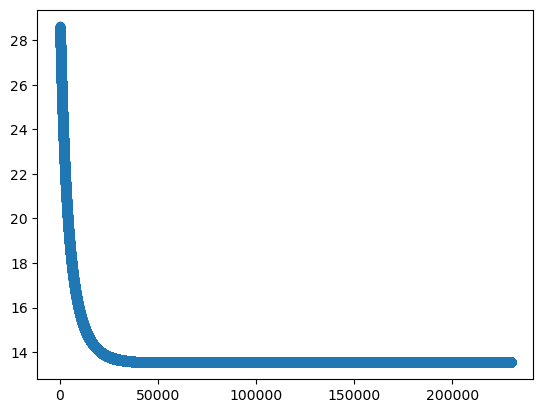

In [428]:
plt.scatter( range(num_iterations), all_costs) #

In [429]:
#X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0., random_state=0)

model = LogisticRegression(max_iter=10000)

# fit the model to the data
model.fit(df, Y)

# make predictions on the test data
y_pred = model.predict(df)

# evaluate the model's accuracy
acc = accuracy_score(Y, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8157894736842105


In [415]:
fdf = pd.read_csv('cleveland-test.csv')
fdf = np.array(fdf)

scalerTest = StandardScaler()
# Fit the scaler to the data
scalerTest.fit(fdf)
# Transform the data
fdf = scalerTest.transform(fdf)
#fdf=fdf.apply(standardize_list)
fdf

array([[ 0.92468545,  0.660033  , -2.29341501, ...,  2.17204388,
        -0.72568921,  0.69767553],
       [ 1.35965508,  0.660033  ,  0.84380364, ...,  0.58939884,
         2.36916182, -0.85867758],
       [-1.46764754, -1.51507576, -1.24767546, ..., -0.99324619,
        -0.72568921, -0.85867758],
       ...,
       [-1.14142032,  0.660033  ,  0.84380364, ...,  2.17204388,
        -0.72568921,  0.69767553],
       [ 0.272231  , -1.51507576,  0.84380364, ...,  0.58939884,
        -0.72568921,  1.21645991],
       [-1.03267791,  0.660033  , -2.29341501, ...,  0.58939884,
        -0.72568921,  1.21645991]])

In [416]:
#Applying the same model with 0.80 accuracy on our Test data
y_pred = model.predict(fdf)
len(y_pred)
final_pred=[]
for value in y_pred:
        if(value==0):
            final_pred.append(-1)
        else:
            final_pred.append(1)
final_pred

[-1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1]

In [417]:
file = open("Deep_Vora_100000_2_Output.txt", "w") 

for i, item in enumerate(final_pred):
    file.write(str(item) + "\n") # Writing data to the output file

# Close the file to save changes
file.close()